In [1]:
SensorNum=3 # Sensor number
WindowWidth=[16,32,64,128,256,512,1024] # Window Width
OverlapArray=[4,8,16,32,64,128,256] # sliding window
width=1000 # graph width 
EncodingDim=[4,8,12,16,32,64] # number of hidden layer note
Axis='AccX,AccY,AccZ' # Axis
PathAxis='AccXYZ'
WORKSPACE_PATH = "/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/2016-07-25"

In [2]:
import numpy as np
import pandas as pd
from scipy import fftpack
from scipy import signal
import time
import os
import matplotlib.pyplot as plt
import pylab
import pickle
import copy

import processing
import window

import matplotlib.animation as animation
import datetime

%matplotlib inline

In [3]:
from keras.models import Sequential
from keras.datasets import cifar10
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adadelta
from keras.utils import np_utils
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.utils.visualize_util import model_to_dot, plot
from keras import backend as K
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

import matplotlib.image as mpimg


Using Theano backend.
Using gpu device 0: GeForce GTX 1080 (CNMeM is disabled, cuDNN 5005)


In [4]:
DataName='sensor'+str(SensorNum)+'_'+Axis
SensorName='sensor'+str(SensorNum)
DicName='MemSensor'+str(SensorNum)

In [5]:
if not os.path.exists(WORKSPACE_PATH+'/study/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/study/'+DataName+'/')
StudyDataPath=WORKSPACE_PATH+'/study/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/glaph/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/glaph/'+DataName+'/')
GlaphDataPath=WORKSPACE_PATH+'/glaph/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/modelPic/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/modelPic/'+DataName+'/')
StudyDataModelPicPath=WORKSPACE_PATH+'/modelPic/'+DataName+'/'

if not os.path.exists(WORKSPACE_PATH+'/window/'+DataName+'/'): os.makedirs(WORKSPACE_PATH+'/window/'+DataName+'/')
WindowDataPath=WORKSPACE_PATH+'/window/'+DataName+'/'

RawDataPath="/media/takeyama/HD-PZU3/01_TAKEYAMA_WORKSPACE/02_CommonData/raw/"

**Phase1 計測データの取得**

In [6]:
dic=processing.LoadDicDataFromFileNPZ(RawDataPath+DicName)

**Phase2 window flame 作成**

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =63682
SourceData's aborting data = 2
window shape is (63682, 16, 3)
(63682, 16, 3)
hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
50s - loss: 0.0072 - val_loss: 0.0019
Epoch 2/50
61s - loss: 0.0014 - val_loss: 0.0011
Epoch 3/50
62s - loss: 9.4838e-04 - val_loss: 8.2583e-04
Epoch 4/50
61s - loss: 7.5862e-04 - val_loss: 6.7645e-04
Epoch 5/50
61s - loss: 6.2676e-04 - val_loss: 5.6146e-04
Epoch 6/50
61s - loss: 5.1681e-04 - val_loss: 4.8229e-04
Epoch 7/50
62s - loss: 4.3725e-04 - val_loss: 4.0520e-04
Epoch 8/50
62s - loss: 3.8791e-04 - val_loss: 3.6030e-04
Epoch 9/50
62s - loss: 3.5242e-04 - val_loss: 3.3407e-04
Epoch 10/50
61s - loss: 3.2482e-04 - val_loss: 3.1422e-04
Epoch 11/50
62s - loss: 3.0778e-04 - val_loss: 2.9969e-04
Epoch 12/50
61s - loss: 2.8914e-04 - val_loss: 2.7812e-04
Epoch 13/50
61s - loss: 2.7674e-04 - val_loss: 2.5950e-04
Epoch 14/50
61s

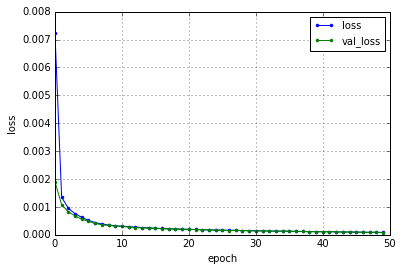

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0026 - val_loss: 9.2007e-04
Epoch 2/50
61s - loss: 7.1275e-04 - val_loss: 5.4672e-04
Epoch 3/50
61s - loss: 4.6121e-04 - val_loss: 3.7486e-04
Epoch 4/50
62s - loss: 3.3392e-04 - val_loss: 2.8847e-04
Epoch 5/50
62s - loss: 2.7216e-04 - val_loss: 2.4951e-04
Epoch 6/50
62s - loss: 2.3005e-04 - val_loss: 2.1841e-04
Epoch 7/50
62s - loss: 1.9756e-04 - val_loss: 1.9783e-04
Epoch 8/50
62s - loss: 1.7485e-04 - val_loss: 1.6030e-04
Epoch 9/50
62s - loss: 1.5659e-04 - val_loss: 1.4787e-04
Epoch 10/50
62s - loss: 1.4209e-04 - val_loss: 1.3007e-04
Epoch 11/50
62s - loss: 1.2747e-04 - val_loss: 1.2786e-04
Epoch 12/50
62s - loss: 1.1785e-04 - val_loss: 1.0839e-04
Epoch 13/50
62s - loss: 1.0902e-04 - val_loss: 9.9101e-05
Epoch 14/50
62s - loss: 9.9972e-05 - val_loss: 9.0590e-05
Epoch 15/50
62s - loss: 9.2957e-05 - val_loss: 8.3988e-05
Epoch 16/50
62s - loss: 8.6493e-05 - val_loss: 8.6113e-05
Epoch 17/50
62s - lo

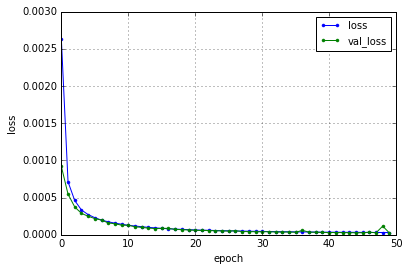

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
61s - loss: 0.0026 - val_loss: 8.1160e-04
Epoch 2/50
61s - loss: 6.2182e-04 - val_loss: 4.9433e-04
Epoch 3/50
62s - loss: 3.9408e-04 - val_loss: 3.1638e-04
Epoch 4/50
61s - loss: 2.8253e-04 - val_loss: 2.4200e-04
Epoch 5/50
62s - loss: 2.2548e-04 - val_loss: 2.1867e-04
Epoch 6/50
62s - loss: 1.8677e-04 - val_loss: 1.6340e-04
Epoch 7/50
62s - loss: 1.5519e-04 - val_loss: 1.3817e-04
Epoch 8/50
62s - loss: 1.3256e-04 - val_loss: 1.3972e-04
Epoch 9/50
62s - loss: 1.1478e-04 - val_loss: 1.1133e-04
Epoch 10/50
62s - loss: 1.0257e-04 - val_loss: 1.0113e-04
Epoch 11/50
62s - loss: 9.3232e-05 - val_loss: 8.7822e-05
Epoch 12/50
62s - loss: 8.6004e-05 - val_loss: 1.1387e-04
Epoch 13/50
62s - loss: 7.9118e-05 - val_loss: 7.8190e-05
Epoch 14/50
62s - loss: 7.1433e-05 - val_loss: 7.0998e-05
Epoch 15/50
62s - loss: 6.6871e-05 - val_loss: 6.4627e-05
Epoch 16/50
62s - loss: 6.2370e-05 - val_loss: 5.5248e-05
Epoch 17/50
61s - l

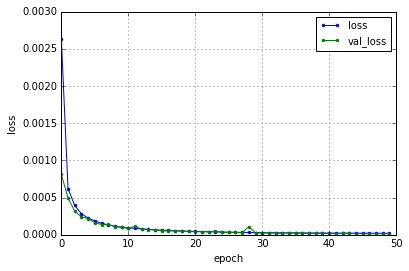

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
62s - loss: 0.0017 - val_loss: 4.0762e-04
Epoch 2/50
61s - loss: 3.1288e-04 - val_loss: 2.4594e-04
Epoch 3/50
61s - loss: 2.0753e-04 - val_loss: 1.8844e-04
Epoch 4/50
62s - loss: 1.6312e-04 - val_loss: 1.5525e-04
Epoch 5/50
62s - loss: 1.3478e-04 - val_loss: 1.1911e-04
Epoch 6/50
61s - loss: 1.1590e-04 - val_loss: 1.0300e-04
Epoch 7/50
62s - loss: 1.0127e-04 - val_loss: 9.6448e-05
Epoch 8/50
61s - loss: 8.9618e-05 - val_loss: 7.9633e-05
Epoch 9/50
62s - loss: 8.0586e-05 - val_loss: 7.8510e-05
Epoch 10/50
62s - loss: 7.3916e-05 - val_loss: 6.8441e-05
Epoch 11/50
62s - loss: 6.8880e-05 - val_loss: 6.4980e-05
Epoch 12/50
62s - loss: 6.3200e-05 - val_loss: 5.9755e-05
Epoch 13/50
62s - loss: 5.7943e-05 - val_loss: 5.1369e-05
Epoch 14/50
62s - loss: 5.4542e-05 - val_loss: 5.3634e-05
Epoch 15/50
62s - loss: 5.1155e-05 - val_loss: 6.8283e-05
Epoch 16/50
62s - loss: 4.7661e-05 - val_loss: 4.5267e-05
Epoch 17/50
62s - l

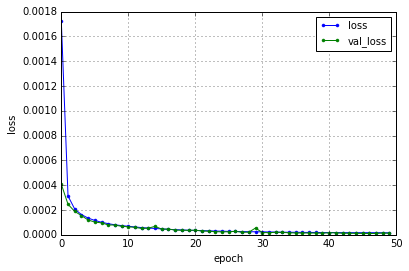

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
64s - loss: 9.7329e-04 - val_loss: 2.5026e-04
Epoch 2/50
63s - loss: 1.8045e-04 - val_loss: 1.3550e-04
Epoch 3/50
64s - loss: 1.1683e-04 - val_loss: 9.5571e-05
Epoch 4/50
64s - loss: 8.5417e-05 - val_loss: 7.2260e-05
Epoch 5/50
65s - loss: 6.4578e-05 - val_loss: 6.8366e-05
Epoch 6/50
64s - loss: 5.3620e-05 - val_loss: 4.3856e-05
Epoch 7/50
64s - loss: 4.4066e-05 - val_loss: 3.6609e-05
Epoch 8/50
65s - loss: 3.9652e-05 - val_loss: 3.3439e-05
Epoch 9/50
65s - loss: 3.3813e-05 - val_loss: 2.8530e-05
Epoch 10/50
64s - loss: 3.0671e-05 - val_loss: 2.5146e-05
Epoch 11/50
64s - loss: 2.8280e-05 - val_loss: 2.3558e-05
Epoch 12/50
64s - loss: 2.6440e-05 - val_loss: 2.1827e-05
Epoch 13/50
64s - loss: 2.4402e-05 - val_loss: 2.0074e-05
Epoch 14/50
65s - loss: 2.2705e-05 - val_loss: 1.8593e-05
Epoch 15/50
64s - loss: 2.1329e-05 - val_loss: 1.7194e-05
Epoch 16/50
65s - loss: 2.0280e-05 - val_loss: 1.6766e-05
Epoch 17/50
62s

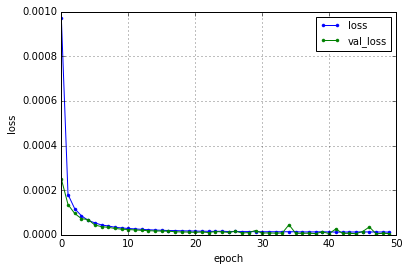

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
49s - loss: 6.4401e-04 - val_loss: 1.3772e-04
Epoch 2/50
49s - loss: 1.0390e-04 - val_loss: 7.8373e-05
Epoch 3/50
50s - loss: 6.5683e-05 - val_loss: 5.2467e-05
Epoch 4/50
50s - loss: 4.5710e-05 - val_loss: 5.1880e-05
Epoch 5/50
51s - loss: 3.3485e-05 - val_loss: 2.7177e-05
Epoch 6/50
50s - loss: 2.6954e-05 - val_loss: 5.7322e-05
Epoch 7/50
49s - loss: 2.4252e-05 - val_loss: 2.1160e-05
Epoch 8/50
50s - loss: 2.2675e-05 - val_loss: 1.9889e-05
Epoch 9/50
49s - loss: 2.1900e-05 - val_loss: 1.8488e-05
Epoch 10/50
50s - loss: 2.0775e-05 - val_loss: 1.7460e-05
Epoch 11/50
50s - loss: 1.9290e-05 - val_loss: 3.6817e-05
Epoch 12/50
50s - loss: 1.8452e-05 - val_loss: 2.1322e-05
Epoch 13/50
50s - loss: 1.7557e-05 - val_loss: 2.0629e-05
Epoch 14/50
50s - loss: 1.6348e-05 - val_loss: 1.3531e-05
Epoch 15/50
50s - loss: 1.5230e-05 - val_loss: 1.3232e-05
Epoch 16/50
50s - loss: 1.4467e-05 - val_loss: 3.8730e-05
Epoch 17/50
50s

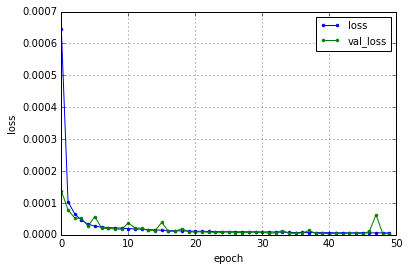

hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
49s - loss: 0.0248 - val_loss: 0.0018
Epoch 2/50
49s - loss: 0.0011 - val_loss: 7.6174e-04
Epoch 3/50
50s - loss: 6.8352e-04 - val_loss: 5.4550e-04
Epoch 4/50
49s - loss: 5.4839e-04 - val_loss: 4.8012e-04
Epoch 5/50
49s - loss: 4.6850e-04 - val_loss: 3.9721e-04
Epoch 6/50
49s - loss: 4.0192e-04 - val_loss: 3.3884e-04
Epoch 7/50
49s - loss: 3.5041e-04 - val_loss: 3.1017e-04
Epoch 8/50
49s - loss: 3.0138e-04 - val_loss: 2.3458e-04
Epoch 9/50
49s - loss: 2.6043e-04 - val_loss: 2.2259e-04
Epoch 10/50
49s - loss: 2.2889e-04 - val_loss: 4.1587e-04
Epoch 11/50
49s - loss: 2.0841e-04 - val_loss: 1.6256e-04
Epoch 12/50
49s - loss: 1.9433e-04 - val_loss: 1.6705e-04
Epoch 13/50
49s - loss: 1.8350e-04 - val_loss: 1.3938e-04
Epoch 14/50
49s - loss: 1.7563e-04 - val_loss: 0.0028
Epoch 15/50
50s - loss: 1.6956e-04 - val_loss: 1.2923e-04
Epoch 16/50
49s - loss: 1.6306e-04 - val_loss: 1.2020e-04
Epoch 17/50
49s - loss: 1.6082e-

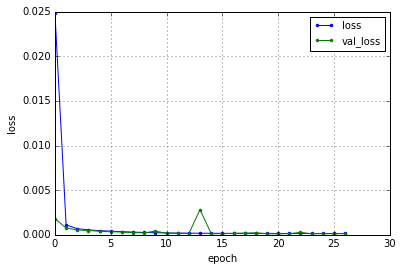

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
49s - loss: 0.0180 - val_loss: 0.0011
Epoch 2/50
50s - loss: 6.4411e-04 - val_loss: 4.2761e-04
Epoch 3/50
49s - loss: 4.3146e-04 - val_loss: 3.1858e-04
Epoch 4/50
50s - loss: 3.3923e-04 - val_loss: 2.5500e-04
Epoch 5/50
50s - loss: 2.9744e-04 - val_loss: 2.1980e-04
Epoch 6/50
49s - loss: 2.6940e-04 - val_loss: 2.4720e-04
Epoch 7/50
49s - loss: 2.5162e-04 - val_loss: 1.6911e-04
Epoch 8/50
51s - loss: 2.3826e-04 - val_loss: 1.6205e-04
Epoch 9/50
50s - loss: 2.2621e-04 - val_loss: 2.8218e-04
Epoch 10/50
49s - loss: 2.1433e-04 - val_loss: 1.3459e-04
Epoch 11/50
50s - loss: 2.0205e-04 - val_loss: 3.4507e-04
Epoch 12/50
49s - loss: 1.9462e-04 - val_loss: 1.2121e-04
Epoch 13/50
50s - loss: 1.8434e-04 - val_loss: 6.8723e-04
Epoch 14/50
49s - loss: 1.8028e-04 - val_loss: 1.5107e-04
Epoch 15/50
47s - loss: 1.6971e-04 - val_loss: 2.1564e-04
Epoch 16/50
49s - loss: 1.6773e-04 - val_loss: 1.1663e-04
Epoch 17/50
50s - loss: 

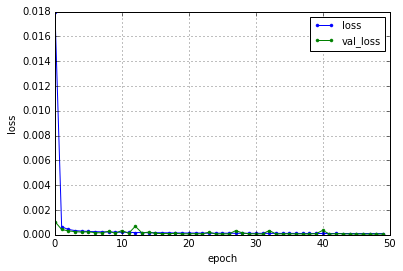

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
22s - loss: 0.0130 - val_loss: 6.7263e-04
Epoch 2/50
22s - loss: 5.0421e-04 - val_loss: 3.2672e-04
Epoch 3/50
22s - loss: 3.1923e-04 - val_loss: 2.0755e-04
Epoch 4/50
22s - loss: 2.6722e-04 - val_loss: 2.2692e-04
Epoch 5/50
22s - loss: 2.4156e-04 - val_loss: 4.5632e-04
Epoch 6/50
22s - loss: 2.2345e-04 - val_loss: 1.7873e-04
Epoch 7/50
22s - loss: 2.0858e-04 - val_loss: 1.4540e-04
Epoch 8/50
22s - loss: 2.0566e-04 - val_loss: 1.0478e-04
Epoch 9/50
22s - loss: 1.9365e-04 - val_loss: 1.0627e-04
Epoch 10/50
22s - loss: 1.8244e-04 - val_loss: 9.0367e-05
Epoch 11/50
22s - loss: 1.7641e-04 - val_loss: 8.2252e-05
Epoch 12/50
22s - loss: 1.7784e-04 - val_loss: 8.1376e-05
Epoch 13/50
22s - loss: 1.6293e-04 - val_loss: 9.1166e-05
Epoch 14/50
22s - loss: 1.6244e-04 - val_loss: 1.2470e-04
Epoch 15/50
22s - loss: 1.5629e-04 - val_loss: 7.8709e-05
Epoch 16/50
22s - loss: 1.5170e-04 - val_loss: 7.6810e-05
Epoch 17/50
22s - l

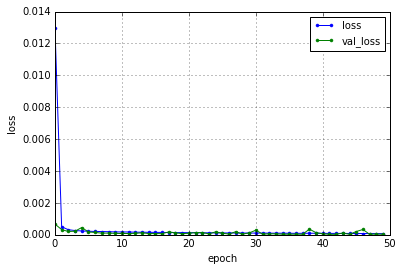

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0092 - val_loss: 6.9925e-04
Epoch 2/50
22s - loss: 5.4730e-04 - val_loss: 3.2224e-04
Epoch 3/50
22s - loss: 3.4350e-04 - val_loss: 2.1881e-04
Epoch 4/50
22s - loss: 2.8502e-04 - val_loss: 1.9396e-04
Epoch 5/50
22s - loss: 2.5485e-04 - val_loss: 1.5349e-04
Epoch 6/50
23s - loss: 2.3729e-04 - val_loss: 1.8374e-04
Epoch 7/50
23s - loss: 2.2451e-04 - val_loss: 1.3452e-04
Epoch 8/50
22s - loss: 2.1215e-04 - val_loss: 5.6865e-04
Epoch 9/50
23s - loss: 2.0516e-04 - val_loss: 2.2188e-04
Epoch 10/50
22s - loss: 1.9969e-04 - val_loss: 1.5947e-04
Epoch 11/50
23s - loss: 1.8522e-04 - val_loss: 9.3399e-05
Epoch 12/50
23s - loss: 1.7555e-04 - val_loss: 1.1448e-04
Epoch 13/50
23s - loss: 1.7432e-04 - val_loss: 8.6751e-05
Epoch 14/50
21s - loss: 1.6169e-04 - val_loss: 1.0764e-04
Epoch 15/50
22s - loss: 1.5803e-04 - val_loss: 1.1386e-04
Epoch 16/50
23s - loss: 1.5441e-04 - val_loss: 1.5741e-04
Epoch 17/50
23s - l

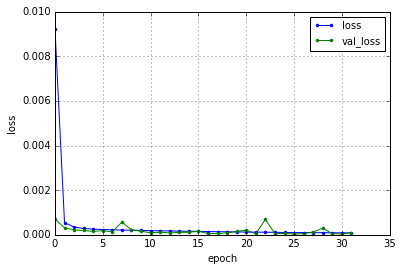

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
22s - loss: 0.0042 - val_loss: 2.9520e-04
Epoch 2/50
22s - loss: 3.3296e-04 - val_loss: 2.0071e-04
Epoch 3/50
22s - loss: 2.8329e-04 - val_loss: 1.6835e-04
Epoch 4/50
23s - loss: 2.6565e-04 - val_loss: 3.3320e-04
Epoch 5/50
23s - loss: 2.5235e-04 - val_loss: 2.8326e-04
Epoch 6/50
22s - loss: 2.3463e-04 - val_loss: 1.1438e-04
Epoch 7/50
23s - loss: 2.3417e-04 - val_loss: 1.6949e-04
Epoch 8/50
23s - loss: 2.3140e-04 - val_loss: 1.4419e-04
Epoch 9/50
22s - loss: 2.2181e-04 - val_loss: 1.0618e-04
Epoch 10/50
23s - loss: 2.1207e-04 - val_loss: 6.0385e-04
Epoch 11/50
22s - loss: 2.1148e-04 - val_loss: 1.0085e-04
Epoch 12/50
22s - loss: 2.0313e-04 - val_loss: 1.1589e-04
Epoch 13/50
22s - loss: 1.9692e-04 - val_loss: 8.4746e-05
Epoch 14/50
22s - loss: 1.8715e-04 - val_loss: 1.3662e-04
Epoch 15/50
22s - loss: 1.8484e-04 - val_loss: 7.5955e-05
Epoch 16/50
22s - loss: 1.7980e-04 - val_loss: 6.9563e-05
Epoch 17/50
22s - l

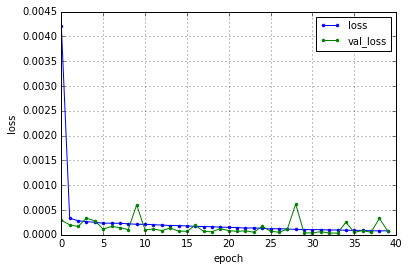

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
22s - loss: 0.0027 - val_loss: 1.3041e-04
Epoch 2/50
22s - loss: 2.8560e-04 - val_loss: 1.5262e-04
Epoch 3/50
22s - loss: 2.6996e-04 - val_loss: 0.0021
Epoch 4/50
22s - loss: 2.6368e-04 - val_loss: 7.9012e-05
Epoch 5/50
22s - loss: 2.5624e-04 - val_loss: 1.4100e-04
Epoch 6/50
22s - loss: 2.3777e-04 - val_loss: 1.2826e-04
Epoch 7/50
22s - loss: 2.3735e-04 - val_loss: 4.6318e-04
Epoch 8/50
20s - loss: 2.2798e-04 - val_loss: 7.3433e-05
Epoch 9/50
22s - loss: 2.2778e-04 - val_loss: 7.9360e-05
Epoch 10/50
22s - loss: 2.1265e-04 - val_loss: 7.2373e-05
Epoch 11/50
23s - loss: 2.0245e-04 - val_loss: 6.7733e-05
Epoch 12/50
23s - loss: 1.9990e-04 - val_loss: 7.8334e-05
Epoch 13/50
23s - loss: 1.9767e-04 - val_loss: 6.4732e-05
Epoch 14/50
23s - loss: 1.8598e-04 - val_loss: 8.9329e-05
Epoch 15/50
23s - loss: 1.8776e-04 - val_loss: 7.3622e-05
Epoch 16/50
23s - loss: 1.8615e-04 - val_loss: 6.7044e-04
Epoch 17/50
23s - loss:

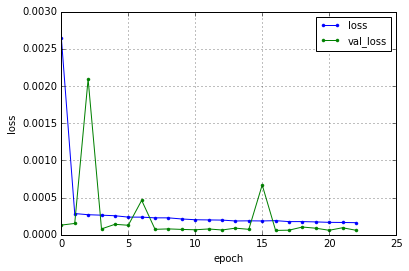

hiden node = 4
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
22s - loss: 0.0273 - val_loss: 0.0106
Epoch 2/50
22s - loss: 0.0076 - val_loss: 0.0059
Epoch 3/50
22s - loss: 0.0047 - val_loss: 0.0041
Epoch 4/50
22s - loss: 0.0035 - val_loss: 0.0030
Epoch 5/50
22s - loss: 0.0028 - val_loss: 0.0025
Epoch 6/50
22s - loss: 0.0023 - val_loss: 0.0021
Epoch 7/50
22s - loss: 0.0019 - val_loss: 0.0020
Epoch 8/50
23s - loss: 0.0017 - val_loss: 0.0015
Epoch 9/50
22s - loss: 0.0014 - val_loss: 0.0013
Epoch 10/50
22s - loss: 0.0013 - val_loss: 0.0012
Epoch 11/50
22s - loss: 0.0011 - val_loss: 0.0011
Epoch 12/50
22s - loss: 0.0010 - val_loss: 9.8683e-04
Epoch 13/50
22s - loss: 9.4346e-04 - val_loss: 9.1819e-04
Epoch 14/50
22s - loss: 8.7880e-04 - val_loss: 8.3015e-04
Epoch 15/50
22s - loss: 8.2566e-04 - val_loss: 7.5202e-04
Epoch 16/50
22s - loss: 7.7906e-04 - val_loss: 7.1845e-04
Epoch 17/50
22s - loss: 7.4263e-04 - val_loss: 7.8633e-04
Epoch 18/50
22s - loss: 7.1891e-04 - val_loss: 6.6

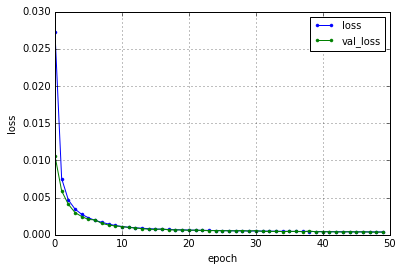

hiden node = 8
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0133 - val_loss: 0.0049
Epoch 2/50
23s - loss: 0.0037 - val_loss: 0.0028
Epoch 3/50
22s - loss: 0.0024 - val_loss: 0.0019
Epoch 4/50
23s - loss: 0.0017 - val_loss: 0.0015
Epoch 5/50
22s - loss: 0.0013 - val_loss: 0.0012
Epoch 6/50
22s - loss: 0.0011 - val_loss: 9.7379e-04
Epoch 7/50
22s - loss: 9.2707e-04 - val_loss: 8.5265e-04
Epoch 8/50
22s - loss: 8.0305e-04 - val_loss: 7.6402e-04
Epoch 9/50
22s - loss: 7.1759e-04 - val_loss: 6.5324e-04
Epoch 10/50
22s - loss: 6.4223e-04 - val_loss: 5.9847e-04
Epoch 11/50
23s - loss: 5.8724e-04 - val_loss: 5.4500e-04
Epoch 12/50
23s - loss: 5.4055e-04 - val_loss: 4.8358e-04
Epoch 13/50
23s - loss: 5.0099e-04 - val_loss: 4.6031e-04
Epoch 14/50
23s - loss: 4.7152e-04 - val_loss: 4.3438e-04
Epoch 15/50
23s - loss: 4.3994e-04 - val_loss: 4.2334e-04
Epoch 16/50
23s - loss: 4.1863e-04 - val_loss: 4.7482e-04
Epoch 17/50
23s - loss: 3.9588e-04 - val_loss: 3.6347e-04
Ep

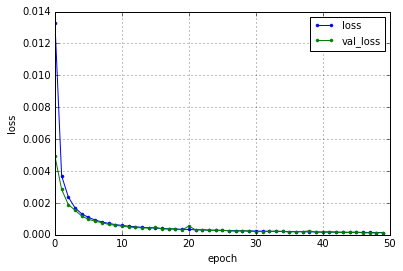

hiden node = 12
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
22s - loss: 0.0114 - val_loss: 0.0034
Epoch 2/50
22s - loss: 0.0026 - val_loss: 0.0019
Epoch 3/50
23s - loss: 0.0016 - val_loss: 0.0013
Epoch 4/50
23s - loss: 0.0011 - val_loss: 9.9936e-04
Epoch 5/50
22s - loss: 8.7052e-04 - val_loss: 7.6389e-04
Epoch 6/50
23s - loss: 7.0615e-04 - val_loss: 6.3683e-04
Epoch 7/50
23s - loss: 6.0972e-04 - val_loss: 6.0441e-04
Epoch 8/50
23s - loss: 5.2268e-04 - val_loss: 4.8211e-04
Epoch 9/50
23s - loss: 4.4991e-04 - val_loss: 3.9932e-04
Epoch 10/50
22s - loss: 3.9431e-04 - val_loss: 3.7530e-04
Epoch 11/50
23s - loss: 3.5870e-04 - val_loss: 3.1239e-04
Epoch 12/50
23s - loss: 3.2747e-04 - val_loss: 2.9577e-04
Epoch 13/50
23s - loss: 3.0582e-04 - val_loss: 3.0484e-04
Epoch 14/50
23s - loss: 2.8712e-04 - val_loss: 2.8775e-04
Epoch 15/50
23s - loss: 2.7088e-04 - val_loss: 2.6723e-04
Epoch 16/50
23s - loss: 2.5318e-04 - val_loss: 2.1638e-04
Epoch 17/50
22s - loss: 2.3987e-04 - val_lo

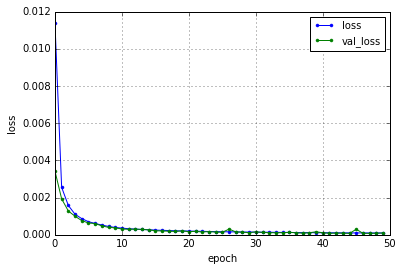

hiden node = 16
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0088 - val_loss: 0.0023
Epoch 2/50
22s - loss: 0.0016 - val_loss: 0.0012
Epoch 3/50
22s - loss: 0.0010 - val_loss: 8.6646e-04
Epoch 4/50
22s - loss: 7.5158e-04 - val_loss: 6.3830e-04
Epoch 5/50
22s - loss: 5.8404e-04 - val_loss: 4.9891e-04
Epoch 6/50
22s - loss: 4.8032e-04 - val_loss: 4.6353e-04
Epoch 7/50
22s - loss: 3.9850e-04 - val_loss: 3.7281e-04
Epoch 8/50
22s - loss: 3.4357e-04 - val_loss: 3.0588e-04
Epoch 9/50
22s - loss: 3.0265e-04 - val_loss: 2.8153e-04
Epoch 10/50
22s - loss: 2.7102e-04 - val_loss: 2.4743e-04
Epoch 11/50
23s - loss: 2.4664e-04 - val_loss: 5.4588e-04
Epoch 12/50
23s - loss: 2.2255e-04 - val_loss: 2.3146e-04
Epoch 13/50
22s - loss: 2.0724e-04 - val_loss: 1.9623e-04
Epoch 14/50
22s - loss: 1.9293e-04 - val_loss: 1.6294e-04
Epoch 15/50
23s - loss: 1.8140e-04 - val_loss: 1.6711e-04
Epoch 16/50
22s - loss: 1.7000e-04 - val_loss: 1.4360e-04
Epoch 17/50
23s - loss: 1.6394e-04 

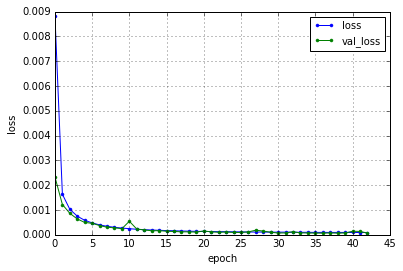

hiden node = 32
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0052 - val_loss: 9.7933e-04
Epoch 2/50
22s - loss: 7.4225e-04 - val_loss: 5.3139e-04
Epoch 3/50
23s - loss: 4.7663e-04 - val_loss: 3.6163e-04
Epoch 4/50
23s - loss: 3.5760e-04 - val_loss: 2.8427e-04
Epoch 5/50
23s - loss: 2.8547e-04 - val_loss: 2.3132e-04
Epoch 6/50
22s - loss: 2.3735e-04 - val_loss: 1.9310e-04
Epoch 7/50
22s - loss: 2.0437e-04 - val_loss: 1.7556e-04
Epoch 8/50
22s - loss: 1.7746e-04 - val_loss: 1.5133e-04
Epoch 9/50
22s - loss: 1.5766e-04 - val_loss: 1.2637e-04
Epoch 10/50
22s - loss: 1.4196e-04 - val_loss: 1.0852e-04
Epoch 11/50
22s - loss: 1.3070e-04 - val_loss: 1.3268e-04
Epoch 12/50
22s - loss: 1.2125e-04 - val_loss: 8.9921e-05
Epoch 13/50
22s - loss: 1.1078e-04 - val_loss: 9.7410e-05
Epoch 14/50
22s - loss: 1.0653e-04 - val_loss: 9.4835e-05
Epoch 15/50
22s - loss: 9.8831e-05 - val_loss: 8.2166e-05
Epoch 16/50
22s - loss: 9.5392e-05 - val_loss: 8.8637e-05
Epoch 17/50
22s - l

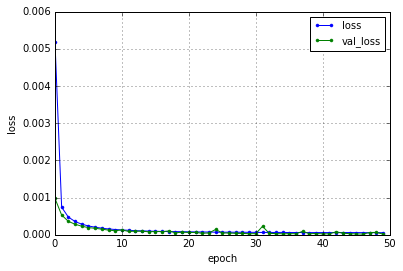

hiden node = 64
Train on 63682 samples, validate on 63682 samples
Epoch 1/50
23s - loss: 0.0030 - val_loss: 5.2860e-04
Epoch 2/50
22s - loss: 4.0204e-04 - val_loss: 2.8574e-04
Epoch 3/50
22s - loss: 2.6746e-04 - val_loss: 2.9166e-04
Epoch 4/50
22s - loss: 1.8611e-04 - val_loss: 1.3375e-04
Epoch 5/50
23s - loss: 1.1871e-04 - val_loss: 1.7632e-04
Epoch 6/50
22s - loss: 9.7030e-05 - val_loss: 6.9744e-05
Epoch 7/50
14s - loss: 8.8066e-05 - val_loss: 7.2448e-05
Epoch 8/50
14s - loss: 7.9094e-05 - val_loss: 2.8328e-04
Epoch 9/50
14s - loss: 7.4284e-05 - val_loss: 5.1403e-05
Epoch 10/50
14s - loss: 7.1848e-05 - val_loss: 5.4022e-05
Epoch 11/50
22s - loss: 6.9186e-05 - val_loss: 4.5523e-05
Epoch 12/50
23s - loss: 6.4646e-05 - val_loss: 1.0615e-04
Epoch 13/50
22s - loss: 6.0926e-05 - val_loss: 1.2991e-04
Epoch 14/50
22s - loss: 6.0721e-05 - val_loss: 1.4517e-04
Epoch 15/50
22s - loss: 5.8583e-05 - val_loss: 3.4681e-05
Epoch 16/50
22s - loss: 5.7813e-05 - val_loss: 3.0369e-04
Epoch 17/50
22s - l

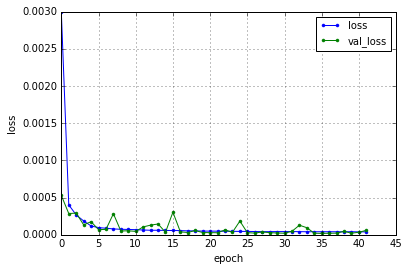

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =31839
SourceData's aborting data = 6
window shape is (31839, 32, 3)
(31839, 32, 3)
hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0139 - val_loss: 0.0055
Epoch 2/50
5s - loss: 0.0042 - val_loss: 0.0034
Epoch 3/50
5s - loss: 0.0030 - val_loss: 0.0027
Epoch 4/50
5s - loss: 0.0025 - val_loss: 0.0022
Epoch 5/50
5s - loss: 0.0019 - val_loss: 0.0017
Epoch 6/50
5s - loss: 0.0015 - val_loss: 0.0014
Epoch 7/50
5s - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
5s - loss: 0.0012 - val_loss: 0.0011
Epoch 9/50
4s - loss: 0.0010 - val_loss: 9.9776e-04
Epoch 10/50
5s - loss: 9.4315e-04 - val_loss: 8.9766e-04
Epoch 11/50
5s - loss: 8.5793e-04 - val_loss: 8.1437e-04
Epoch 12/50
5s - loss: 7.8283e-04 - val_loss: 7.4488e-04
Epoch 13/50
5s - loss: 7.2438e-04 - val_loss: 6.9825e-04
Epoch 14/50
5s - loss: 6.7549e-04 - val_loss: 6.5431e-04
Epoch 15/50
5s - loss: 

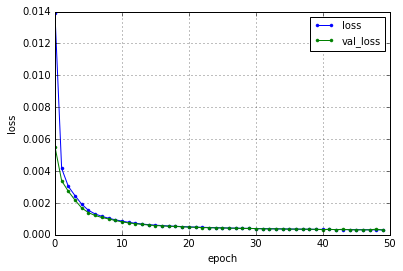

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0080 - val_loss: 0.0031
Epoch 2/50
5s - loss: 0.0024 - val_loss: 0.0019
Epoch 3/50
5s - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
5s - loss: 0.0010 - val_loss: 9.2410e-04
Epoch 5/50
5s - loss: 8.2929e-04 - val_loss: 7.4775e-04
Epoch 6/50
5s - loss: 6.9721e-04 - val_loss: 6.3076e-04
Epoch 7/50
5s - loss: 5.9741e-04 - val_loss: 5.4699e-04
Epoch 8/50
5s - loss: 5.2218e-04 - val_loss: 4.8780e-04
Epoch 9/50
4s - loss: 4.6993e-04 - val_loss: 4.4366e-04
Epoch 10/50
4s - loss: 4.3076e-04 - val_loss: 3.9994e-04
Epoch 11/50
5s - loss: 3.9386e-04 - val_loss: 3.7678e-04
Epoch 12/50
5s - loss: 3.6517e-04 - val_loss: 3.5350e-04
Epoch 13/50
5s - loss: 3.4125e-04 - val_loss: 3.3710e-04
Epoch 14/50
5s - loss: 3.2031e-04 - val_loss: 3.0187e-04
Epoch 15/50
5s - loss: 3.0138e-04 - val_loss: 2.8387e-04
Epoch 16/50
5s - loss: 2.8512e-04 - val_loss: 2.7413e-04
Epoch 17/50
5s - loss: 2.6853e-04 - val_loss: 2.5858e-04
Epo

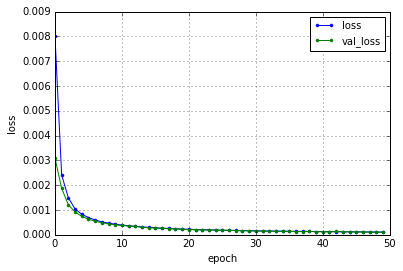

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0055 - val_loss: 0.0022
Epoch 2/50
5s - loss: 0.0016 - val_loss: 0.0012
Epoch 3/50
5s - loss: 9.8082e-04 - val_loss: 8.3273e-04
Epoch 4/50
5s - loss: 7.3942e-04 - val_loss: 6.3615e-04
Epoch 5/50
5s - loss: 5.7315e-04 - val_loss: 5.0789e-04
Epoch 6/50
5s - loss: 4.6656e-04 - val_loss: 4.2171e-04
Epoch 7/50
5s - loss: 3.9491e-04 - val_loss: 3.6873e-04
Epoch 8/50
5s - loss: 3.4292e-04 - val_loss: 3.2401e-04
Epoch 9/50
5s - loss: 3.0799e-04 - val_loss: 2.9642e-04
Epoch 10/50
4s - loss: 2.8039e-04 - val_loss: 2.5858e-04
Epoch 11/50
5s - loss: 2.5723e-04 - val_loss: 2.3823e-04
Epoch 12/50
5s - loss: 2.3838e-04 - val_loss: 2.3197e-04
Epoch 13/50
5s - loss: 2.2284e-04 - val_loss: 2.1586e-04
Epoch 14/50
5s - loss: 2.0915e-04 - val_loss: 1.9749e-04
Epoch 15/50
5s - loss: 1.9710e-04 - val_loss: 1.9073e-04
Epoch 16/50
5s - loss: 1.8696e-04 - val_loss: 1.8224e-04
Epoch 17/50
5s - loss: 1.7696e-04 - val_loss: 1

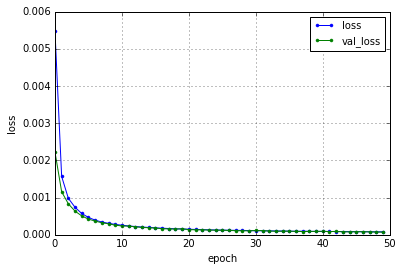

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0054 - val_loss: 0.0017
Epoch 2/50
5s - loss: 0.0011 - val_loss: 7.9709e-04
Epoch 3/50
5s - loss: 6.8206e-04 - val_loss: 5.8299e-04
Epoch 4/50
5s - loss: 5.2212e-04 - val_loss: 4.6476e-04
Epoch 5/50
5s - loss: 4.4108e-04 - val_loss: 3.9862e-04
Epoch 6/50
5s - loss: 3.8217e-04 - val_loss: 3.4936e-04
Epoch 7/50
5s - loss: 3.3732e-04 - val_loss: 3.1363e-04
Epoch 8/50
5s - loss: 3.0337e-04 - val_loss: 2.7978e-04
Epoch 9/50
5s - loss: 2.7303e-04 - val_loss: 2.5890e-04
Epoch 10/50
3s - loss: 2.4793e-04 - val_loss: 2.3226e-04
Epoch 11/50
5s - loss: 2.3029e-04 - val_loss: 2.1991e-04
Epoch 12/50
5s - loss: 2.1084e-04 - val_loss: 1.9416e-04
Epoch 13/50
5s - loss: 1.9578e-04 - val_loss: 1.8333e-04
Epoch 14/50
5s - loss: 1.8369e-04 - val_loss: 1.7394e-04
Epoch 15/50
5s - loss: 1.7448e-04 - val_loss: 1.6249e-04
Epoch 16/50
5s - loss: 1.6385e-04 - val_loss: 1.5458e-04
Epoch 17/50
5s - loss: 1.5563e-04 - val_los

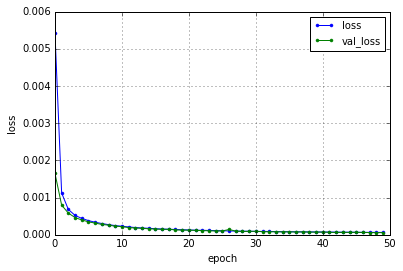

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0038 - val_loss: 8.1113e-04
Epoch 2/50
5s - loss: 5.9443e-04 - val_loss: 4.4784e-04
Epoch 3/50
5s - loss: 3.6813e-04 - val_loss: 3.0866e-04
Epoch 4/50
5s - loss: 2.7646e-04 - val_loss: 2.3991e-04
Epoch 5/50
5s - loss: 2.2501e-04 - val_loss: 2.0324e-04
Epoch 6/50
5s - loss: 1.8990e-04 - val_loss: 2.0467e-04
Epoch 7/50
5s - loss: 1.6495e-04 - val_loss: 1.4862e-04
Epoch 8/50
5s - loss: 1.4603e-04 - val_loss: 1.3806e-04
Epoch 9/50
5s - loss: 1.3160e-04 - val_loss: 1.2250e-04
Epoch 10/50
4s - loss: 1.2032e-04 - val_loss: 1.1018e-04
Epoch 11/50
5s - loss: 1.1111e-04 - val_loss: 1.0396e-04
Epoch 12/50
5s - loss: 1.0271e-04 - val_loss: 9.1321e-05
Epoch 13/50
5s - loss: 9.6574e-05 - val_loss: 8.4686e-05
Epoch 14/50
5s - loss: 9.0181e-05 - val_loss: 8.6521e-05
Epoch 15/50
5s - loss: 8.5238e-05 - val_loss: 7.6484e-05
Epoch 16/50
5s - loss: 7.9742e-05 - val_loss: 7.3368e-05
Epoch 17/50
5s - loss: 7.6234e-05 -

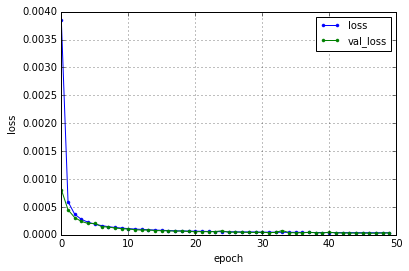

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0021 - val_loss: 3.8950e-04
Epoch 2/50
5s - loss: 2.9017e-04 - val_loss: 2.1708e-04
Epoch 3/50
5s - loss: 1.8587e-04 - val_loss: 1.5548e-04
Epoch 4/50
5s - loss: 1.4248e-04 - val_loss: 1.2039e-04
Epoch 5/50
5s - loss: 1.1406e-04 - val_loss: 1.0548e-04
Epoch 6/50
5s - loss: 9.8538e-05 - val_loss: 8.5449e-05
Epoch 7/50
5s - loss: 8.5320e-05 - val_loss: 8.1696e-05
Epoch 8/50
5s - loss: 7.6984e-05 - val_loss: 6.7628e-05
Epoch 9/50
5s - loss: 7.0301e-05 - val_loss: 6.5439e-05
Epoch 10/50
5s - loss: 6.4240e-05 - val_loss: 5.8684e-05
Epoch 11/50
5s - loss: 6.0332e-05 - val_loss: 5.4934e-05
Epoch 12/50
5s - loss: 5.6097e-05 - val_loss: 4.8786e-05
Epoch 13/50
5s - loss: 5.2524e-05 - val_loss: 4.6204e-05
Epoch 14/50
5s - loss: 4.9078e-05 - val_loss: 4.5623e-05
Epoch 15/50
5s - loss: 4.6590e-05 - val_loss: 4.3502e-05
Epoch 16/50
5s - loss: 4.4816e-05 - val_loss: 5.0855e-05
Epoch 17/50
5s - loss: 4.3443e-05 -

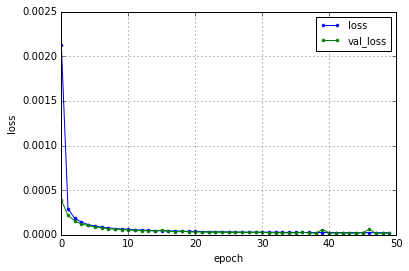

hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0786 - val_loss: 0.0108
Epoch 2/50
5s - loss: 0.0091 - val_loss: 0.0079
Epoch 3/50
5s - loss: 0.0051 - val_loss: 0.0035
Epoch 4/50
5s - loss: 0.0029 - val_loss: 0.0023
Epoch 5/50
5s - loss: 0.0022 - val_loss: 0.0018
Epoch 6/50
5s - loss: 0.0018 - val_loss: 0.0014
Epoch 7/50
5s - loss: 0.0015 - val_loss: 0.0012
Epoch 8/50
5s - loss: 0.0013 - val_loss: 0.0010
Epoch 9/50
5s - loss: 0.0011 - val_loss: 0.0011
Epoch 10/50
5s - loss: 0.0010 - val_loss: 8.3908e-04
Epoch 11/50
5s - loss: 9.6233e-04 - val_loss: 8.9159e-04
Epoch 12/50
5s - loss: 9.0922e-04 - val_loss: 8.9035e-04
Epoch 13/50
5s - loss: 8.7827e-04 - val_loss: 7.5354e-04
Epoch 14/50
5s - loss: 8.3332e-04 - val_loss: 7.5945e-04
Epoch 15/50
5s - loss: 8.1974e-04 - val_loss: 6.8427e-04
Epoch 16/50
5s - loss: 8.0544e-04 - val_loss: 0.0012
Epoch 17/50
5s - loss: 7.6942e-04 - val_loss: 5.6700e-04
Epoch 18/50
5s - loss: 7.1806e-04 - val_loss: 5.3859e-0

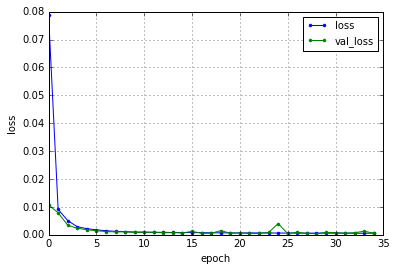

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0416 - val_loss: 0.0046
Epoch 2/50
5s - loss: 0.0031 - val_loss: 0.0021
Epoch 3/50
5s - loss: 0.0018 - val_loss: 0.0017
Epoch 4/50
5s - loss: 0.0013 - val_loss: 0.0013
Epoch 5/50
5s - loss: 0.0011 - val_loss: 9.2219e-04
Epoch 6/50
5s - loss: 0.0010 - val_loss: 9.9433e-04
Epoch 7/50
5s - loss: 9.8593e-04 - val_loss: 0.0024
Epoch 8/50
5s - loss: 9.4524e-04 - val_loss: 6.7263e-04
Epoch 9/50
5s - loss: 8.8817e-04 - val_loss: 6.6605e-04
Epoch 10/50
5s - loss: 9.0980e-04 - val_loss: 8.2307e-04
Epoch 11/50
5s - loss: 8.4199e-04 - val_loss: 5.7378e-04
Epoch 12/50
5s - loss: 7.9352e-04 - val_loss: 5.3453e-04
Epoch 13/50
4s - loss: 7.8801e-04 - val_loss: 5.4580e-04
Epoch 14/50
5s - loss: 7.8822e-04 - val_loss: 4.7583e-04
Epoch 15/50
5s - loss: 7.2463e-04 - val_loss: 7.0286e-04
Epoch 16/50
5s - loss: 7.7978e-04 - val_loss: 6.8585e-04
Epoch 17/50
5s - loss: 6.8820e-04 - val_loss: 5.5859e-04
Epoch 18/50
5s - lo

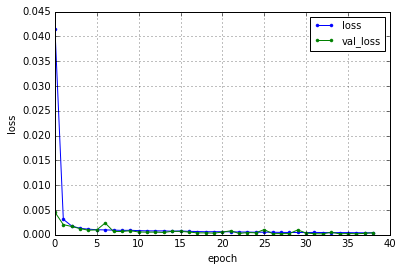

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0424 - val_loss: 0.0030
Epoch 2/50
5s - loss: 0.0021 - val_loss: 0.0014
Epoch 3/50
5s - loss: 0.0013 - val_loss: 0.0015
Epoch 4/50
5s - loss: 0.0011 - val_loss: 0.0013
Epoch 5/50
5s - loss: 9.6859e-04 - val_loss: 6.2732e-04
Epoch 6/50
5s - loss: 9.0346e-04 - val_loss: 0.0017
Epoch 7/50
5s - loss: 8.5638e-04 - val_loss: 0.0011
Epoch 8/50
5s - loss: 7.8659e-04 - val_loss: 5.9473e-04
Epoch 9/50
5s - loss: 7.7765e-04 - val_loss: 4.6272e-04
Epoch 10/50
5s - loss: 7.2566e-04 - val_loss: 6.5356e-04
Epoch 11/50
5s - loss: 7.1208e-04 - val_loss: 3.5898e-04
Epoch 12/50
5s - loss: 6.8795e-04 - val_loss: 3.9502e-04
Epoch 13/50
5s - loss: 6.7861e-04 - val_loss: 0.0012
Epoch 14/50
5s - loss: 6.3372e-04 - val_loss: 3.7760e-04
Epoch 15/50
5s - loss: 6.6138e-04 - val_loss: 8.8772e-04
Epoch 16/50
5s - loss: 6.3925e-04 - val_loss: 5.0441e-04
Epoch 17/50
5s - loss: 6.0961e-04 - val_loss: 3.6762e-04


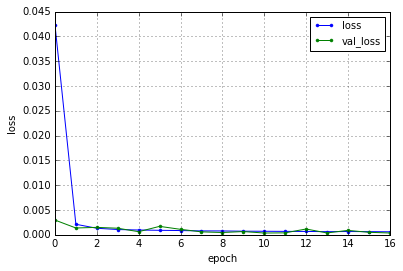

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0349 - val_loss: 0.0029
Epoch 2/50
5s - loss: 0.0019 - val_loss: 0.0012
Epoch 3/50
5s - loss: 0.0012 - val_loss: 7.9001e-04
Epoch 4/50
5s - loss: 9.5874e-04 - val_loss: 6.2497e-04
Epoch 5/50
5s - loss: 8.7122e-04 - val_loss: 0.0011
Epoch 6/50
5s - loss: 8.5961e-04 - val_loss: 0.0011
Epoch 7/50
5s - loss: 8.2843e-04 - val_loss: 6.6795e-04
Epoch 8/50
5s - loss: 7.4276e-04 - val_loss: 5.3386e-04
Epoch 9/50
5s - loss: 8.1868e-04 - val_loss: 4.5776e-04
Epoch 10/50
5s - loss: 7.3518e-04 - val_loss: 6.2484e-04
Epoch 11/50
5s - loss: 6.9672e-04 - val_loss: 3.5147e-04
Epoch 12/50
5s - loss: 6.9392e-04 - val_loss: 4.4171e-04
Epoch 13/50
5s - loss: 7.0883e-04 - val_loss: 4.3213e-04
Epoch 14/50
5s - loss: 7.0047e-04 - val_loss: 5.1582e-04
Epoch 15/50
5s - loss: 7.4349e-04 - val_loss: 4.1265e-04
Epoch 16/50
5s - loss: 6.5718e-04 - val_loss: 6.6788e-04
Epoch 17/50
5s - loss: 6.8763e-04 - val_loss: 6.3847e-04


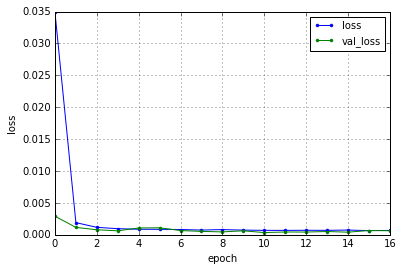

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0176 - val_loss: 0.0012
Epoch 2/50
5s - loss: 0.0012 - val_loss: 0.0012
Epoch 3/50
5s - loss: 9.7170e-04 - val_loss: 6.2546e-04
Epoch 4/50
5s - loss: 8.7320e-04 - val_loss: 6.2847e-04
Epoch 5/50
5s - loss: 8.7086e-04 - val_loss: 5.2453e-04
Epoch 6/50
4s - loss: 8.1364e-04 - val_loss: 4.5943e-04
Epoch 7/50
5s - loss: 7.5637e-04 - val_loss: 3.6317e-04
Epoch 8/50
5s - loss: 7.7606e-04 - val_loss: 8.0180e-04
Epoch 9/50
5s - loss: 7.3743e-04 - val_loss: 0.0014
Epoch 10/50
5s - loss: 7.1637e-04 - val_loss: 5.7767e-04
Epoch 11/50
5s - loss: 7.0006e-04 - val_loss: 2.9444e-04
Epoch 12/50
5s - loss: 7.0074e-04 - val_loss: 4.1873e-04
Epoch 13/50
5s - loss: 6.9248e-04 - val_loss: 0.0011
Epoch 14/50
5s - loss: 7.1143e-04 - val_loss: 7.7899e-04
Epoch 15/50
5s - loss: 6.6826e-04 - val_loss: 2.7983e-04
Epoch 16/50
5s - loss: 6.5836e-04 - val_loss: 0.0034
Epoch 17/50
5s - loss: 6.7624e-04 - val_loss: 4.7410e-04
Ep

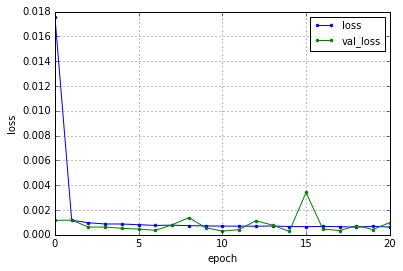

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0156 - val_loss: 8.1908e-04
Epoch 2/50
5s - loss: 0.0010 - val_loss: 7.5215e-04
Epoch 3/50
5s - loss: 8.9145e-04 - val_loss: 9.0775e-04
Epoch 4/50
5s - loss: 8.7895e-04 - val_loss: 0.0010
Epoch 5/50
5s - loss: 8.2980e-04 - val_loss: 3.8746e-04
Epoch 6/50
5s - loss: 8.6878e-04 - val_loss: 3.5145e-04
Epoch 7/50
5s - loss: 8.0982e-04 - val_loss: 7.0638e-04
Epoch 8/50
5s - loss: 7.9984e-04 - val_loss: 4.0094e-04
Epoch 9/50
5s - loss: 7.6337e-04 - val_loss: 2.9506e-04
Epoch 10/50
5s - loss: 7.5897e-04 - val_loss: 5.5667e-04
Epoch 11/50
5s - loss: 8.0237e-04 - val_loss: 3.7028e-04
Epoch 12/50
5s - loss: 7.5819e-04 - val_loss: 3.4931e-04
Epoch 13/50
5s - loss: 7.5619e-04 - val_loss: 4.8208e-04
Epoch 14/50
5s - loss: 7.6647e-04 - val_loss: 3.0806e-04
Epoch 15/50
5s - loss: 7.6985e-04 - val_loss: 3.4255e-04


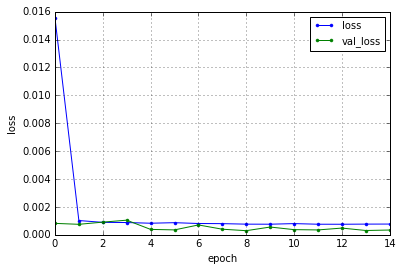

hiden node = 4
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0534 - val_loss: 0.0272
Epoch 2/50
5s - loss: 0.0209 - val_loss: 0.0167
Epoch 3/50
5s - loss: 0.0144 - val_loss: 0.0125
Epoch 4/50
5s - loss: 0.0112 - val_loss: 0.0099
Epoch 5/50
5s - loss: 0.0089 - val_loss: 0.0079
Epoch 6/50
5s - loss: 0.0072 - val_loss: 0.0065
Epoch 7/50
5s - loss: 0.0060 - val_loss: 0.0055
Epoch 8/50
5s - loss: 0.0052 - val_loss: 0.0049
Epoch 9/50
5s - loss: 0.0045 - val_loss: 0.0044
Epoch 10/50
5s - loss: 0.0041 - val_loss: 0.0038
Epoch 11/50
5s - loss: 0.0038 - val_loss: 0.0035
Epoch 12/50
5s - loss: 0.0035 - val_loss: 0.0033
Epoch 13/50
5s - loss: 0.0032 - val_loss: 0.0031
Epoch 14/50
5s - loss: 0.0030 - val_loss: 0.0029
Epoch 15/50
5s - loss: 0.0028 - val_loss: 0.0027
Epoch 16/50
5s - loss: 0.0027 - val_loss: 0.0026
Epoch 17/50
5s - loss: 0.0025 - val_loss: 0.0024
Epoch 18/50
5s - loss: 0.0024 - val_loss: 0.0024
Epoch 19/50
5s - loss: 0.0023 - val_loss: 0.0022
Epoch 20/50
4

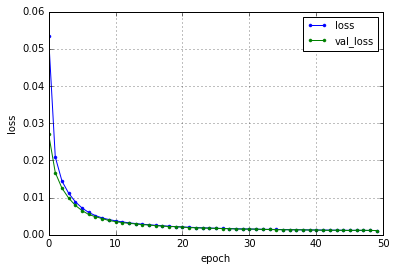

hiden node = 8
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0417 - val_loss: 0.0174
Epoch 2/50
5s - loss: 0.0123 - val_loss: 0.0089
Epoch 3/50
5s - loss: 0.0071 - val_loss: 0.0058
Epoch 4/50
5s - loss: 0.0049 - val_loss: 0.0043
Epoch 5/50
5s - loss: 0.0037 - val_loss: 0.0033
Epoch 6/50
5s - loss: 0.0030 - val_loss: 0.0028
Epoch 7/50
5s - loss: 0.0025 - val_loss: 0.0023
Epoch 8/50
5s - loss: 0.0021 - val_loss: 0.0019
Epoch 9/50
5s - loss: 0.0018 - val_loss: 0.0017
Epoch 10/50
5s - loss: 0.0016 - val_loss: 0.0015
Epoch 11/50
5s - loss: 0.0014 - val_loss: 0.0013
Epoch 12/50
5s - loss: 0.0013 - val_loss: 0.0012
Epoch 13/50
5s - loss: 0.0012 - val_loss: 0.0011
Epoch 14/50
5s - loss: 0.0011 - val_loss: 0.0010
Epoch 15/50
5s - loss: 0.0010 - val_loss: 9.9737e-04
Epoch 16/50
5s - loss: 9.7807e-04 - val_loss: 9.0242e-04
Epoch 17/50
5s - loss: 9.2764e-04 - val_loss: 9.0926e-04
Epoch 18/50
5s - loss: 8.8670e-04 - val_loss: 8.1705e-04
Epoch 19/50
5s - loss: 8.4808e-04 

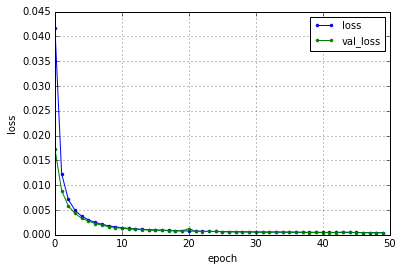

hiden node = 12
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0305 - val_loss: 0.0106
Epoch 2/50
5s - loss: 0.0073 - val_loss: 0.0049
Epoch 3/50
5s - loss: 0.0039 - val_loss: 0.0030
Epoch 4/50
5s - loss: 0.0026 - val_loss: 0.0022
Epoch 5/50
5s - loss: 0.0020 - val_loss: 0.0017
Epoch 6/50
5s - loss: 0.0016 - val_loss: 0.0014
Epoch 7/50
5s - loss: 0.0013 - val_loss: 0.0013
Epoch 8/50
5s - loss: 0.0012 - val_loss: 0.0011
Epoch 9/50
5s - loss: 0.0011 - val_loss: 9.9926e-04
Epoch 10/50
5s - loss: 9.9490e-04 - val_loss: 9.8702e-04
Epoch 11/50
5s - loss: 9.1818e-04 - val_loss: 9.3487e-04
Epoch 12/50
5s - loss: 8.6157e-04 - val_loss: 8.4052e-04
Epoch 13/50
5s - loss: 8.0571e-04 - val_loss: 7.6020e-04
Epoch 14/50
5s - loss: 7.6272e-04 - val_loss: 7.1333e-04
Epoch 15/50
5s - loss: 7.1404e-04 - val_loss: 7.0017e-04
Epoch 16/50
5s - loss: 6.8950e-04 - val_loss: 6.2577e-04
Epoch 17/50
5s - loss: 6.5791e-04 - val_loss: 6.3577e-04
Epoch 18/50
5s - loss: 6.3386e-04 - val_lo

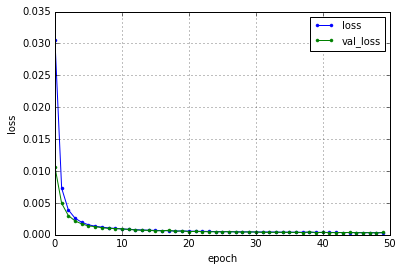

hiden node = 16
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0240 - val_loss: 0.0090
Epoch 2/50
5s - loss: 0.0064 - val_loss: 0.0045
Epoch 3/50
5s - loss: 0.0036 - val_loss: 0.0029
Epoch 4/50
5s - loss: 0.0025 - val_loss: 0.0021
Epoch 5/50
5s - loss: 0.0018 - val_loss: 0.0016
Epoch 6/50
5s - loss: 0.0014 - val_loss: 0.0012
Epoch 7/50
5s - loss: 0.0011 - val_loss: 0.0010
Epoch 8/50
4s - loss: 9.5840e-04 - val_loss: 9.0356e-04
Epoch 9/50
5s - loss: 8.3725e-04 - val_loss: 8.0550e-04
Epoch 10/50
5s - loss: 7.4329e-04 - val_loss: 6.9977e-04
Epoch 11/50
5s - loss: 6.6915e-04 - val_loss: 6.2781e-04
Epoch 12/50
5s - loss: 6.1096e-04 - val_loss: 5.7322e-04
Epoch 13/50
5s - loss: 5.6529e-04 - val_loss: 5.4915e-04
Epoch 14/50
5s - loss: 5.2460e-04 - val_loss: 4.8092e-04
Epoch 15/50
5s - loss: 4.9590e-04 - val_loss: 5.0348e-04
Epoch 16/50
5s - loss: 4.6359e-04 - val_loss: 4.1386e-04
Epoch 17/50
5s - loss: 4.4153e-04 - val_loss: 4.1316e-04
Epoch 18/50
5s - loss: 4.2283e

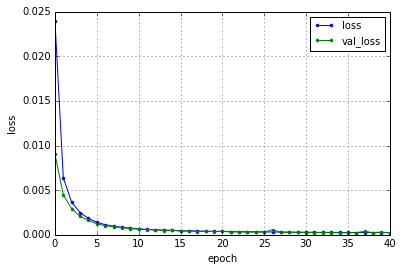

hiden node = 32
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0138 - val_loss: 0.0033
Epoch 2/50
5s - loss: 0.0024 - val_loss: 0.0019
Epoch 3/50
5s - loss: 0.0014 - val_loss: 0.0011
Epoch 4/50
5s - loss: 0.0010 - val_loss: 8.2199e-04
Epoch 5/50
5s - loss: 7.8728e-04 - val_loss: 6.5585e-04
Epoch 6/50
5s - loss: 6.5782e-04 - val_loss: 5.7586e-04
Epoch 7/50
5s - loss: 5.7275e-04 - val_loss: 5.0071e-04
Epoch 8/50
5s - loss: 5.0797e-04 - val_loss: 6.4187e-04
Epoch 9/50
5s - loss: 4.5574e-04 - val_loss: 4.5788e-04
Epoch 10/50
5s - loss: 4.1492e-04 - val_loss: 3.8160e-04
Epoch 11/50
5s - loss: 3.8343e-04 - val_loss: 3.8721e-04
Epoch 12/50
5s - loss: 3.6253e-04 - val_loss: 3.3720e-04
Epoch 13/50
5s - loss: 3.3852e-04 - val_loss: 3.2809e-04
Epoch 14/50
5s - loss: 3.2068e-04 - val_loss: 2.6062e-04
Epoch 15/50
5s - loss: 3.0594e-04 - val_loss: 2.7281e-04
Epoch 16/50
5s - loss: 2.9045e-04 - val_loss: 2.4995e-04
Epoch 17/50
3s - loss: 2.7680e-04 - val_loss: 2.6862e-04
Ep

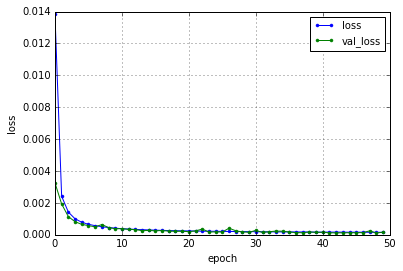

hiden node = 64
Train on 31839 samples, validate on 31839 samples
Epoch 1/50
5s - loss: 0.0074 - val_loss: 0.0018
Epoch 2/50
5s - loss: 0.0012 - val_loss: 8.2212e-04
Epoch 3/50
5s - loss: 7.1008e-04 - val_loss: 6.4268e-04
Epoch 4/50
5s - loss: 5.0815e-04 - val_loss: 4.3329e-04
Epoch 5/50
5s - loss: 4.0228e-04 - val_loss: 3.7351e-04
Epoch 6/50
5s - loss: 3.3947e-04 - val_loss: 2.9529e-04
Epoch 7/50
5s - loss: 2.9841e-04 - val_loss: 2.3279e-04
Epoch 8/50
5s - loss: 2.6223e-04 - val_loss: 2.0578e-04
Epoch 9/50
5s - loss: 2.4259e-04 - val_loss: 1.8896e-04
Epoch 10/50
5s - loss: 2.2680e-04 - val_loss: 2.1680e-04
Epoch 11/50
5s - loss: 2.2057e-04 - val_loss: 1.6539e-04
Epoch 12/50
5s - loss: 2.0667e-04 - val_loss: 1.7365e-04
Epoch 13/50
5s - loss: 1.9597e-04 - val_loss: 1.5812e-04
Epoch 14/50
4s - loss: 1.8760e-04 - val_loss: 1.8807e-04
Epoch 15/50
5s - loss: 1.7921e-04 - val_loss: 1.3956e-04
Epoch 16/50
5s - loss: 1.7849e-04 - val_loss: 1.4430e-04
Epoch 17/50
5s - loss: 1.7510e-04 - val_los

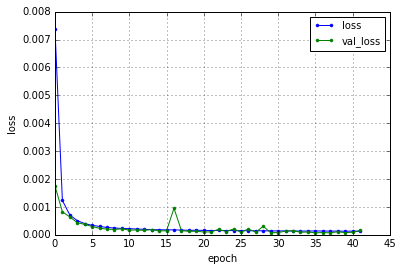

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =15918
SourceData's aborting data = 6
window shape is (15918, 64, 3)
(15918, 64, 3)
hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0235 - val_loss: 0.0132
Epoch 2/50
1s - loss: 0.0109 - val_loss: 0.0093
Epoch 3/50
1s - loss: 0.0082 - val_loss: 0.0073
Epoch 4/50
1s - loss: 0.0065 - val_loss: 0.0058
Epoch 5/50
1s - loss: 0.0054 - val_loss: 0.0050
Epoch 6/50
1s - loss: 0.0047 - val_loss: 0.0045
Epoch 7/50
1s - loss: 0.0043 - val_loss: 0.0042
Epoch 8/50
1s - loss: 0.0041 - val_loss: 0.0040
Epoch 9/50
1s - loss: 0.0039 - val_loss: 0.0038
Epoch 10/50
1s - loss: 0.0037 - val_loss: 0.0036
Epoch 11/50
0s - loss: 0.0036 - val_loss: 0.0035
Epoch 12/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 13/50
1s - loss: 0.0032 - val_loss: 0.0031
Epoch 14/50
1s - loss: 0.0030 - val_loss: 0.0029
Epoch 15/50
1s - loss: 0.0028 - val_loss: 0.0027
Epoch 16/50
1s - l

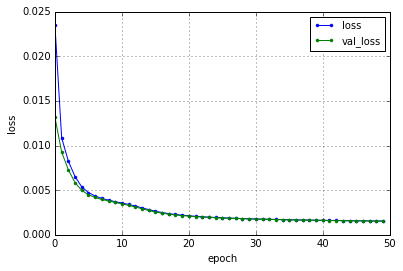

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0210 - val_loss: 0.0088
Epoch 2/50
1s - loss: 0.0067 - val_loss: 0.0052
Epoch 3/50
1s - loss: 0.0044 - val_loss: 0.0038
Epoch 4/50
1s - loss: 0.0034 - val_loss: 0.0031
Epoch 5/50
1s - loss: 0.0028 - val_loss: 0.0026
Epoch 6/50
1s - loss: 0.0024 - val_loss: 0.0023
Epoch 7/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 8/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 9/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 10/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 11/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 12/50
1s - loss: 0.0013 - val_loss: 0.0013
Epoch 13/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 14/50
1s - loss: 0.0012 - val_loss: 0.0012
Epoch 15/50
1s - loss: 0.0011 - val_loss: 0.0011
Epoch 16/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 17/50
1s - loss: 0.0010 - val_loss: 9.9709e-04
Epoch 18/50
1s - loss: 9.8383e-04 - val_loss: 9.5772e-04
Epoch 19/50
1s - loss: 9.4229e-04 - val_loss: 9.13

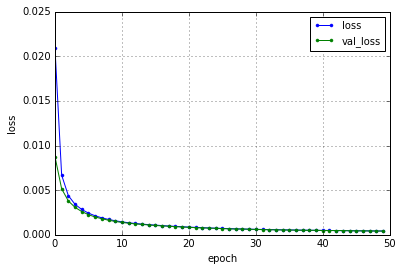

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
0s - loss: 0.0161 - val_loss: 0.0073
Epoch 2/50
1s - loss: 0.0054 - val_loss: 0.0040
Epoch 3/50
1s - loss: 0.0034 - val_loss: 0.0028
Epoch 4/50
1s - loss: 0.0025 - val_loss: 0.0022
Epoch 5/50
1s - loss: 0.0019 - val_loss: 0.0018
Epoch 6/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 7/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 8/50
1s - loss: 0.0013 - val_loss: 0.0012
Epoch 9/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
1s - loss: 0.0011 - val_loss: 0.0010
Epoch 11/50
1s - loss: 0.0010 - val_loss: 9.6345e-04
Epoch 12/50
1s - loss: 9.4365e-04 - val_loss: 9.0471e-04
Epoch 13/50
1s - loss: 8.8638e-04 - val_loss: 8.6000e-04
Epoch 14/50
1s - loss: 8.4028e-04 - val_loss: 8.0810e-04
Epoch 15/50
1s - loss: 7.9799e-04 - val_loss: 7.7030e-04
Epoch 16/50
1s - loss: 7.5812e-04 - val_loss: 7.3193e-04
Epoch 17/50
1s - loss: 7.2379e-04 - val_loss: 7.1191e-04
Epoch 18/50
1s - loss: 6.9248e-04 - val_loss: 6.8659e-04
E

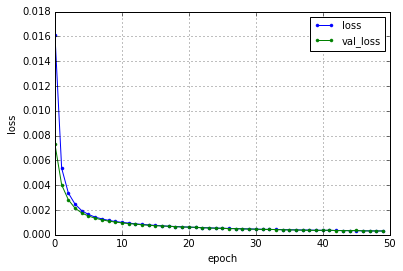

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0147 - val_loss: 0.0061
Epoch 2/50
1s - loss: 0.0044 - val_loss: 0.0033
Epoch 3/50
1s - loss: 0.0028 - val_loss: 0.0023
Epoch 4/50
1s - loss: 0.0021 - val_loss: 0.0018
Epoch 5/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 6/50
1s - loss: 0.0014 - val_loss: 0.0013
Epoch 7/50
1s - loss: 0.0012 - val_loss: 0.0011
Epoch 8/50
1s - loss: 0.0010 - val_loss: 9.8216e-04
Epoch 9/50
1s - loss: 9.4960e-04 - val_loss: 9.0099e-04
Epoch 10/50
1s - loss: 8.6658e-04 - val_loss: 8.2942e-04
Epoch 11/50
1s - loss: 7.9945e-04 - val_loss: 7.9076e-04
Epoch 12/50
1s - loss: 7.4373e-04 - val_loss: 7.1672e-04
Epoch 13/50
1s - loss: 6.9470e-04 - val_loss: 6.6450e-04
Epoch 14/50
1s - loss: 6.4876e-04 - val_loss: 6.1805e-04
Epoch 15/50
1s - loss: 6.1147e-04 - val_loss: 5.9110e-04
Epoch 16/50
1s - loss: 5.7572e-04 - val_loss: 5.7289e-04
Epoch 17/50
1s - loss: 5.4537e-04 - val_loss: 5.2367e-04
Epoch 18/50
1s - loss: 5.1846e-04 

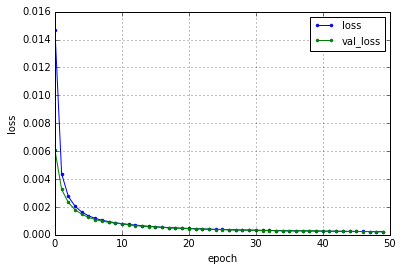

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0126 - val_loss: 0.0034
Epoch 2/50
1s - loss: 0.0025 - val_loss: 0.0018
Epoch 3/50
1s - loss: 0.0015 - val_loss: 0.0012
Epoch 4/50
1s - loss: 0.0011 - val_loss: 9.3745e-04
Epoch 5/50
1s - loss: 8.5113e-04 - val_loss: 7.8030e-04
Epoch 6/50
1s - loss: 7.1221e-04 - val_loss: 6.5370e-04
Epoch 7/50
1s - loss: 6.2010e-04 - val_loss: 5.7605e-04
Epoch 8/50
1s - loss: 5.5203e-04 - val_loss: 5.1451e-04
Epoch 9/50
1s - loss: 4.9684e-04 - val_loss: 4.6425e-04
Epoch 10/50
1s - loss: 4.5083e-04 - val_loss: 4.2726e-04
Epoch 11/50
1s - loss: 4.1791e-04 - val_loss: 3.9213e-04
Epoch 12/50
1s - loss: 3.8845e-04 - val_loss: 3.6497e-04
Epoch 13/50
1s - loss: 3.6037e-04 - val_loss: 3.5019e-04
Epoch 14/50
1s - loss: 3.4084e-04 - val_loss: 3.2587e-04
Epoch 15/50
1s - loss: 3.2061e-04 - val_loss: 3.0788e-04
Epoch 16/50
1s - loss: 3.0599e-04 - val_loss: 2.9004e-04
Epoch 17/50
1s - loss: 2.9098e-04 - val_loss: 2.7830e-04
Ep

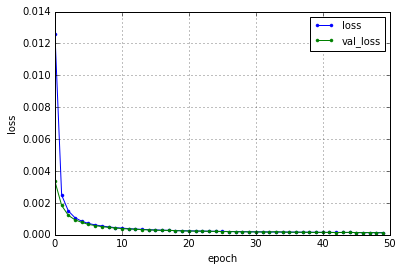

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0068 - val_loss: 0.0019
Epoch 2/50
1s - loss: 0.0014 - val_loss: 0.0010
Epoch 3/50
1s - loss: 8.6580e-04 - val_loss: 7.1494e-04
Epoch 4/50
1s - loss: 6.4173e-04 - val_loss: 5.5745e-04
Epoch 5/50
1s - loss: 5.1031e-04 - val_loss: 4.5909e-04
Epoch 6/50
1s - loss: 4.2782e-04 - val_loss: 3.8525e-04
Epoch 7/50
1s - loss: 3.6647e-04 - val_loss: 3.3431e-04
Epoch 8/50
1s - loss: 3.2435e-04 - val_loss: 2.9991e-04
Epoch 9/50
1s - loss: 2.8914e-04 - val_loss: 2.7136e-04
Epoch 10/50
1s - loss: 2.6396e-04 - val_loss: 2.5341e-04
Epoch 11/50
1s - loss: 2.4299e-04 - val_loss: 2.3165e-04
Epoch 12/50
1s - loss: 2.2431e-04 - val_loss: 2.1171e-04
Epoch 13/50
1s - loss: 2.0949e-04 - val_loss: 1.9747e-04
Epoch 14/50
1s - loss: 1.9758e-04 - val_loss: 1.8740e-04
Epoch 15/50
1s - loss: 1.8498e-04 - val_loss: 1.7829e-04
Epoch 16/50
1s - loss: 1.7657e-04 - val_loss: 1.6697e-04
Epoch 17/50
1s - loss: 1.6725e-04 - val_loss: 1

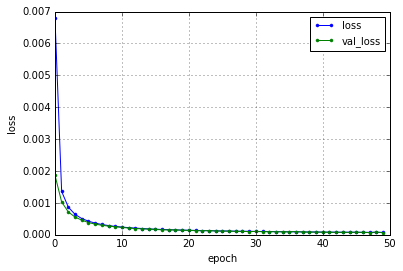

hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.2027 - val_loss: 0.0347
Epoch 2/50
1s - loss: 0.0276 - val_loss: 0.0235
Epoch 3/50
1s - loss: 0.0210 - val_loss: 0.0193
Epoch 4/50
1s - loss: 0.0176 - val_loss: 0.0151
Epoch 5/50
1s - loss: 0.0129 - val_loss: 0.0108
Epoch 6/50
1s - loss: 0.0095 - val_loss: 0.0087
Epoch 7/50
1s - loss: 0.0080 - val_loss: 0.0073
Epoch 8/50
1s - loss: 0.0071 - val_loss: 0.0068
Epoch 9/50
1s - loss: 0.0064 - val_loss: 0.0064
Epoch 10/50
1s - loss: 0.0057 - val_loss: 0.0053
Epoch 11/50
1s - loss: 0.0051 - val_loss: 0.0042
Epoch 12/50
1s - loss: 0.0048 - val_loss: 0.0045
Epoch 13/50
1s - loss: 0.0045 - val_loss: 0.0038
Epoch 14/50
1s - loss: 0.0043 - val_loss: 0.0036
Epoch 15/50
1s - loss: 0.0043 - val_loss: 0.0048
Epoch 16/50
1s - loss: 0.0039 - val_loss: 0.0047
Epoch 17/50
1s - loss: 0.0040 - val_loss: 0.0032
Epoch 18/50
1s - loss: 0.0039 - val_loss: 0.0033
Epoch 19/50
1s - loss: 0.0037 - val_loss: 0.0036
Epoch 20/50
1

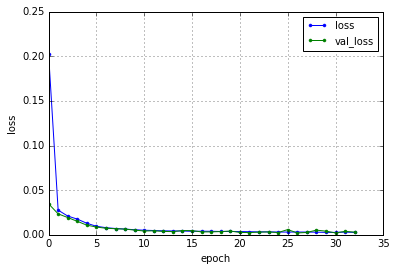

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.1536 - val_loss: 0.0262
Epoch 2/50
1s - loss: 0.0214 - val_loss: 0.0183
Epoch 3/50
1s - loss: 0.0132 - val_loss: 0.0097
Epoch 4/50
1s - loss: 0.0080 - val_loss: 0.0061
Epoch 5/50
1s - loss: 0.0060 - val_loss: 0.0051
Epoch 6/50
1s - loss: 0.0050 - val_loss: 0.0049
Epoch 7/50
1s - loss: 0.0044 - val_loss: 0.0047
Epoch 8/50
1s - loss: 0.0039 - val_loss: 0.0058
Epoch 9/50
1s - loss: 0.0037 - val_loss: 0.0059
Epoch 10/50
1s - loss: 0.0034 - val_loss: 0.0042
Epoch 11/50
1s - loss: 0.0034 - val_loss: 0.0022
Epoch 12/50
1s - loss: 0.0030 - val_loss: 0.0021
Epoch 13/50
1s - loss: 0.0029 - val_loss: 0.0046
Epoch 14/50
1s - loss: 0.0029 - val_loss: 0.0022
Epoch 15/50
1s - loss: 0.0029 - val_loss: 0.0032
Epoch 16/50
1s - loss: 0.0028 - val_loss: 0.0079
Epoch 17/50
1s - loss: 0.0025 - val_loss: 0.0021
Epoch 18/50
1s - loss: 0.0026 - val_loss: 0.0031


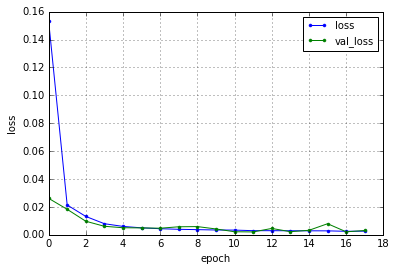

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.1041 - val_loss: 0.0182
Epoch 2/50
1s - loss: 0.0122 - val_loss: 0.0081
Epoch 3/50
1s - loss: 0.0072 - val_loss: 0.0063
Epoch 4/50
1s - loss: 0.0054 - val_loss: 0.0042
Epoch 5/50
1s - loss: 0.0047 - val_loss: 0.0036
Epoch 6/50
1s - loss: 0.0041 - val_loss: 0.0036
Epoch 7/50
1s - loss: 0.0039 - val_loss: 0.0031
Epoch 8/50
1s - loss: 0.0035 - val_loss: 0.0030
Epoch 9/50
1s - loss: 0.0034 - val_loss: 0.0030
Epoch 10/50
1s - loss: 0.0032 - val_loss: 0.0020
Epoch 11/50
1s - loss: 0.0030 - val_loss: 0.0054
Epoch 12/50
1s - loss: 0.0030 - val_loss: 0.0038
Epoch 13/50
1s - loss: 0.0027 - val_loss: 0.0020
Epoch 14/50
1s - loss: 0.0025 - val_loss: 0.0019
Epoch 15/50
1s - loss: 0.0026 - val_loss: 0.0020
Epoch 16/50
1s - loss: 0.0028 - val_loss: 0.0030
Epoch 17/50
0s - loss: 0.0026 - val_loss: 0.0034
Epoch 18/50
1s - loss: 0.0027 - val_loss: 0.0013
Epoch 19/50
1s - loss: 0.0024 - val_loss: 0.0015
Epoch 20/50


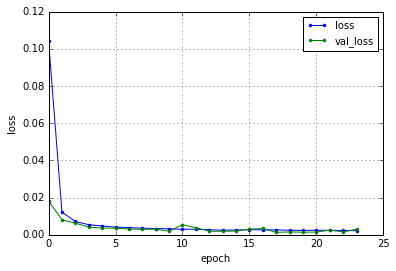

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0880 - val_loss: 0.0178
Epoch 2/50
1s - loss: 0.0111 - val_loss: 0.0080
Epoch 3/50
1s - loss: 0.0063 - val_loss: 0.0045
Epoch 4/50
1s - loss: 0.0049 - val_loss: 0.0047
Epoch 5/50
1s - loss: 0.0040 - val_loss: 0.0041
Epoch 6/50
1s - loss: 0.0034 - val_loss: 0.0024
Epoch 7/50
1s - loss: 0.0031 - val_loss: 0.0021
Epoch 8/50
1s - loss: 0.0028 - val_loss: 0.0035
Epoch 9/50
1s - loss: 0.0026 - val_loss: 0.0015
Epoch 10/50
1s - loss: 0.0026 - val_loss: 0.0061
Epoch 11/50
1s - loss: 0.0026 - val_loss: 0.0018
Epoch 12/50
1s - loss: 0.0025 - val_loss: 0.0020
Epoch 13/50
1s - loss: 0.0028 - val_loss: 0.0037
Epoch 14/50
1s - loss: 0.0027 - val_loss: 0.0016
Epoch 15/50
1s - loss: 0.0022 - val_loss: 0.0014
Epoch 16/50
1s - loss: 0.0023 - val_loss: 0.0018
Epoch 17/50
1s - loss: 0.0023 - val_loss: 0.0021
Epoch 18/50
1s - loss: 0.0023 - val_loss: 0.0034
Epoch 19/50
1s - loss: 0.0023 - val_loss: 0.0017
Epoch 20/50


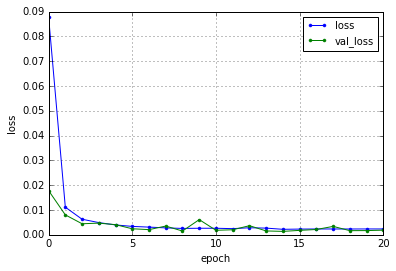

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0644 - val_loss: 0.0085
Epoch 2/50
1s - loss: 0.0062 - val_loss: 0.0120
Epoch 3/50
1s - loss: 0.0041 - val_loss: 0.0028
Epoch 4/50
1s - loss: 0.0035 - val_loss: 0.0043
Epoch 5/50
1s - loss: 0.0031 - val_loss: 0.0048
Epoch 6/50
1s - loss: 0.0029 - val_loss: 0.0020
Epoch 7/50
1s - loss: 0.0026 - val_loss: 0.0024
Epoch 8/50
1s - loss: 0.0028 - val_loss: 0.0053
Epoch 9/50
1s - loss: 0.0025 - val_loss: 0.0013
Epoch 10/50
1s - loss: 0.0027 - val_loss: 0.0059
Epoch 11/50
1s - loss: 0.0026 - val_loss: 0.0011
Epoch 12/50
1s - loss: 0.0024 - val_loss: 0.0038
Epoch 13/50
1s - loss: 0.0025 - val_loss: 0.0021
Epoch 14/50
1s - loss: 0.0026 - val_loss: 0.0029
Epoch 15/50
1s - loss: 0.0024 - val_loss: 0.0025
Epoch 16/50
1s - loss: 0.0024 - val_loss: 0.0011
Epoch 17/50
1s - loss: 0.0023 - val_loss: 0.0012
Epoch 18/50
1s - loss: 0.0024 - val_loss: 0.0016
Epoch 19/50
1s - loss: 0.0024 - val_loss: 0.0011
Epoch 20/50


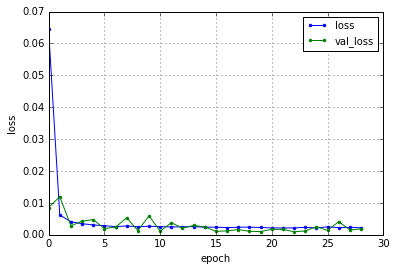

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0454 - val_loss: 0.0049
Epoch 2/50
1s - loss: 0.0041 - val_loss: 0.0037
Epoch 3/50
1s - loss: 0.0033 - val_loss: 0.0034
Epoch 4/50
1s - loss: 0.0029 - val_loss: 0.0031
Epoch 5/50
1s - loss: 0.0028 - val_loss: 0.0030
Epoch 6/50
1s - loss: 0.0027 - val_loss: 0.0017
Epoch 7/50
1s - loss: 0.0025 - val_loss: 0.0034
Epoch 8/50
1s - loss: 0.0027 - val_loss: 0.0024
Epoch 9/50
1s - loss: 0.0024 - val_loss: 0.0013
Epoch 10/50
1s - loss: 0.0026 - val_loss: 0.0021
Epoch 11/50
1s - loss: 0.0026 - val_loss: 0.0035
Epoch 12/50
1s - loss: 0.0025 - val_loss: 0.0025
Epoch 13/50
1s - loss: 0.0024 - val_loss: 0.0025
Epoch 14/50
1s - loss: 0.0024 - val_loss: 0.0034
Epoch 15/50
1s - loss: 0.0025 - val_loss: 0.0041


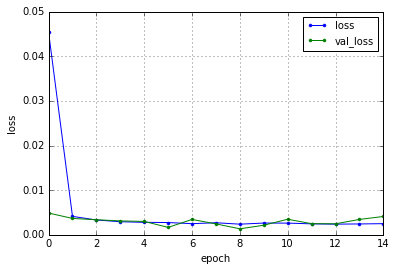

hiden node = 4
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0855 - val_loss: 0.0601
Epoch 2/50
1s - loss: 0.0519 - val_loss: 0.0451
Epoch 3/50
1s - loss: 0.0401 - val_loss: 0.0357
Epoch 4/50
1s - loss: 0.0323 - val_loss: 0.0293
Epoch 5/50
1s - loss: 0.0271 - val_loss: 0.0249
Epoch 6/50
1s - loss: 0.0233 - val_loss: 0.0218
Epoch 7/50
1s - loss: 0.0205 - val_loss: 0.0192
Epoch 8/50
1s - loss: 0.0181 - val_loss: 0.0170
Epoch 9/50
1s - loss: 0.0161 - val_loss: 0.0152
Epoch 10/50
1s - loss: 0.0144 - val_loss: 0.0137
Epoch 11/50
1s - loss: 0.0130 - val_loss: 0.0123
Epoch 12/50
1s - loss: 0.0118 - val_loss: 0.0112
Epoch 13/50
1s - loss: 0.0107 - val_loss: 0.0102
Epoch 14/50
1s - loss: 0.0099 - val_loss: 0.0095
Epoch 15/50
1s - loss: 0.0092 - val_loss: 0.0089
Epoch 16/50
0s - loss: 0.0086 - val_loss: 0.0084
Epoch 17/50
0s - loss: 0.0081 - val_loss: 0.0078
Epoch 18/50
0s - loss: 0.0077 - val_loss: 0.0075
Epoch 19/50
0s - loss: 0.0073 - val_loss: 0.0071
Epoch 20/50
0

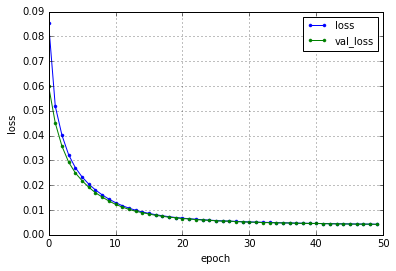

hiden node = 8
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0678 - val_loss: 0.0401
Epoch 2/50
1s - loss: 0.0315 - val_loss: 0.0249
Epoch 3/50
1s - loss: 0.0209 - val_loss: 0.0176
Epoch 4/50
1s - loss: 0.0154 - val_loss: 0.0135
Epoch 5/50
1s - loss: 0.0121 - val_loss: 0.0109
Epoch 6/50
1s - loss: 0.0100 - val_loss: 0.0091
Epoch 7/50
1s - loss: 0.0085 - val_loss: 0.0079
Epoch 8/50
1s - loss: 0.0075 - val_loss: 0.0070
Epoch 9/50
1s - loss: 0.0067 - val_loss: 0.0063
Epoch 10/50
1s - loss: 0.0061 - val_loss: 0.0058
Epoch 11/50
0s - loss: 0.0056 - val_loss: 0.0053
Epoch 12/50
1s - loss: 0.0051 - val_loss: 0.0049
Epoch 13/50
1s - loss: 0.0047 - val_loss: 0.0045
Epoch 14/50
1s - loss: 0.0044 - val_loss: 0.0042
Epoch 15/50
1s - loss: 0.0041 - val_loss: 0.0039
Epoch 16/50
1s - loss: 0.0038 - val_loss: 0.0037
Epoch 17/50
1s - loss: 0.0036 - val_loss: 0.0034
Epoch 18/50
1s - loss: 0.0034 - val_loss: 0.0033
Epoch 19/50
1s - loss: 0.0032 - val_loss: 0.0032
Epoch 20/50
1

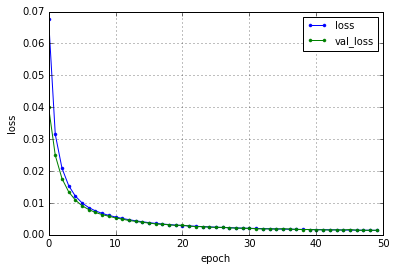

hiden node = 12
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0625 - val_loss: 0.0331
Epoch 2/50
1s - loss: 0.0246 - val_loss: 0.0187
Epoch 3/50
1s - loss: 0.0156 - val_loss: 0.0129
Epoch 4/50
0s - loss: 0.0111 - val_loss: 0.0096
Epoch 5/50
0s - loss: 0.0086 - val_loss: 0.0077
Epoch 6/50
1s - loss: 0.0070 - val_loss: 0.0064
Epoch 7/50
1s - loss: 0.0059 - val_loss: 0.0054
Epoch 8/50
1s - loss: 0.0051 - val_loss: 0.0047
Epoch 9/50
1s - loss: 0.0044 - val_loss: 0.0042
Epoch 10/50
1s - loss: 0.0039 - val_loss: 0.0036
Epoch 11/50
1s - loss: 0.0035 - val_loss: 0.0033
Epoch 12/50
1s - loss: 0.0032 - val_loss: 0.0031
Epoch 13/50
1s - loss: 0.0029 - val_loss: 0.0028
Epoch 14/50
1s - loss: 0.0027 - val_loss: 0.0026
Epoch 15/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 16/50
1s - loss: 0.0024 - val_loss: 0.0023
Epoch 17/50
1s - loss: 0.0022 - val_loss: 0.0021
Epoch 18/50
1s - loss: 0.0021 - val_loss: 0.0020
Epoch 19/50
1s - loss: 0.0020 - val_loss: 0.0020
Epoch 20/50


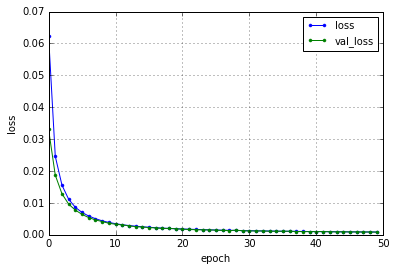

hiden node = 16
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0593 - val_loss: 0.0262
Epoch 2/50
1s - loss: 0.0188 - val_loss: 0.0140
Epoch 3/50
1s - loss: 0.0115 - val_loss: 0.0094
Epoch 4/50
1s - loss: 0.0082 - val_loss: 0.0071
Epoch 5/50
1s - loss: 0.0063 - val_loss: 0.0056
Epoch 6/50
1s - loss: 0.0051 - val_loss: 0.0047
Epoch 7/50
1s - loss: 0.0043 - val_loss: 0.0039
Epoch 8/50
1s - loss: 0.0036 - val_loss: 0.0033
Epoch 9/50
1s - loss: 0.0031 - val_loss: 0.0029
Epoch 10/50
1s - loss: 0.0028 - val_loss: 0.0026
Epoch 11/50
1s - loss: 0.0025 - val_loss: 0.0024
Epoch 12/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 13/50
0s - loss: 0.0021 - val_loss: 0.0021
Epoch 14/50
1s - loss: 0.0020 - val_loss: 0.0019
Epoch 15/50
1s - loss: 0.0018 - val_loss: 0.0017
Epoch 16/50
1s - loss: 0.0017 - val_loss: 0.0016
Epoch 17/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 18/50
1s - loss: 0.0015 - val_loss: 0.0014
Epoch 19/50
1s - loss: 0.0014 - val_loss: 0.0014
Epoch 20/50


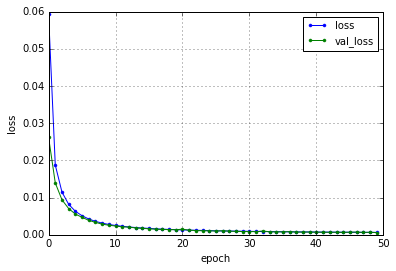

hiden node = 32
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0333 - val_loss: 0.0127
Epoch 2/50
1s - loss: 0.0089 - val_loss: 0.0064
Epoch 3/50
1s - loss: 0.0052 - val_loss: 0.0042
Epoch 4/50
1s - loss: 0.0036 - val_loss: 0.0031
Epoch 5/50
1s - loss: 0.0027 - val_loss: 0.0026
Epoch 6/50
1s - loss: 0.0022 - val_loss: 0.0020
Epoch 7/50
1s - loss: 0.0019 - val_loss: 0.0017
Epoch 8/50
1s - loss: 0.0016 - val_loss: 0.0015
Epoch 9/50
1s - loss: 0.0015 - val_loss: 0.0013
Epoch 10/50
0s - loss: 0.0013 - val_loss: 0.0014
Epoch 11/50
0s - loss: 0.0012 - val_loss: 0.0011
Epoch 12/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 13/50
1s - loss: 0.0010 - val_loss: 9.8860e-04
Epoch 14/50
1s - loss: 9.5797e-04 - val_loss: 9.0911e-04
Epoch 15/50
1s - loss: 9.0033e-04 - val_loss: 8.4752e-04
Epoch 16/50
1s - loss: 8.5881e-04 - val_loss: 7.8415e-04
Epoch 17/50
1s - loss: 8.1071e-04 - val_loss: 8.2385e-04
Epoch 18/50
1s - loss: 7.7535e-04 - val_loss: 8.6863e-04
Epoch 19/50
1s - 

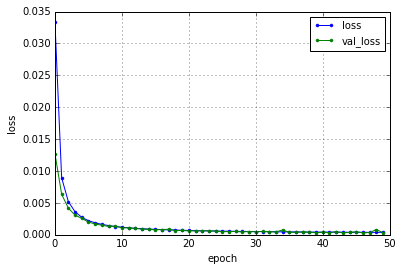

hiden node = 64
Train on 15918 samples, validate on 15918 samples
Epoch 1/50
1s - loss: 0.0274 - val_loss: 0.0063
Epoch 2/50
1s - loss: 0.0044 - val_loss: 0.0031
Epoch 3/50
1s - loss: 0.0025 - val_loss: 0.0021
Epoch 4/50
1s - loss: 0.0018 - val_loss: 0.0015
Epoch 5/50
1s - loss: 0.0014 - val_loss: 0.0012
Epoch 6/50
0s - loss: 0.0011 - val_loss: 9.9390e-04
Epoch 7/50
0s - loss: 9.7586e-04 - val_loss: 9.2538e-04
Epoch 8/50
1s - loss: 8.5649e-04 - val_loss: 7.6912e-04
Epoch 9/50
1s - loss: 7.6711e-04 - val_loss: 6.7131e-04
Epoch 10/50
1s - loss: 7.0396e-04 - val_loss: 6.3839e-04
Epoch 11/50
1s - loss: 6.4954e-04 - val_loss: 5.6067e-04
Epoch 12/50
1s - loss: 6.0773e-04 - val_loss: 5.4347e-04
Epoch 13/50
1s - loss: 5.7119e-04 - val_loss: 4.9378e-04
Epoch 14/50
1s - loss: 5.4795e-04 - val_loss: 5.2371e-04
Epoch 15/50
1s - loss: 5.1608e-04 - val_loss: 4.4580e-04
Epoch 16/50
1s - loss: 4.9225e-04 - val_loss: 4.9463e-04
Epoch 17/50
1s - loss: 4.7765e-04 - val_loss: 4.2385e-04
Epoch 18/50
1s - l

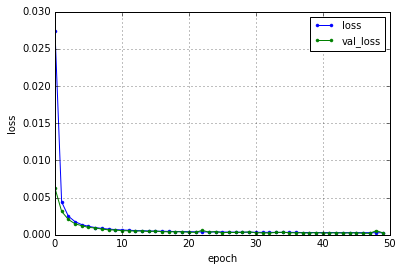

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =7957
SourceData's aborting data = 22
window shape is (7957, 128, 3)
(7957, 128, 3)
hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0374 - val_loss: 0.0281
Epoch 2/50
0s - loss: 0.0241 - val_loss: 0.0213
Epoch 3/50
0s - loss: 0.0195 - val_loss: 0.0178
Epoch 4/50
0s - loss: 0.0165 - val_loss: 0.0154
Epoch 5/50
0s - loss: 0.0145 - val_loss: 0.0136
Epoch 6/50
0s - loss: 0.0130 - val_loss: 0.0123
Epoch 7/50
0s - loss: 0.0118 - val_loss: 0.0113
Epoch 8/50
0s - loss: 0.0109 - val_loss: 0.0105
Epoch 9/50
0s - loss: 0.0101 - val_loss: 0.0098
Epoch 10/50
0s - loss: 0.0096 - val_loss: 0.0093
Epoch 11/50
0s - loss: 0.0091 - val_loss: 0.0089
Epoch 12/50
0s - loss: 0.0088 - val_loss: 0.0086
Epoch 13/50
0s - loss: 0.0085 - val_loss: 0.0084
Epoch 14/50
0s - loss: 0.0083 - val_loss: 0.0082
Epoch 15/50
0s - loss: 0.0081 - val_loss: 0.0080
Epoch 16/50
0s - los

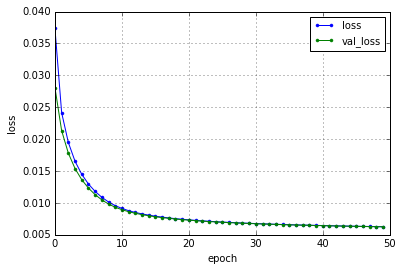

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0319 - val_loss: 0.0219
Epoch 2/50
0s - loss: 0.0180 - val_loss: 0.0150
Epoch 3/50
0s - loss: 0.0133 - val_loss: 0.0120
Epoch 4/50
0s - loss: 0.0111 - val_loss: 0.0103
Epoch 5/50
0s - loss: 0.0097 - val_loss: 0.0091
Epoch 6/50
0s - loss: 0.0087 - val_loss: 0.0082
Epoch 7/50
0s - loss: 0.0078 - val_loss: 0.0075
Epoch 8/50
0s - loss: 0.0072 - val_loss: 0.0069
Epoch 9/50
0s - loss: 0.0067 - val_loss: 0.0064
Epoch 10/50
0s - loss: 0.0062 - val_loss: 0.0061
Epoch 11/50
0s - loss: 0.0059 - val_loss: 0.0057
Epoch 12/50
0s - loss: 0.0056 - val_loss: 0.0055
Epoch 13/50
0s - loss: 0.0053 - val_loss: 0.0052
Epoch 14/50
0s - loss: 0.0051 - val_loss: 0.0050
Epoch 15/50
0s - loss: 0.0049 - val_loss: 0.0048
Epoch 16/50
0s - loss: 0.0047 - val_loss: 0.0046
Epoch 17/50
0s - loss: 0.0045 - val_loss: 0.0044
Epoch 18/50
0s - loss: 0.0044 - val_loss: 0.0043
Epoch 19/50
0s - loss: 0.0042 - val_loss: 0.0041
Epoch 20/50
0s 

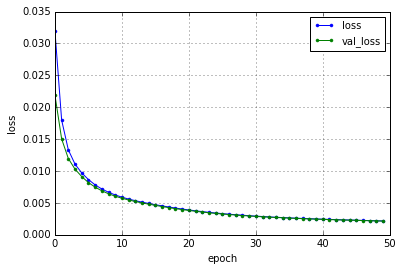

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0360 - val_loss: 0.0233
Epoch 2/50
0s - loss: 0.0182 - val_loss: 0.0143
Epoch 3/50
0s - loss: 0.0119 - val_loss: 0.0100
Epoch 4/50
0s - loss: 0.0091 - val_loss: 0.0083
Epoch 5/50
0s - loss: 0.0078 - val_loss: 0.0073
Epoch 6/50
0s - loss: 0.0070 - val_loss: 0.0066
Epoch 7/50
0s - loss: 0.0064 - val_loss: 0.0061
Epoch 8/50
0s - loss: 0.0059 - val_loss: 0.0056
Epoch 9/50
0s - loss: 0.0054 - val_loss: 0.0052
Epoch 10/50
0s - loss: 0.0051 - val_loss: 0.0049
Epoch 11/50
0s - loss: 0.0048 - val_loss: 0.0046
Epoch 12/50
0s - loss: 0.0045 - val_loss: 0.0044
Epoch 13/50
0s - loss: 0.0043 - val_loss: 0.0042
Epoch 14/50
0s - loss: 0.0041 - val_loss: 0.0039
Epoch 15/50
0s - loss: 0.0039 - val_loss: 0.0038
Epoch 16/50
0s - loss: 0.0037 - val_loss: 0.0036
Epoch 17/50
0s - loss: 0.0035 - val_loss: 0.0034
Epoch 18/50
0s - loss: 0.0034 - val_loss: 0.0033
Epoch 19/50
0s - loss: 0.0032 - val_loss: 0.0032
Epoch 20/50
0s

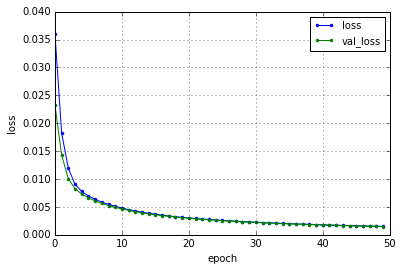

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0354 - val_loss: 0.0221
Epoch 2/50
0s - loss: 0.0170 - val_loss: 0.0128
Epoch 3/50
0s - loss: 0.0105 - val_loss: 0.0087
Epoch 4/50
0s - loss: 0.0078 - val_loss: 0.0071
Epoch 5/50
0s - loss: 0.0066 - val_loss: 0.0062
Epoch 6/50
0s - loss: 0.0058 - val_loss: 0.0055
Epoch 7/50
0s - loss: 0.0052 - val_loss: 0.0049
Epoch 8/50
0s - loss: 0.0047 - val_loss: 0.0044
Epoch 9/50
0s - loss: 0.0042 - val_loss: 0.0040
Epoch 10/50
0s - loss: 0.0039 - val_loss: 0.0037
Epoch 11/50
0s - loss: 0.0036 - val_loss: 0.0034
Epoch 12/50
0s - loss: 0.0033 - val_loss: 0.0032
Epoch 13/50
0s - loss: 0.0031 - val_loss: 0.0030
Epoch 14/50
0s - loss: 0.0029 - val_loss: 0.0028
Epoch 15/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 16/50
0s - loss: 0.0026 - val_loss: 0.0025
Epoch 17/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 18/50
0s - loss: 0.0024 - val_loss: 0.0023
Epoch 19/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 20/50
0s

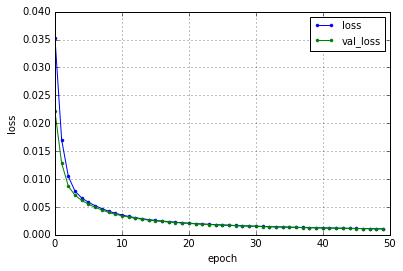

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0276 - val_loss: 0.0150
Epoch 2/50
0s - loss: 0.0108 - val_loss: 0.0079
Epoch 3/50
0s - loss: 0.0066 - val_loss: 0.0056
Epoch 4/50
0s - loss: 0.0050 - val_loss: 0.0045
Epoch 5/50
0s - loss: 0.0041 - val_loss: 0.0037
Epoch 6/50
0s - loss: 0.0035 - val_loss: 0.0032
Epoch 7/50
0s - loss: 0.0031 - val_loss: 0.0029
Epoch 8/50
0s - loss: 0.0027 - val_loss: 0.0026
Epoch 9/50
0s - loss: 0.0025 - val_loss: 0.0023
Epoch 10/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 11/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 12/50
0s - loss: 0.0019 - val_loss: 0.0019
Epoch 13/50
0s - loss: 0.0018 - val_loss: 0.0018
Epoch 14/50
0s - loss: 0.0017 - val_loss: 0.0017
Epoch 15/50
0s - loss: 0.0016 - val_loss: 0.0016
Epoch 16/50
0s - loss: 0.0015 - val_loss: 0.0015
Epoch 17/50
0s - loss: 0.0015 - val_loss: 0.0014
Epoch 18/50
0s - loss: 0.0014 - val_loss: 0.0014
Epoch 19/50
0s - loss: 0.0013 - val_loss: 0.0013
Epoch 20/50
0s

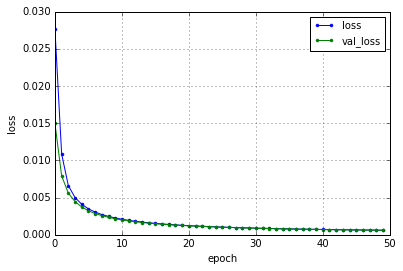

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0214 - val_loss: 0.0082
Epoch 2/50
0s - loss: 0.0058 - val_loss: 0.0043
Epoch 3/50
0s - loss: 0.0037 - val_loss: 0.0031
Epoch 4/50
0s - loss: 0.0028 - val_loss: 0.0025
Epoch 5/50
0s - loss: 0.0023 - val_loss: 0.0021
Epoch 6/50
0s - loss: 0.0020 - val_loss: 0.0018
Epoch 7/50
0s - loss: 0.0017 - val_loss: 0.0016
Epoch 8/50
0s - loss: 0.0016 - val_loss: 0.0015
Epoch 9/50
0s - loss: 0.0014 - val_loss: 0.0013
Epoch 10/50
0s - loss: 0.0013 - val_loss: 0.0012
Epoch 11/50
0s - loss: 0.0012 - val_loss: 0.0012
Epoch 12/50
0s - loss: 0.0011 - val_loss: 0.0011
Epoch 13/50
0s - loss: 0.0011 - val_loss: 0.0010
Epoch 14/50
0s - loss: 0.0010 - val_loss: 9.6856e-04
Epoch 15/50
0s - loss: 9.5052e-04 - val_loss: 9.1837e-04
Epoch 16/50
0s - loss: 9.0444e-04 - val_loss: 8.8330e-04
Epoch 17/50
0s - loss: 8.6676e-04 - val_loss: 8.3935e-04
Epoch 18/50
0s - loss: 8.3024e-04 - val_loss: 8.0462e-04
Epoch 19/50
0s - loss: 7.97

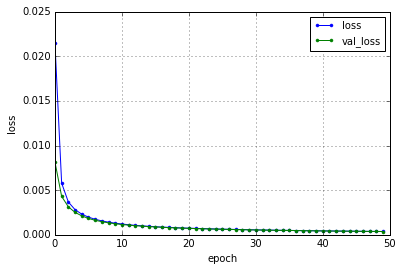

hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.5929 - val_loss: 0.2090
Epoch 2/50
0s - loss: 0.1137 - val_loss: 0.0686
Epoch 3/50
0s - loss: 0.0583 - val_loss: 0.0518
Epoch 4/50
0s - loss: 0.0479 - val_loss: 0.0448
Epoch 5/50
0s - loss: 0.0434 - val_loss: 0.0417
Epoch 6/50
0s - loss: 0.0411 - val_loss: 0.0417
Epoch 7/50
0s - loss: 0.0391 - val_loss: 0.0376
Epoch 8/50
0s - loss: 0.0376 - val_loss: 0.0363
Epoch 9/50
0s - loss: 0.0356 - val_loss: 0.0332
Epoch 10/50
0s - loss: 0.0321 - val_loss: 0.0302
Epoch 11/50
0s - loss: 0.0286 - val_loss: 0.0254
Epoch 12/50
0s - loss: 0.0247 - val_loss: 0.0271
Epoch 13/50
0s - loss: 0.0220 - val_loss: 0.0203
Epoch 14/50
0s - loss: 0.0204 - val_loss: 0.0209
Epoch 15/50
0s - loss: 0.0192 - val_loss: 0.0217
Epoch 16/50
0s - loss: 0.0188 - val_loss: 0.0165
Epoch 17/50
0s - loss: 0.0178 - val_loss: 0.0177
Epoch 18/50
0s - loss: 0.0167 - val_loss: 0.0157
Epoch 19/50
0s - loss: 0.0167 - val_loss: 0.0140
Epoch 20/50
0s 

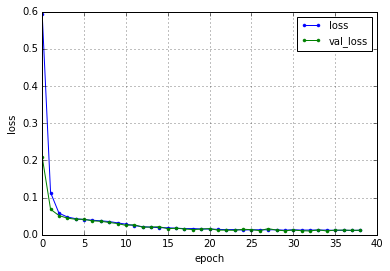

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.3840 - val_loss: 0.0738
Epoch 2/50
0s - loss: 0.0576 - val_loss: 0.0490
Epoch 3/50
0s - loss: 0.0452 - val_loss: 0.0425
Epoch 4/50
0s - loss: 0.0406 - val_loss: 0.0392
Epoch 5/50
0s - loss: 0.0363 - val_loss: 0.0332
Epoch 6/50
0s - loss: 0.0298 - val_loss: 0.0252
Epoch 7/50
0s - loss: 0.0237 - val_loss: 0.0203
Epoch 8/50
0s - loss: 0.0197 - val_loss: 0.0198
Epoch 9/50
0s - loss: 0.0174 - val_loss: 0.0153
Epoch 10/50
0s - loss: 0.0157 - val_loss: 0.0141
Epoch 11/50
0s - loss: 0.0151 - val_loss: 0.0145
Epoch 12/50
0s - loss: 0.0141 - val_loss: 0.0142
Epoch 13/50
0s - loss: 0.0144 - val_loss: 0.0157
Epoch 14/50
0s - loss: 0.0135 - val_loss: 0.0164
Epoch 15/50
0s - loss: 0.0128 - val_loss: 0.0122
Epoch 16/50
0s - loss: 0.0130 - val_loss: 0.0139
Epoch 17/50
0s - loss: 0.0122 - val_loss: 0.0105
Epoch 18/50
0s - loss: 0.0125 - val_loss: 0.0098
Epoch 19/50
0s - loss: 0.0116 - val_loss: 0.0125
Epoch 20/50
0s 

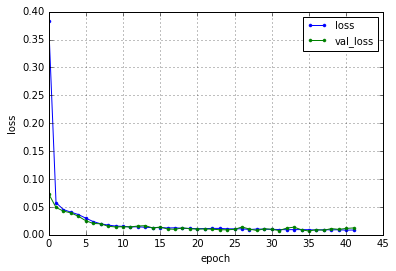

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.3626 - val_loss: 0.0770
Epoch 2/50
0s - loss: 0.0565 - val_loss: 0.0456
Epoch 3/50
0s - loss: 0.0426 - val_loss: 0.0372
Epoch 4/50
0s - loss: 0.0357 - val_loss: 0.0353
Epoch 5/50
0s - loss: 0.0284 - val_loss: 0.0252
Epoch 6/50
0s - loss: 0.0244 - val_loss: 0.0247
Epoch 7/50
0s - loss: 0.0209 - val_loss: 0.0242
Epoch 8/50
0s - loss: 0.0177 - val_loss: 0.0184
Epoch 9/50
0s - loss: 0.0159 - val_loss: 0.0209
Epoch 10/50
0s - loss: 0.0140 - val_loss: 0.0136
Epoch 11/50
0s - loss: 0.0143 - val_loss: 0.0141
Epoch 12/50
0s - loss: 0.0129 - val_loss: 0.0156
Epoch 13/50
0s - loss: 0.0127 - val_loss: 0.0107
Epoch 14/50
0s - loss: 0.0121 - val_loss: 0.0122
Epoch 15/50
0s - loss: 0.0114 - val_loss: 0.0135
Epoch 16/50
0s - loss: 0.0122 - val_loss: 0.0099
Epoch 17/50
0s - loss: 0.0114 - val_loss: 0.0112
Epoch 18/50
0s - loss: 0.0104 - val_loss: 0.0105
Epoch 19/50
0s - loss: 0.0100 - val_loss: 0.0096
Epoch 20/50
0s

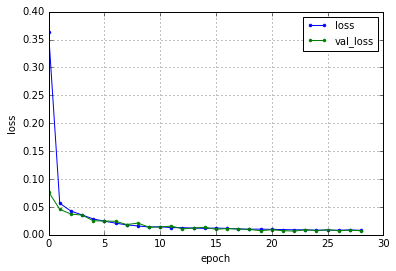

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.2601 - val_loss: 0.0537
Epoch 2/50
0s - loss: 0.0437 - val_loss: 0.0353
Epoch 3/50
0s - loss: 0.0308 - val_loss: 0.0325
Epoch 4/50
0s - loss: 0.0251 - val_loss: 0.0238
Epoch 5/50
0s - loss: 0.0206 - val_loss: 0.0161
Epoch 6/50
0s - loss: 0.0178 - val_loss: 0.0153
Epoch 7/50
0s - loss: 0.0157 - val_loss: 0.0122
Epoch 8/50
0s - loss: 0.0134 - val_loss: 0.0110
Epoch 9/50
0s - loss: 0.0122 - val_loss: 0.0144
Epoch 10/50
0s - loss: 0.0114 - val_loss: 0.0157
Epoch 11/50
0s - loss: 0.0107 - val_loss: 0.0093
Epoch 12/50
0s - loss: 0.0104 - val_loss: 0.0149
Epoch 13/50
0s - loss: 0.0101 - val_loss: 0.0111
Epoch 14/50
0s - loss: 0.0093 - val_loss: 0.0120
Epoch 15/50
0s - loss: 0.0098 - val_loss: 0.0093
Epoch 16/50
0s - loss: 0.0091 - val_loss: 0.0092
Epoch 17/50
0s - loss: 0.0088 - val_loss: 0.0136
Epoch 18/50
0s - loss: 0.0090 - val_loss: 0.0064
Epoch 19/50
0s - loss: 0.0082 - val_loss: 0.0123
Epoch 20/50
0s

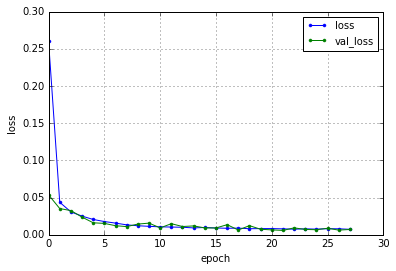

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.2117 - val_loss: 0.0467
Epoch 2/50
0s - loss: 0.0355 - val_loss: 0.0264
Epoch 3/50
0s - loss: 0.0238 - val_loss: 0.0255
Epoch 4/50
0s - loss: 0.0178 - val_loss: 0.0136
Epoch 5/50
0s - loss: 0.0146 - val_loss: 0.0128
Epoch 6/50
0s - loss: 0.0133 - val_loss: 0.0090
Epoch 7/50
0s - loss: 0.0111 - val_loss: 0.0090
Epoch 8/50
0s - loss: 0.0105 - val_loss: 0.0088
Epoch 9/50
0s - loss: 0.0101 - val_loss: 0.0112
Epoch 10/50
0s - loss: 0.0089 - val_loss: 0.0088
Epoch 11/50
0s - loss: 0.0090 - val_loss: 0.0076
Epoch 12/50
0s - loss: 0.0087 - val_loss: 0.0149
Epoch 13/50
0s - loss: 0.0081 - val_loss: 0.0089
Epoch 14/50
0s - loss: 0.0072 - val_loss: 0.0092
Epoch 15/50
0s - loss: 0.0078 - val_loss: 0.0071
Epoch 16/50
0s - loss: 0.0068 - val_loss: 0.0059
Epoch 17/50
0s - loss: 0.0073 - val_loss: 0.0044
Epoch 18/50
0s - loss: 0.0064 - val_loss: 0.0043
Epoch 19/50
0s - loss: 0.0068 - val_loss: 0.0072
Epoch 20/50
0s

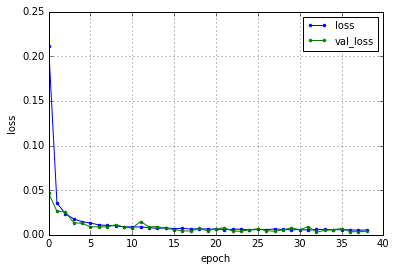

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1609 - val_loss: 0.0369
Epoch 2/50
0s - loss: 0.0248 - val_loss: 0.0153
Epoch 3/50
0s - loss: 0.0157 - val_loss: 0.0224
Epoch 4/50
0s - loss: 0.0126 - val_loss: 0.0198
Epoch 5/50
0s - loss: 0.0107 - val_loss: 0.0076
Epoch 6/50
0s - loss: 0.0089 - val_loss: 0.0066
Epoch 7/50
0s - loss: 0.0081 - val_loss: 0.0047
Epoch 8/50
0s - loss: 0.0079 - val_loss: 0.0066
Epoch 9/50
0s - loss: 0.0071 - val_loss: 0.0052
Epoch 10/50
0s - loss: 0.0067 - val_loss: 0.0075
Epoch 11/50
0s - loss: 0.0069 - val_loss: 0.0043
Epoch 12/50
0s - loss: 0.0065 - val_loss: 0.0068
Epoch 13/50
0s - loss: 0.0067 - val_loss: 0.0077
Epoch 14/50
0s - loss: 0.0063 - val_loss: 0.0067
Epoch 15/50
0s - loss: 0.0058 - val_loss: 0.0055
Epoch 16/50
0s - loss: 0.0057 - val_loss: 0.0138
Epoch 17/50
0s - loss: 0.0059 - val_loss: 0.0057


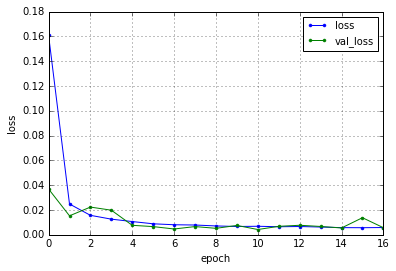

hiden node = 4
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1152 - val_loss: 0.0933
Epoch 2/50
0s - loss: 0.0850 - val_loss: 0.0786
Epoch 3/50
0s - loss: 0.0739 - val_loss: 0.0697
Epoch 4/50
0s - loss: 0.0664 - val_loss: 0.0633
Epoch 5/50
0s - loss: 0.0609 - val_loss: 0.0585
Epoch 6/50
0s - loss: 0.0566 - val_loss: 0.0548
Epoch 7/50
0s - loss: 0.0534 - val_loss: 0.0519
Epoch 8/50
0s - loss: 0.0508 - val_loss: 0.0496
Epoch 9/50
0s - loss: 0.0487 - val_loss: 0.0477
Epoch 10/50
0s - loss: 0.0469 - val_loss: 0.0460
Epoch 11/50
0s - loss: 0.0454 - val_loss: 0.0447
Epoch 12/50
0s - loss: 0.0440 - val_loss: 0.0434
Epoch 13/50
0s - loss: 0.0429 - val_loss: 0.0423
Epoch 14/50
0s - loss: 0.0418 - val_loss: 0.0413
Epoch 15/50
0s - loss: 0.0409 - val_loss: 0.0404
Epoch 16/50
0s - loss: 0.0401 - val_loss: 0.0397
Epoch 17/50
0s - loss: 0.0393 - val_loss: 0.0389
Epoch 18/50
0s - loss: 0.0386 - val_loss: 0.0383
Epoch 19/50
0s - loss: 0.0379 - val_loss: 0.0376
Epoch 20/50
0s 

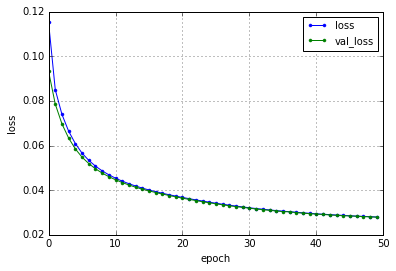

hiden node = 8
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1093 - val_loss: 0.0814
Epoch 2/50
0s - loss: 0.0718 - val_loss: 0.0641
Epoch 3/50
0s - loss: 0.0586 - val_loss: 0.0535
Epoch 4/50
0s - loss: 0.0498 - val_loss: 0.0463
Epoch 5/50
0s - loss: 0.0435 - val_loss: 0.0409
Epoch 6/50
0s - loss: 0.0389 - val_loss: 0.0368
Epoch 7/50
0s - loss: 0.0351 - val_loss: 0.0334
Epoch 8/50
0s - loss: 0.0319 - val_loss: 0.0304
Epoch 9/50
0s - loss: 0.0291 - val_loss: 0.0277
Epoch 10/50
0s - loss: 0.0266 - val_loss: 0.0253
Epoch 11/50
0s - loss: 0.0244 - val_loss: 0.0233
Epoch 12/50
0s - loss: 0.0225 - val_loss: 0.0216
Epoch 13/50
0s - loss: 0.0208 - val_loss: 0.0200
Epoch 14/50
0s - loss: 0.0193 - val_loss: 0.0186
Epoch 15/50
0s - loss: 0.0180 - val_loss: 0.0173
Epoch 16/50
0s - loss: 0.0168 - val_loss: 0.0162
Epoch 17/50
0s - loss: 0.0157 - val_loss: 0.0153
Epoch 18/50
0s - loss: 0.0148 - val_loss: 0.0143
Epoch 19/50
0s - loss: 0.0140 - val_loss: 0.0135
Epoch 20/50
0s 

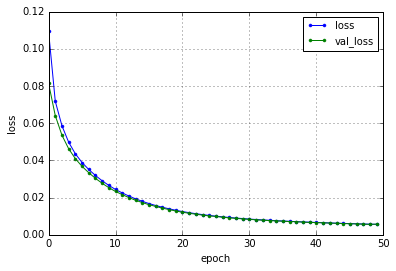

hiden node = 12
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.1037 - val_loss: 0.0751
Epoch 2/50
0s - loss: 0.0648 - val_loss: 0.0559
Epoch 3/50
0s - loss: 0.0498 - val_loss: 0.0443
Epoch 4/50
0s - loss: 0.0402 - val_loss: 0.0363
Epoch 5/50
0s - loss: 0.0332 - val_loss: 0.0302
Epoch 6/50
0s - loss: 0.0278 - val_loss: 0.0256
Epoch 7/50
0s - loss: 0.0238 - val_loss: 0.0221
Epoch 8/50
0s - loss: 0.0208 - val_loss: 0.0194
Epoch 9/50
0s - loss: 0.0184 - val_loss: 0.0174
Epoch 10/50
0s - loss: 0.0165 - val_loss: 0.0156
Epoch 11/50
0s - loss: 0.0150 - val_loss: 0.0142
Epoch 12/50
0s - loss: 0.0137 - val_loss: 0.0130
Epoch 13/50
0s - loss: 0.0126 - val_loss: 0.0121
Epoch 14/50
0s - loss: 0.0117 - val_loss: 0.0112
Epoch 15/50
0s - loss: 0.0109 - val_loss: 0.0105
Epoch 16/50
0s - loss: 0.0102 - val_loss: 0.0099
Epoch 17/50
0s - loss: 0.0096 - val_loss: 0.0093
Epoch 18/50
0s - loss: 0.0091 - val_loss: 0.0088
Epoch 19/50
0s - loss: 0.0087 - val_loss: 0.0084
Epoch 20/50
0s

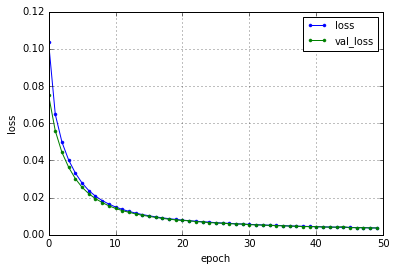

hiden node = 16
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0974 - val_loss: 0.0681
Epoch 2/50
0s - loss: 0.0568 - val_loss: 0.0474
Epoch 3/50
0s - loss: 0.0412 - val_loss: 0.0356
Epoch 4/50
0s - loss: 0.0317 - val_loss: 0.0281
Epoch 5/50
0s - loss: 0.0255 - val_loss: 0.0230
Epoch 6/50
0s - loss: 0.0211 - val_loss: 0.0193
Epoch 7/50
0s - loss: 0.0180 - val_loss: 0.0166
Epoch 8/50
0s - loss: 0.0156 - val_loss: 0.0145
Epoch 9/50
0s - loss: 0.0137 - val_loss: 0.0129
Epoch 10/50
0s - loss: 0.0123 - val_loss: 0.0116
Epoch 11/50
0s - loss: 0.0111 - val_loss: 0.0105
Epoch 12/50
0s - loss: 0.0100 - val_loss: 0.0096
Epoch 13/50
0s - loss: 0.0092 - val_loss: 0.0088
Epoch 14/50
0s - loss: 0.0085 - val_loss: 0.0082
Epoch 15/50
0s - loss: 0.0079 - val_loss: 0.0076
Epoch 16/50
0s - loss: 0.0074 - val_loss: 0.0071
Epoch 17/50
0s - loss: 0.0069 - val_loss: 0.0066
Epoch 18/50
0s - loss: 0.0065 - val_loss: 0.0062
Epoch 19/50
0s - loss: 0.0061 - val_loss: 0.0059
Epoch 20/50
0s

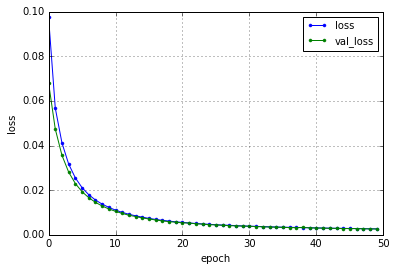

hiden node = 32
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0877 - val_loss: 0.0534
Epoch 2/50
0s - loss: 0.0402 - val_loss: 0.0303
Epoch 3/50
0s - loss: 0.0250 - val_loss: 0.0204
Epoch 4/50
0s - loss: 0.0175 - val_loss: 0.0149
Epoch 5/50
0s - loss: 0.0133 - val_loss: 0.0117
Epoch 6/50
0s - loss: 0.0107 - val_loss: 0.0096
Epoch 7/50
0s - loss: 0.0089 - val_loss: 0.0082
Epoch 8/50
0s - loss: 0.0077 - val_loss: 0.0072
Epoch 9/50
0s - loss: 0.0068 - val_loss: 0.0064
Epoch 10/50
0s - loss: 0.0061 - val_loss: 0.0058
Epoch 11/50
0s - loss: 0.0056 - val_loss: 0.0059
Epoch 12/50
0s - loss: 0.0051 - val_loss: 0.0048
Epoch 13/50
0s - loss: 0.0047 - val_loss: 0.0045
Epoch 14/50
0s - loss: 0.0044 - val_loss: 0.0042
Epoch 15/50
0s - loss: 0.0041 - val_loss: 0.0043
Epoch 16/50
0s - loss: 0.0038 - val_loss: 0.0037
Epoch 17/50
0s - loss: 0.0036 - val_loss: 0.0035
Epoch 18/50
0s - loss: 0.0035 - val_loss: 0.0033
Epoch 19/50
0s - loss: 0.0033 - val_loss: 0.0033
Epoch 20/50
0s

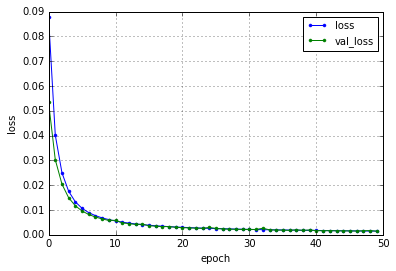

hiden node = 64
Train on 7957 samples, validate on 7957 samples
Epoch 1/50
0s - loss: 0.0722 - val_loss: 0.0337
Epoch 2/50
0s - loss: 0.0234 - val_loss: 0.0164
Epoch 3/50
0s - loss: 0.0131 - val_loss: 0.0104
Epoch 4/50
0s - loss: 0.0089 - val_loss: 0.0077
Epoch 5/50
0s - loss: 0.0069 - val_loss: 0.0062
Epoch 6/50
0s - loss: 0.0056 - val_loss: 0.0053
Epoch 7/50
0s - loss: 0.0048 - val_loss: 0.0044
Epoch 8/50
0s - loss: 0.0042 - val_loss: 0.0039
Epoch 9/50
0s - loss: 0.0037 - val_loss: 0.0035
Epoch 10/50
0s - loss: 0.0034 - val_loss: 0.0035
Epoch 11/50
0s - loss: 0.0031 - val_loss: 0.0030
Epoch 12/50
0s - loss: 0.0029 - val_loss: 0.0029
Epoch 13/50
0s - loss: 0.0027 - val_loss: 0.0025
Epoch 14/50
0s - loss: 0.0025 - val_loss: 0.0024
Epoch 15/50
0s - loss: 0.0023 - val_loss: 0.0022
Epoch 16/50
0s - loss: 0.0022 - val_loss: 0.0021
Epoch 17/50
0s - loss: 0.0021 - val_loss: 0.0020
Epoch 18/50
0s - loss: 0.0020 - val_loss: 0.0019
Epoch 19/50
0s - loss: 0.0019 - val_loss: 0.0018
Epoch 20/50
0s

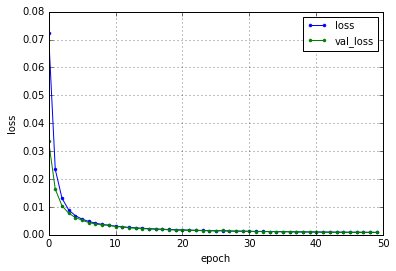

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =3977
SourceData's aborting data = 22
window shape is (3977, 256, 3)
(3977, 256, 3)
hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0446 - val_loss: 0.0427
Epoch 2/50
0s - loss: 0.0412 - val_loss: 0.0395
Epoch 3/50
0s - loss: 0.0380 - val_loss: 0.0363
Epoch 4/50
0s - loss: 0.0349 - val_loss: 0.0335
Epoch 5/50
0s - loss: 0.0324 - val_loss: 0.0314
Epoch 6/50
0s - loss: 0.0306 - val_loss: 0.0298
Epoch 7/50
0s - loss: 0.0292 - val_loss: 0.0286
Epoch 8/50
0s - loss: 0.0281 - val_loss: 0.0276
Epoch 9/50
0s - loss: 0.0272 - val_loss: 0.0268
Epoch 10/50
0s - loss: 0.0265 - val_loss: 0.0261
Epoch 11/50
0s - loss: 0.0258 - val_loss: 0.0255
Epoch 12/50
0s - loss: 0.0252 - val_loss: 0.0249
Epoch 13/50
0s - loss: 0.0246 - val_loss: 0.0244
Epoch 14/50
0s - loss: 0.0241 - val_loss: 0.0239
Epoch 15/50
0s - loss: 0.0237 - val_loss: 0.0234
Epoch 16/50
0s - los

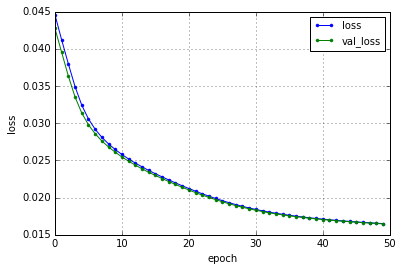

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0450 - val_loss: 0.0415
Epoch 2/50
0s - loss: 0.0387 - val_loss: 0.0358
Epoch 3/50
0s - loss: 0.0335 - val_loss: 0.0314
Epoch 4/50
0s - loss: 0.0300 - val_loss: 0.0289
Epoch 5/50
0s - loss: 0.0281 - val_loss: 0.0273
Epoch 6/50
0s - loss: 0.0267 - val_loss: 0.0261
Epoch 7/50
0s - loss: 0.0256 - val_loss: 0.0250
Epoch 8/50
0s - loss: 0.0245 - val_loss: 0.0240
Epoch 9/50
0s - loss: 0.0235 - val_loss: 0.0230
Epoch 10/50
0s - loss: 0.0225 - val_loss: 0.0220
Epoch 11/50
0s - loss: 0.0216 - val_loss: 0.0212
Epoch 12/50
0s - loss: 0.0208 - val_loss: 0.0204
Epoch 13/50
0s - loss: 0.0201 - val_loss: 0.0197
Epoch 14/50
0s - loss: 0.0194 - val_loss: 0.0191
Epoch 15/50
0s - loss: 0.0188 - val_loss: 0.0185
Epoch 16/50
0s - loss: 0.0183 - val_loss: 0.0180
Epoch 17/50
0s - loss: 0.0177 - val_loss: 0.0175
Epoch 18/50
0s - loss: 0.0172 - val_loss: 0.0170
Epoch 19/50
0s - loss: 0.0167 - val_loss: 0.0165
Epoch 20/50
0s 

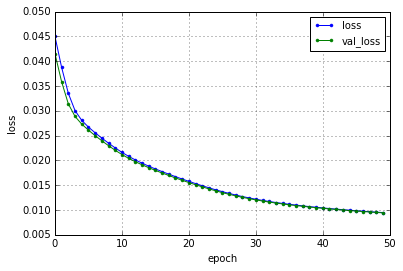

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0469 - val_loss: 0.0425
Epoch 2/50
0s - loss: 0.0393 - val_loss: 0.0359
Epoch 3/50
0s - loss: 0.0330 - val_loss: 0.0304
Epoch 4/50
0s - loss: 0.0286 - val_loss: 0.0270
Epoch 5/50
0s - loss: 0.0260 - val_loss: 0.0250
Epoch 6/50
0s - loss: 0.0242 - val_loss: 0.0235
Epoch 7/50
0s - loss: 0.0228 - val_loss: 0.0221
Epoch 8/50
0s - loss: 0.0215 - val_loss: 0.0209
Epoch 9/50
0s - loss: 0.0203 - val_loss: 0.0197
Epoch 10/50
0s - loss: 0.0192 - val_loss: 0.0187
Epoch 11/50
0s - loss: 0.0183 - val_loss: 0.0178
Epoch 12/50
0s - loss: 0.0174 - val_loss: 0.0170
Epoch 13/50
0s - loss: 0.0166 - val_loss: 0.0162
Epoch 14/50
0s - loss: 0.0159 - val_loss: 0.0155
Epoch 15/50
0s - loss: 0.0152 - val_loss: 0.0149
Epoch 16/50
0s - loss: 0.0146 - val_loss: 0.0143
Epoch 17/50
0s - loss: 0.0141 - val_loss: 0.0138
Epoch 18/50
0s - loss: 0.0136 - val_loss: 0.0133
Epoch 19/50
0s - loss: 0.0131 - val_loss: 0.0129
Epoch 20/50
0s

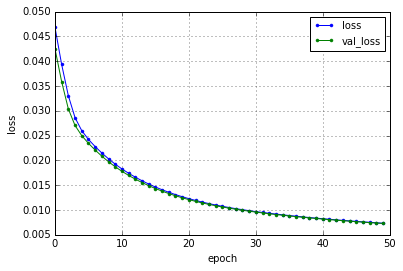

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0459 - val_loss: 0.0410
Epoch 2/50
0s - loss: 0.0373 - val_loss: 0.0335
Epoch 3/50
0s - loss: 0.0309 - val_loss: 0.0286
Epoch 4/50
0s - loss: 0.0272 - val_loss: 0.0259
Epoch 5/50
0s - loss: 0.0251 - val_loss: 0.0241
Epoch 6/50
0s - loss: 0.0234 - val_loss: 0.0225
Epoch 7/50
0s - loss: 0.0218 - val_loss: 0.0209
Epoch 8/50
0s - loss: 0.0202 - val_loss: 0.0194
Epoch 9/50
0s - loss: 0.0187 - val_loss: 0.0180
Epoch 10/50
0s - loss: 0.0174 - val_loss: 0.0167
Epoch 11/50
0s - loss: 0.0162 - val_loss: 0.0156
Epoch 12/50
0s - loss: 0.0151 - val_loss: 0.0147
Epoch 13/50
0s - loss: 0.0143 - val_loss: 0.0138
Epoch 14/50
0s - loss: 0.0135 - val_loss: 0.0131
Epoch 15/50
0s - loss: 0.0129 - val_loss: 0.0125
Epoch 16/50
0s - loss: 0.0123 - val_loss: 0.0120
Epoch 17/50
0s - loss: 0.0118 - val_loss: 0.0115
Epoch 18/50
0s - loss: 0.0113 - val_loss: 0.0111
Epoch 19/50
0s - loss: 0.0109 - val_loss: 0.0107
Epoch 20/50
0s

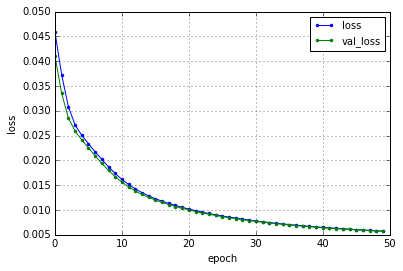

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0456 - val_loss: 0.0373
Epoch 2/50
0s - loss: 0.0322 - val_loss: 0.0279
Epoch 3/50
0s - loss: 0.0255 - val_loss: 0.0234
Epoch 4/50
0s - loss: 0.0220 - val_loss: 0.0206
Epoch 5/50
0s - loss: 0.0195 - val_loss: 0.0184
Epoch 6/50
0s - loss: 0.0175 - val_loss: 0.0166
Epoch 7/50
0s - loss: 0.0158 - val_loss: 0.0150
Epoch 8/50
0s - loss: 0.0144 - val_loss: 0.0137
Epoch 9/50
0s - loss: 0.0132 - val_loss: 0.0126
Epoch 10/50
0s - loss: 0.0121 - val_loss: 0.0116
Epoch 11/50
0s - loss: 0.0112 - val_loss: 0.0108
Epoch 12/50
0s - loss: 0.0104 - val_loss: 0.0101
Epoch 13/50
0s - loss: 0.0098 - val_loss: 0.0094
Epoch 14/50
0s - loss: 0.0092 - val_loss: 0.0089
Epoch 15/50
0s - loss: 0.0087 - val_loss: 0.0085
Epoch 16/50
0s - loss: 0.0083 - val_loss: 0.0081
Epoch 17/50
0s - loss: 0.0079 - val_loss: 0.0077
Epoch 18/50
0s - loss: 0.0076 - val_loss: 0.0074
Epoch 19/50
0s - loss: 0.0073 - val_loss: 0.0071
Epoch 20/50
0s

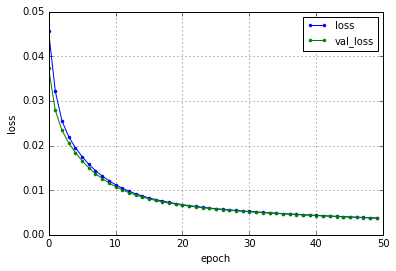

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.0467 - val_loss: 0.0335
Epoch 2/50
0s - loss: 0.0276 - val_loss: 0.0232
Epoch 3/50
0s - loss: 0.0209 - val_loss: 0.0188
Epoch 4/50
0s - loss: 0.0172 - val_loss: 0.0156
Epoch 5/50
0s - loss: 0.0144 - val_loss: 0.0131
Epoch 6/50
0s - loss: 0.0122 - val_loss: 0.0112
Epoch 7/50
0s - loss: 0.0105 - val_loss: 0.0098
Epoch 8/50
0s - loss: 0.0093 - val_loss: 0.0087
Epoch 9/50
0s - loss: 0.0083 - val_loss: 0.0079
Epoch 10/50
0s - loss: 0.0076 - val_loss: 0.0073
Epoch 11/50
0s - loss: 0.0070 - val_loss: 0.0068
Epoch 12/50
0s - loss: 0.0066 - val_loss: 0.0063
Epoch 13/50
0s - loss: 0.0062 - val_loss: 0.0060
Epoch 14/50
0s - loss: 0.0059 - val_loss: 0.0057
Epoch 15/50
0s - loss: 0.0056 - val_loss: 0.0054
Epoch 16/50
0s - loss: 0.0053 - val_loss: 0.0052
Epoch 17/50
0s - loss: 0.0051 - val_loss: 0.0050
Epoch 18/50
0s - loss: 0.0049 - val_loss: 0.0048
Epoch 19/50
0s - loss: 0.0047 - val_loss: 0.0046
Epoch 20/50
0s

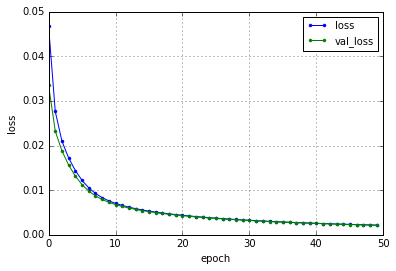

hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.9853 - val_loss: 0.7705
Epoch 2/50
0s - loss: 0.6128 - val_loss: 0.4717
Epoch 3/50
0s - loss: 0.3770 - val_loss: 0.2925
Epoch 4/50
0s - loss: 0.2366 - val_loss: 0.1871
Epoch 5/50
0s - loss: 0.1550 - val_loss: 0.1269
Epoch 6/50
0s - loss: 0.1092 - val_loss: 0.0939
Epoch 7/50
0s - loss: 0.0848 - val_loss: 0.0773
Epoch 8/50
0s - loss: 0.0731 - val_loss: 0.0699
Epoch 9/50
0s - loss: 0.0681 - val_loss: 0.0663
Epoch 10/50
0s - loss: 0.0652 - val_loss: 0.0642
Epoch 11/50
0s - loss: 0.0632 - val_loss: 0.0623
Epoch 12/50
0s - loss: 0.0619 - val_loss: 0.0615
Epoch 13/50
0s - loss: 0.0611 - val_loss: 0.0605
Epoch 14/50
0s - loss: 0.0603 - val_loss: 0.0602
Epoch 15/50
0s - loss: 0.0596 - val_loss: 0.0592
Epoch 16/50
0s - loss: 0.0594 - val_loss: 0.0589
Epoch 17/50
0s - loss: 0.0592 - val_loss: 0.0609
Epoch 18/50
0s - loss: 0.0587 - val_loss: 0.0579
Epoch 19/50
0s - loss: 0.0588 - val_loss: 0.0648
Epoch 20/50
0s 

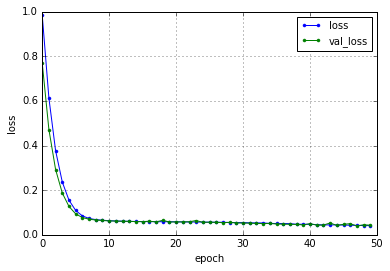

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.9590 - val_loss: 0.7178
Epoch 2/50
0s - loss: 0.5497 - val_loss: 0.4032
Epoch 3/50
0s - loss: 0.3108 - val_loss: 0.2311
Epoch 4/50
0s - loss: 0.1817 - val_loss: 0.1397
Epoch 5/50
0s - loss: 0.1149 - val_loss: 0.0945
Epoch 6/50
0s - loss: 0.0837 - val_loss: 0.0752
Epoch 7/50
0s - loss: 0.0713 - val_loss: 0.0685
Epoch 8/50
0s - loss: 0.0671 - val_loss: 0.0660
Epoch 9/50
0s - loss: 0.0647 - val_loss: 0.0639
Epoch 10/50
0s - loss: 0.0632 - val_loss: 0.0633
Epoch 11/50
0s - loss: 0.0624 - val_loss: 0.0618
Epoch 12/50
0s - loss: 0.0617 - val_loss: 0.0622
Epoch 13/50
0s - loss: 0.0610 - val_loss: 0.0641
Epoch 14/50
0s - loss: 0.0603 - val_loss: 0.0607
Epoch 15/50
0s - loss: 0.0594 - val_loss: 0.0596
Epoch 16/50
0s - loss: 0.0586 - val_loss: 0.0577
Epoch 17/50
0s - loss: 0.0575 - val_loss: 0.0579
Epoch 18/50
0s - loss: 0.0567 - val_loss: 0.0590
Epoch 19/50
0s - loss: 0.0563 - val_loss: 0.0566
Epoch 20/50
0s 

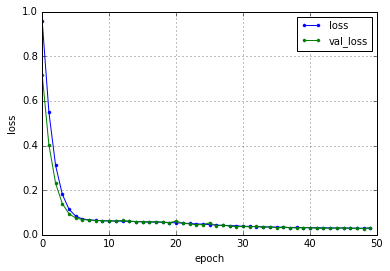

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.8082 - val_loss: 0.4710
Epoch 2/50
0s - loss: 0.3053 - val_loss: 0.1857
Epoch 3/50
0s - loss: 0.1341 - val_loss: 0.0974
Epoch 4/50
0s - loss: 0.0826 - val_loss: 0.0726
Epoch 5/50
0s - loss: 0.0691 - val_loss: 0.0666
Epoch 6/50
0s - loss: 0.0649 - val_loss: 0.0634
Epoch 7/50
0s - loss: 0.0623 - val_loss: 0.0617
Epoch 8/50
0s - loss: 0.0608 - val_loss: 0.0614
Epoch 9/50
0s - loss: 0.0597 - val_loss: 0.0598
Epoch 10/50
0s - loss: 0.0588 - val_loss: 0.0577
Epoch 11/50
0s - loss: 0.0582 - val_loss: 0.0575
Epoch 12/50
0s - loss: 0.0572 - val_loss: 0.0567
Epoch 13/50
0s - loss: 0.0563 - val_loss: 0.0573
Epoch 14/50
0s - loss: 0.0549 - val_loss: 0.0664
Epoch 15/50
0s - loss: 0.0529 - val_loss: 0.0494
Epoch 16/50
0s - loss: 0.0508 - val_loss: 0.0551
Epoch 17/50
0s - loss: 0.0489 - val_loss: 0.0459
Epoch 18/50
0s - loss: 0.0469 - val_loss: 0.0491
Epoch 19/50
0s - loss: 0.0442 - val_loss: 0.0452
Epoch 20/50
0s

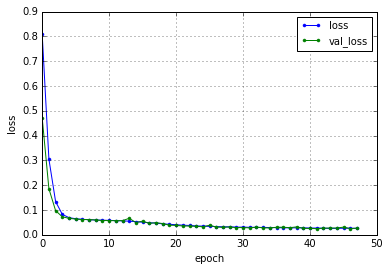

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.7181 - val_loss: 0.3528
Epoch 2/50
0s - loss: 0.2147 - val_loss: 0.1258
Epoch 3/50
0s - loss: 0.0954 - val_loss: 0.0764
Epoch 4/50
0s - loss: 0.0705 - val_loss: 0.0670
Epoch 5/50
0s - loss: 0.0654 - val_loss: 0.0636
Epoch 6/50
0s - loss: 0.0625 - val_loss: 0.0620
Epoch 7/50
0s - loss: 0.0607 - val_loss: 0.0596
Epoch 8/50
0s - loss: 0.0591 - val_loss: 0.0596
Epoch 9/50
0s - loss: 0.0579 - val_loss: 0.0572
Epoch 10/50
0s - loss: 0.0565 - val_loss: 0.0579
Epoch 11/50
0s - loss: 0.0550 - val_loss: 0.0530
Epoch 12/50
0s - loss: 0.0524 - val_loss: 0.0488
Epoch 13/50
0s - loss: 0.0498 - val_loss: 0.0479
Epoch 14/50
0s - loss: 0.0467 - val_loss: 0.0420
Epoch 15/50
0s - loss: 0.0427 - val_loss: 0.0387
Epoch 16/50
0s - loss: 0.0404 - val_loss: 0.0371
Epoch 17/50
0s - loss: 0.0376 - val_loss: 0.0354
Epoch 18/50
0s - loss: 0.0371 - val_loss: 0.0329
Epoch 19/50
0s - loss: 0.0350 - val_loss: 0.0327
Epoch 20/50
0s

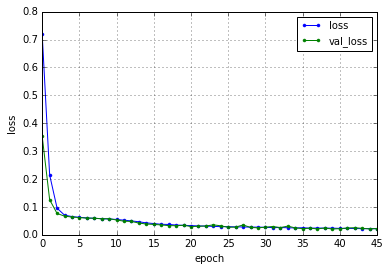

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.5560 - val_loss: 0.1640
Epoch 2/50
0s - loss: 0.0979 - val_loss: 0.0697
Epoch 3/50
0s - loss: 0.0656 - val_loss: 0.0630
Epoch 4/50
0s - loss: 0.0613 - val_loss: 0.0597
Epoch 5/50
0s - loss: 0.0579 - val_loss: 0.0558
Epoch 6/50
0s - loss: 0.0549 - val_loss: 0.0550
Epoch 7/50
0s - loss: 0.0508 - val_loss: 0.0546
Epoch 8/50
0s - loss: 0.0469 - val_loss: 0.0447
Epoch 9/50
0s - loss: 0.0424 - val_loss: 0.0390
Epoch 10/50
0s - loss: 0.0395 - val_loss: 0.0365
Epoch 11/50
0s - loss: 0.0364 - val_loss: 0.0369
Epoch 12/50
0s - loss: 0.0344 - val_loss: 0.0354
Epoch 13/50
0s - loss: 0.0317 - val_loss: 0.0360
Epoch 14/50
0s - loss: 0.0299 - val_loss: 0.0287
Epoch 15/50
0s - loss: 0.0285 - val_loss: 0.0318
Epoch 16/50
0s - loss: 0.0276 - val_loss: 0.0259
Epoch 17/50
0s - loss: 0.0261 - val_loss: 0.0247
Epoch 18/50
0s - loss: 0.0251 - val_loss: 0.0233
Epoch 19/50
0s - loss: 0.0251 - val_loss: 0.0271
Epoch 20/50
0s

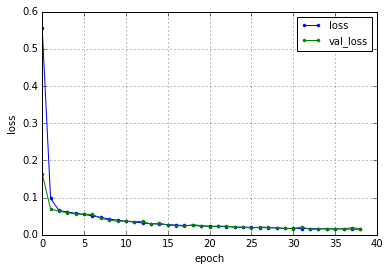

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.3868 - val_loss: 0.0722
Epoch 2/50
0s - loss: 0.0643 - val_loss: 0.0616
Epoch 3/50
0s - loss: 0.0593 - val_loss: 0.0573
Epoch 4/50
0s - loss: 0.0533 - val_loss: 0.0494
Epoch 5/50
0s - loss: 0.0457 - val_loss: 0.0463
Epoch 6/50
0s - loss: 0.0401 - val_loss: 0.0383
Epoch 7/50
0s - loss: 0.0354 - val_loss: 0.0357
Epoch 8/50
0s - loss: 0.0319 - val_loss: 0.0286
Epoch 9/50
0s - loss: 0.0298 - val_loss: 0.0305
Epoch 10/50
0s - loss: 0.0270 - val_loss: 0.0358
Epoch 11/50
0s - loss: 0.0250 - val_loss: 0.0287
Epoch 12/50
0s - loss: 0.0237 - val_loss: 0.0232
Epoch 13/50
0s - loss: 0.0222 - val_loss: 0.0249
Epoch 14/50
0s - loss: 0.0206 - val_loss: 0.0300
Epoch 15/50
0s - loss: 0.0197 - val_loss: 0.0172
Epoch 16/50
0s - loss: 0.0192 - val_loss: 0.0172
Epoch 17/50
0s - loss: 0.0175 - val_loss: 0.0151
Epoch 18/50
0s - loss: 0.0171 - val_loss: 0.0210
Epoch 19/50
0s - loss: 0.0167 - val_loss: 0.0189
Epoch 20/50
0s

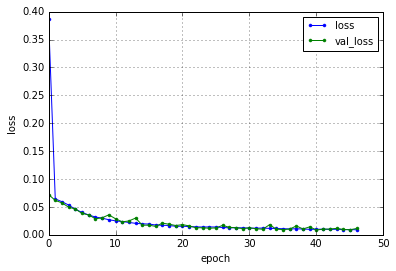

hiden node = 4
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1388 - val_loss: 0.1308
Epoch 2/50
0s - loss: 0.1232 - val_loss: 0.1157
Epoch 3/50
0s - loss: 0.1102 - val_loss: 0.1054
Epoch 4/50
0s - loss: 0.1023 - val_loss: 0.0995
Epoch 5/50
0s - loss: 0.0975 - val_loss: 0.0955
Epoch 6/50
0s - loss: 0.0940 - val_loss: 0.0924
Epoch 7/50
0s - loss: 0.0911 - val_loss: 0.0897
Epoch 8/50
0s - loss: 0.0887 - val_loss: 0.0875
Epoch 9/50
0s - loss: 0.0865 - val_loss: 0.0854
Epoch 10/50
0s - loss: 0.0845 - val_loss: 0.0835
Epoch 11/50
0s - loss: 0.0826 - val_loss: 0.0817
Epoch 12/50
0s - loss: 0.0809 - val_loss: 0.0801
Epoch 13/50
0s - loss: 0.0793 - val_loss: 0.0785
Epoch 14/50
0s - loss: 0.0779 - val_loss: 0.0772
Epoch 15/50
0s - loss: 0.0765 - val_loss: 0.0758
Epoch 16/50
0s - loss: 0.0752 - val_loss: 0.0746
Epoch 17/50
0s - loss: 0.0741 - val_loss: 0.0735
Epoch 18/50
0s - loss: 0.0730 - val_loss: 0.0724
Epoch 19/50
0s - loss: 0.0719 - val_loss: 0.0714
Epoch 20/50
0s 

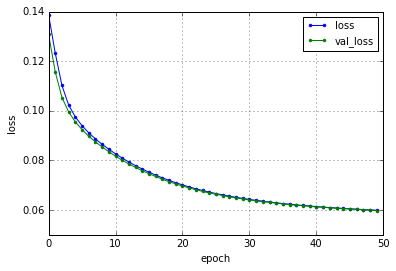

hiden node = 8
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1393 - val_loss: 0.1275
Epoch 2/50
0s - loss: 0.1169 - val_loss: 0.1071
Epoch 3/50
0s - loss: 0.1018 - val_loss: 0.0976
Epoch 4/50
0s - loss: 0.0954 - val_loss: 0.0932
Epoch 5/50
0s - loss: 0.0916 - val_loss: 0.0898
Epoch 6/50
0s - loss: 0.0883 - val_loss: 0.0867
Epoch 7/50
0s - loss: 0.0852 - val_loss: 0.0836
Epoch 8/50
0s - loss: 0.0822 - val_loss: 0.0806
Epoch 9/50
0s - loss: 0.0792 - val_loss: 0.0777
Epoch 10/50
0s - loss: 0.0765 - val_loss: 0.0751
Epoch 11/50
0s - loss: 0.0738 - val_loss: 0.0725
Epoch 12/50
0s - loss: 0.0714 - val_loss: 0.0702
Epoch 13/50
0s - loss: 0.0692 - val_loss: 0.0681
Epoch 14/50
0s - loss: 0.0671 - val_loss: 0.0660
Epoch 15/50
0s - loss: 0.0652 - val_loss: 0.0642
Epoch 16/50
0s - loss: 0.0634 - val_loss: 0.0625
Epoch 17/50
0s - loss: 0.0617 - val_loss: 0.0608
Epoch 18/50
0s - loss: 0.0601 - val_loss: 0.0593
Epoch 19/50
0s - loss: 0.0587 - val_loss: 0.0579
Epoch 20/50
0s 

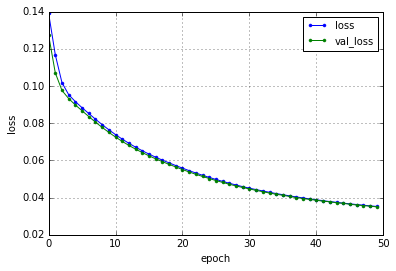

hiden node = 12
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1400 - val_loss: 0.1258
Epoch 2/50
0s - loss: 0.1135 - val_loss: 0.1023
Epoch 3/50
0s - loss: 0.0965 - val_loss: 0.0918
Epoch 4/50
0s - loss: 0.0890 - val_loss: 0.0863
Epoch 5/50
0s - loss: 0.0839 - val_loss: 0.0813
Epoch 6/50
0s - loss: 0.0790 - val_loss: 0.0765
Epoch 7/50
0s - loss: 0.0743 - val_loss: 0.0719
Epoch 8/50
0s - loss: 0.0699 - val_loss: 0.0678
Epoch 9/50
0s - loss: 0.0660 - val_loss: 0.0640
Epoch 10/50
0s - loss: 0.0623 - val_loss: 0.0606
Epoch 11/50
0s - loss: 0.0591 - val_loss: 0.0575
Epoch 12/50
0s - loss: 0.0562 - val_loss: 0.0547
Epoch 13/50
0s - loss: 0.0535 - val_loss: 0.0522
Epoch 14/50
0s - loss: 0.0511 - val_loss: 0.0499
Epoch 15/50
0s - loss: 0.0490 - val_loss: 0.0479
Epoch 16/50
0s - loss: 0.0470 - val_loss: 0.0460
Epoch 17/50
0s - loss: 0.0453 - val_loss: 0.0443
Epoch 18/50
0s - loss: 0.0436 - val_loss: 0.0428
Epoch 19/50
0s - loss: 0.0421 - val_loss: 0.0413
Epoch 20/50
0s

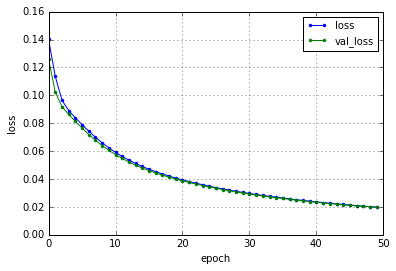

hiden node = 16
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1318 - val_loss: 0.1157
Epoch 2/50
0s - loss: 0.1039 - val_loss: 0.0942
Epoch 3/50
0s - loss: 0.0890 - val_loss: 0.0843
Epoch 4/50
0s - loss: 0.0810 - val_loss: 0.0775
Epoch 5/50
0s - loss: 0.0745 - val_loss: 0.0713
Epoch 6/50
0s - loss: 0.0687 - val_loss: 0.0659
Epoch 7/50
0s - loss: 0.0635 - val_loss: 0.0610
Epoch 8/50
0s - loss: 0.0590 - val_loss: 0.0569
Epoch 9/50
0s - loss: 0.0551 - val_loss: 0.0532
Epoch 10/50
0s - loss: 0.0517 - val_loss: 0.0501
Epoch 11/50
0s - loss: 0.0487 - val_loss: 0.0473
Epoch 12/50
0s - loss: 0.0461 - val_loss: 0.0447
Epoch 13/50
0s - loss: 0.0437 - val_loss: 0.0425
Epoch 14/50
0s - loss: 0.0415 - val_loss: 0.0405
Epoch 15/50
0s - loss: 0.0397 - val_loss: 0.0387
Epoch 16/50
0s - loss: 0.0379 - val_loss: 0.0370
Epoch 17/50
0s - loss: 0.0364 - val_loss: 0.0356
Epoch 18/50
0s - loss: 0.0349 - val_loss: 0.0342
Epoch 19/50
0s - loss: 0.0336 - val_loss: 0.0329
Epoch 20/50
0s

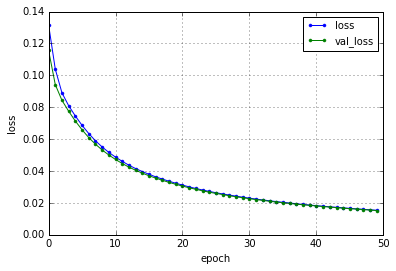

hiden node = 32
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1335 - val_loss: 0.1087
Epoch 2/50
0s - loss: 0.0937 - val_loss: 0.0824
Epoch 3/50
0s - loss: 0.0768 - val_loss: 0.0715
Epoch 4/50
0s - loss: 0.0673 - val_loss: 0.0628
Epoch 5/50
0s - loss: 0.0593 - val_loss: 0.0554
Epoch 6/50
0s - loss: 0.0524 - val_loss: 0.0491
Epoch 7/50
0s - loss: 0.0465 - val_loss: 0.0437
Epoch 8/50
0s - loss: 0.0417 - val_loss: 0.0395
Epoch 9/50
0s - loss: 0.0377 - val_loss: 0.0358
Epoch 10/50
0s - loss: 0.0344 - val_loss: 0.0329
Epoch 11/50
0s - loss: 0.0317 - val_loss: 0.0303
Epoch 12/50
0s - loss: 0.0293 - val_loss: 0.0281
Epoch 13/50
0s - loss: 0.0272 - val_loss: 0.0262
Epoch 14/50
0s - loss: 0.0254 - val_loss: 0.0245
Epoch 15/50
0s - loss: 0.0238 - val_loss: 0.0230
Epoch 16/50
0s - loss: 0.0224 - val_loss: 0.0217
Epoch 17/50
0s - loss: 0.0211 - val_loss: 0.0204
Epoch 18/50
0s - loss: 0.0199 - val_loss: 0.0193
Epoch 19/50
0s - loss: 0.0189 - val_loss: 0.0183
Epoch 20/50
0s

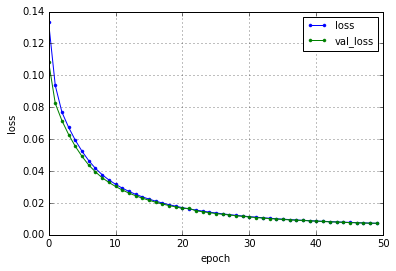

hiden node = 64
Train on 3977 samples, validate on 3977 samples
Epoch 1/50
0s - loss: 0.1216 - val_loss: 0.0872
Epoch 2/50
0s - loss: 0.0752 - val_loss: 0.0651
Epoch 3/50
0s - loss: 0.0582 - val_loss: 0.0513
Epoch 4/50
0s - loss: 0.0464 - val_loss: 0.0415
Epoch 5/50
0s - loss: 0.0379 - val_loss: 0.0341
Epoch 6/50
0s - loss: 0.0317 - val_loss: 0.0290
Epoch 7/50
0s - loss: 0.0271 - val_loss: 0.0250
Epoch 8/50
0s - loss: 0.0236 - val_loss: 0.0219
Epoch 9/50
0s - loss: 0.0208 - val_loss: 0.0196
Epoch 10/50
0s - loss: 0.0187 - val_loss: 0.0176
Epoch 11/50
0s - loss: 0.0169 - val_loss: 0.0160
Epoch 12/50
0s - loss: 0.0154 - val_loss: 0.0147
Epoch 13/50
0s - loss: 0.0142 - val_loss: 0.0136
Epoch 14/50
0s - loss: 0.0132 - val_loss: 0.0126
Epoch 15/50
0s - loss: 0.0123 - val_loss: 0.0118
Epoch 16/50
0s - loss: 0.0115 - val_loss: 0.0111
Epoch 17/50
0s - loss: 0.0108 - val_loss: 0.0105
Epoch 18/50
0s - loss: 0.0102 - val_loss: 0.0100
Epoch 19/50
0s - loss: 0.0097 - val_loss: 0.0094
Epoch 20/50
0s

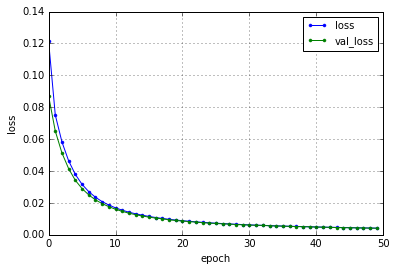

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =1987
SourceData's aborting data = 22
window shape is (1987, 512, 3)
(1987, 512, 3)
hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0468 - val_loss: 0.0462
Epoch 2/50
0s - loss: 0.0458 - val_loss: 0.0454
Epoch 3/50
0s - loss: 0.0451 - val_loss: 0.0448
Epoch 4/50
0s - loss: 0.0445 - val_loss: 0.0442
Epoch 5/50
0s - loss: 0.0440 - val_loss: 0.0437
Epoch 6/50
0s - loss: 0.0435 - val_loss: 0.0432
Epoch 7/50
0s - loss: 0.0430 - val_loss: 0.0427
Epoch 8/50
0s - loss: 0.0425 - val_loss: 0.0422
Epoch 9/50
0s - loss: 0.0420 - val_loss: 0.0418
Epoch 10/50
0s - loss: 0.0416 - val_loss: 0.0413
Epoch 11/50
0s - loss: 0.0411 - val_loss: 0.0409
Epoch 12/50
0s - loss: 0.0407 - val_loss: 0.0404
Epoch 13/50
0s - loss: 0.0402 - val_loss: 0.0400
Epoch 14/50
0s - loss: 0.0398 - val_loss: 0.0395
Epoch 15/50
0s - loss: 0.0393 - val_loss: 0.0391
Epoch 16/50
0s - los

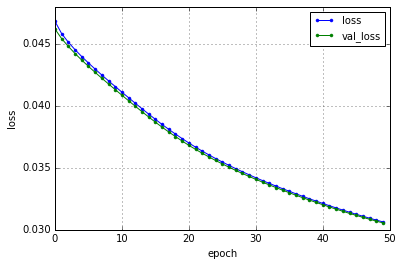

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0471 - val_loss: 0.0463
Epoch 2/50
0s - loss: 0.0459 - val_loss: 0.0454
Epoch 3/50
0s - loss: 0.0450 - val_loss: 0.0446
Epoch 4/50
0s - loss: 0.0443 - val_loss: 0.0439
Epoch 5/50
0s - loss: 0.0436 - val_loss: 0.0432
Epoch 6/50
0s - loss: 0.0429 - val_loss: 0.0426
Epoch 7/50
0s - loss: 0.0423 - val_loss: 0.0420
Epoch 8/50
0s - loss: 0.0417 - val_loss: 0.0414
Epoch 9/50
0s - loss: 0.0411 - val_loss: 0.0408
Epoch 10/50
0s - loss: 0.0405 - val_loss: 0.0402
Epoch 11/50
0s - loss: 0.0399 - val_loss: 0.0396
Epoch 12/50
0s - loss: 0.0393 - val_loss: 0.0390
Epoch 13/50
0s - loss: 0.0388 - val_loss: 0.0384
Epoch 14/50
0s - loss: 0.0382 - val_loss: 0.0379
Epoch 15/50
0s - loss: 0.0376 - val_loss: 0.0373
Epoch 16/50
0s - loss: 0.0371 - val_loss: 0.0368
Epoch 17/50
0s - loss: 0.0366 - val_loss: 0.0363
Epoch 18/50
0s - loss: 0.0361 - val_loss: 0.0358
Epoch 19/50
0s - loss: 0.0356 - val_loss: 0.0354
Epoch 20/50
0s 

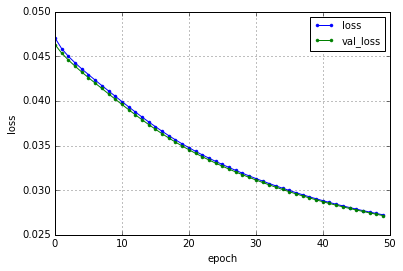

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0479 - val_loss: 0.0470
Epoch 2/50
0s - loss: 0.0465 - val_loss: 0.0459
Epoch 3/50
0s - loss: 0.0455 - val_loss: 0.0451
Epoch 4/50
0s - loss: 0.0447 - val_loss: 0.0443
Epoch 5/50
0s - loss: 0.0440 - val_loss: 0.0436
Epoch 6/50
0s - loss: 0.0433 - val_loss: 0.0430
Epoch 7/50
0s - loss: 0.0427 - val_loss: 0.0423
Epoch 8/50
0s - loss: 0.0420 - val_loss: 0.0417
Epoch 9/50
0s - loss: 0.0414 - val_loss: 0.0411
Epoch 10/50
0s - loss: 0.0408 - val_loss: 0.0404
Epoch 11/50
0s - loss: 0.0401 - val_loss: 0.0398
Epoch 12/50
0s - loss: 0.0395 - val_loss: 0.0391
Epoch 13/50
0s - loss: 0.0388 - val_loss: 0.0384
Epoch 14/50
0s - loss: 0.0382 - val_loss: 0.0378
Epoch 15/50
0s - loss: 0.0375 - val_loss: 0.0371
Epoch 16/50
0s - loss: 0.0369 - val_loss: 0.0365
Epoch 17/50
0s - loss: 0.0362 - val_loss: 0.0359
Epoch 18/50
0s - loss: 0.0356 - val_loss: 0.0353
Epoch 19/50
0s - loss: 0.0351 - val_loss: 0.0348
Epoch 20/50
0s

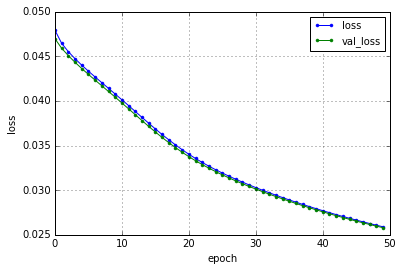

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0493 - val_loss: 0.0478
Epoch 2/50
0s - loss: 0.0470 - val_loss: 0.0462
Epoch 3/50
0s - loss: 0.0457 - val_loss: 0.0450
Epoch 4/50
0s - loss: 0.0445 - val_loss: 0.0440
Epoch 5/50
0s - loss: 0.0435 - val_loss: 0.0430
Epoch 6/50
0s - loss: 0.0425 - val_loss: 0.0420
Epoch 7/50
0s - loss: 0.0416 - val_loss: 0.0411
Epoch 8/50
0s - loss: 0.0406 - val_loss: 0.0401
Epoch 9/50
0s - loss: 0.0397 - val_loss: 0.0392
Epoch 10/50
0s - loss: 0.0388 - val_loss: 0.0383
Epoch 11/50
0s - loss: 0.0379 - val_loss: 0.0375
Epoch 12/50
0s - loss: 0.0371 - val_loss: 0.0367
Epoch 13/50
0s - loss: 0.0363 - val_loss: 0.0359
Epoch 14/50
0s - loss: 0.0356 - val_loss: 0.0352
Epoch 15/50
0s - loss: 0.0349 - val_loss: 0.0346
Epoch 16/50
0s - loss: 0.0343 - val_loss: 0.0340
Epoch 17/50
0s - loss: 0.0338 - val_loss: 0.0335
Epoch 18/50
0s - loss: 0.0333 - val_loss: 0.0330
Epoch 19/50
0s - loss: 0.0328 - val_loss: 0.0326
Epoch 20/50
0s

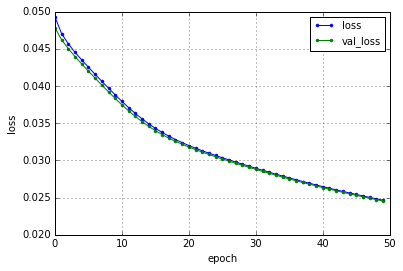

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0527 - val_loss: 0.0505
Epoch 2/50
0s - loss: 0.0492 - val_loss: 0.0479
Epoch 3/50
0s - loss: 0.0470 - val_loss: 0.0460
Epoch 4/50
0s - loss: 0.0452 - val_loss: 0.0443
Epoch 5/50
0s - loss: 0.0436 - val_loss: 0.0427
Epoch 6/50
0s - loss: 0.0420 - val_loss: 0.0411
Epoch 7/50
0s - loss: 0.0404 - val_loss: 0.0396
Epoch 8/50
0s - loss: 0.0389 - val_loss: 0.0381
Epoch 9/50
0s - loss: 0.0375 - val_loss: 0.0368
Epoch 10/50
0s - loss: 0.0362 - val_loss: 0.0355
Epoch 11/50
0s - loss: 0.0350 - val_loss: 0.0344
Epoch 12/50
0s - loss: 0.0340 - val_loss: 0.0334
Epoch 13/50
0s - loss: 0.0330 - val_loss: 0.0326
Epoch 14/50
0s - loss: 0.0322 - val_loss: 0.0318
Epoch 15/50
0s - loss: 0.0315 - val_loss: 0.0312
Epoch 16/50
0s - loss: 0.0309 - val_loss: 0.0306
Epoch 17/50
0s - loss: 0.0303 - val_loss: 0.0300
Epoch 18/50
0s - loss: 0.0298 - val_loss: 0.0295
Epoch 19/50
0s - loss: 0.0293 - val_loss: 0.0290
Epoch 20/50
0s

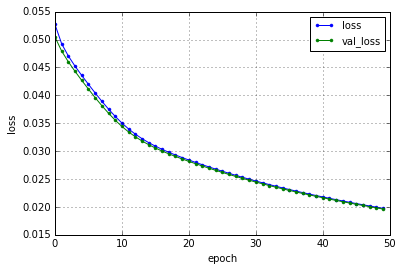

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.0577 - val_loss: 0.0529
Epoch 2/50
0s - loss: 0.0507 - val_loss: 0.0485
Epoch 3/50
0s - loss: 0.0471 - val_loss: 0.0455
Epoch 4/50
0s - loss: 0.0444 - val_loss: 0.0431
Epoch 5/50
0s - loss: 0.0420 - val_loss: 0.0408
Epoch 6/50
0s - loss: 0.0399 - val_loss: 0.0387
Epoch 7/50
0s - loss: 0.0379 - val_loss: 0.0368
Epoch 8/50
0s - loss: 0.0360 - val_loss: 0.0351
Epoch 9/50
0s - loss: 0.0344 - val_loss: 0.0335
Epoch 10/50
0s - loss: 0.0329 - val_loss: 0.0322
Epoch 11/50
0s - loss: 0.0317 - val_loss: 0.0310
Epoch 12/50
0s - loss: 0.0306 - val_loss: 0.0300
Epoch 13/50
0s - loss: 0.0296 - val_loss: 0.0291
Epoch 14/50
0s - loss: 0.0287 - val_loss: 0.0283
Epoch 15/50
0s - loss: 0.0279 - val_loss: 0.0275
Epoch 16/50
0s - loss: 0.0272 - val_loss: 0.0268
Epoch 17/50
0s - loss: 0.0265 - val_loss: 0.0262
Epoch 18/50
0s - loss: 0.0259 - val_loss: 0.0256
Epoch 19/50
0s - loss: 0.0253 - val_loss: 0.0250
Epoch 20/50
0s

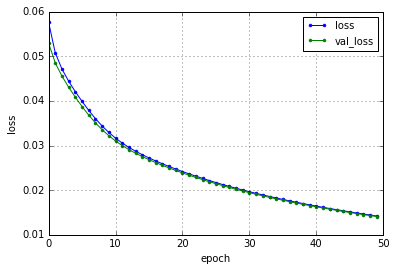

hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 1.1297 - val_loss: 1.0840
Epoch 2/50
0s - loss: 1.0334 - val_loss: 0.9718
Epoch 3/50
0s - loss: 0.9232 - val_loss: 0.8669
Epoch 4/50
0s - loss: 0.8234 - val_loss: 0.7731
Epoch 5/50
0s - loss: 0.7342 - val_loss: 0.6894
Epoch 6/50
0s - loss: 0.6547 - val_loss: 0.6147
Epoch 7/50
0s - loss: 0.5839 - val_loss: 0.5483
Epoch 8/50
0s - loss: 0.5209 - val_loss: 0.4892
Epoch 9/50
0s - loss: 0.4648 - val_loss: 0.4367
Epoch 10/50
0s - loss: 0.4150 - val_loss: 0.3900
Epoch 11/50
0s - loss: 0.3708 - val_loss: 0.3486
Epoch 12/50
0s - loss: 0.3316 - val_loss: 0.3119
Epoch 13/50
0s - loss: 0.2968 - val_loss: 0.2794
Epoch 14/50
0s - loss: 0.2661 - val_loss: 0.2507
Epoch 15/50
0s - loss: 0.2389 - val_loss: 0.2253
Epoch 16/50
0s - loss: 0.2149 - val_loss: 0.2029
Epoch 17/50
0s - loss: 0.1937 - val_loss: 0.1832
Epoch 18/50
0s - loss: 0.1751 - val_loss: 0.1659
Epoch 19/50
0s - loss: 0.1589 - val_loss: 0.1508
Epoch 20/50
0s 

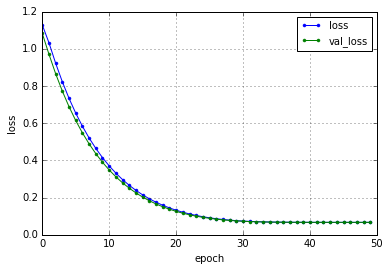

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 1.1205 - val_loss: 1.0451
Epoch 2/50
0s - loss: 0.9771 - val_loss: 0.8959
Epoch 3/50
0s - loss: 0.8320 - val_loss: 0.7592
Epoch 4/50
0s - loss: 0.7048 - val_loss: 0.6432
Epoch 5/50
0s - loss: 0.5971 - val_loss: 0.5450
Epoch 6/50
0s - loss: 0.5062 - val_loss: 0.4622
Epoch 7/50
0s - loss: 0.4295 - val_loss: 0.3926
Epoch 8/50
0s - loss: 0.3651 - val_loss: 0.3340
Epoch 9/50
0s - loss: 0.3110 - val_loss: 0.2849
Epoch 10/50
0s - loss: 0.2657 - val_loss: 0.2439
Epoch 11/50
0s - loss: 0.2278 - val_loss: 0.2097
Epoch 12/50
0s - loss: 0.1963 - val_loss: 0.1813
Epoch 13/50
0s - loss: 0.1702 - val_loss: 0.1577
Epoch 14/50
0s - loss: 0.1485 - val_loss: 0.1383
Epoch 15/50
0s - loss: 0.1308 - val_loss: 0.1224
Epoch 16/50
0s - loss: 0.1163 - val_loss: 0.1095
Epoch 17/50
0s - loss: 0.1046 - val_loss: 0.0991
Epoch 18/50
0s - loss: 0.0952 - val_loss: 0.0908
Epoch 19/50
0s - loss: 0.0877 - val_loss: 0.0843
Epoch 20/50
0s 

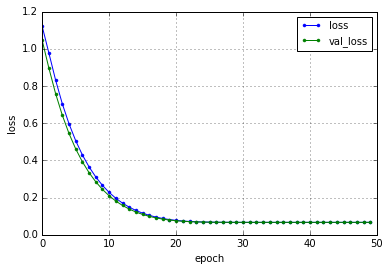

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 1.1070 - val_loss: 0.9903
Epoch 2/50
0s - loss: 0.8923 - val_loss: 0.7809
Epoch 3/50
0s - loss: 0.7013 - val_loss: 0.6134
Epoch 4/50
0s - loss: 0.5514 - val_loss: 0.4831
Epoch 5/50
0s - loss: 0.4352 - val_loss: 0.3824
Epoch 6/50
0s - loss: 0.3454 - val_loss: 0.3047
Epoch 7/50
0s - loss: 0.2763 - val_loss: 0.2450
Epoch 8/50
0s - loss: 0.2231 - val_loss: 0.1991
Epoch 9/50
0s - loss: 0.1824 - val_loss: 0.1641
Epoch 10/50
0s - loss: 0.1514 - val_loss: 0.1375
Epoch 11/50
0s - loss: 0.1279 - val_loss: 0.1174
Epoch 12/50
0s - loss: 0.1102 - val_loss: 0.1023
Epoch 13/50
0s - loss: 0.0970 - val_loss: 0.0913
Epoch 14/50
0s - loss: 0.0874 - val_loss: 0.0832
Epoch 15/50
0s - loss: 0.0805 - val_loss: 0.0775
Epoch 16/50
0s - loss: 0.0756 - val_loss: 0.0735
Epoch 17/50
0s - loss: 0.0723 - val_loss: 0.0709
Epoch 18/50
0s - loss: 0.0700 - val_loss: 0.0692
Epoch 19/50
0s - loss: 0.0687 - val_loss: 0.0681
Epoch 20/50
0s

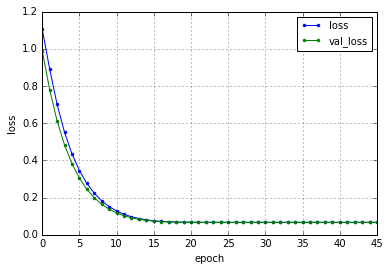

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 1.0544 - val_loss: 0.9097
Epoch 2/50
0s - loss: 0.7890 - val_loss: 0.6575
Epoch 3/50
0s - loss: 0.5697 - val_loss: 0.4761
Epoch 4/50
0s - loss: 0.4144 - val_loss: 0.3489
Epoch 5/50
0s - loss: 0.3058 - val_loss: 0.2601
Epoch 6/50
0s - loss: 0.2301 - val_loss: 0.1982
Epoch 7/50
0s - loss: 0.1774 - val_loss: 0.1553
Epoch 8/50
0s - loss: 0.1409 - val_loss: 0.1256
Epoch 9/50
0s - loss: 0.1158 - val_loss: 0.1053
Epoch 10/50
0s - loss: 0.0986 - val_loss: 0.0915
Epoch 11/50
0s - loss: 0.0870 - val_loss: 0.0823
Epoch 12/50
0s - loss: 0.0793 - val_loss: 0.0761
Epoch 13/50
0s - loss: 0.0742 - val_loss: 0.0723
Epoch 14/50
0s - loss: 0.0711 - val_loss: 0.0699
Epoch 15/50
0s - loss: 0.0692 - val_loss: 0.0684
Epoch 16/50
0s - loss: 0.0681 - val_loss: 0.0676
Epoch 17/50
0s - loss: 0.0675 - val_loss: 0.0672
Epoch 18/50
0s - loss: 0.0671 - val_loss: 0.0670
Epoch 19/50
0s - loss: 0.0670 - val_loss: 0.0669
Epoch 20/50
0s

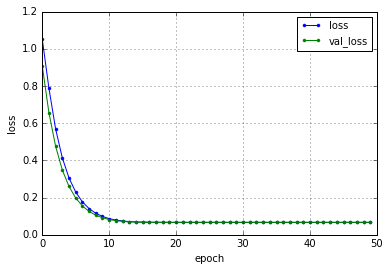

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 1.0508 - val_loss: 0.8226
Epoch 2/50
0s - loss: 0.6475 - val_loss: 0.4662
Epoch 3/50
0s - loss: 0.3636 - val_loss: 0.2655
Epoch 4/50
0s - loss: 0.2138 - val_loss: 0.1648
Epoch 5/50
0s - loss: 0.1391 - val_loss: 0.1147
Epoch 6/50
0s - loss: 0.1019 - val_loss: 0.0898
Epoch 7/50
0s - loss: 0.0835 - val_loss: 0.0776
Epoch 8/50
0s - loss: 0.0745 - val_loss: 0.0716
Epoch 9/50
0s - loss: 0.0702 - val_loss: 0.0689
Epoch 10/50
0s - loss: 0.0682 - val_loss: 0.0676
Epoch 11/50
0s - loss: 0.0674 - val_loss: 0.0671
Epoch 12/50
0s - loss: 0.0670 - val_loss: 0.0669
Epoch 13/50
0s - loss: 0.0669 - val_loss: 0.0668
Epoch 14/50
0s - loss: 0.0669 - val_loss: 0.0668
Epoch 15/50
0s - loss: 0.0669 - val_loss: 0.0668
Epoch 16/50
0s - loss: 0.0669 - val_loss: 0.0668
Epoch 17/50
0s - loss: 0.0669 - val_loss: 0.0668
Epoch 18/50
0s - loss: 0.0669 - val_loss: 0.0668
Epoch 19/50
0s - loss: 0.0669 - val_loss: 0.0668
Epoch 20/50
0s

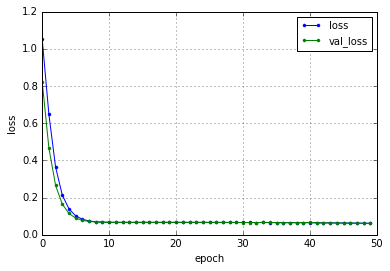

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.8556 - val_loss: 0.4912
Epoch 2/50
0s - loss: 0.3116 - val_loss: 0.1720
Epoch 3/50
0s - loss: 0.1265 - val_loss: 0.0925
Epoch 4/50
0s - loss: 0.0815 - val_loss: 0.0731
Epoch 5/50
0s - loss: 0.0704 - val_loss: 0.0682
Epoch 6/50
0s - loss: 0.0675 - val_loss: 0.0669
Epoch 7/50
0s - loss: 0.0667 - val_loss: 0.0665
Epoch 8/50
0s - loss: 0.0665 - val_loss: 0.0663
Epoch 9/50
0s - loss: 0.0663 - val_loss: 0.0662
Epoch 10/50
0s - loss: 0.0661 - val_loss: 0.0659
Epoch 11/50
0s - loss: 0.0659 - val_loss: 0.0657
Epoch 12/50
0s - loss: 0.0655 - val_loss: 0.0654
Epoch 13/50
0s - loss: 0.0652 - val_loss: 0.0649
Epoch 14/50
0s - loss: 0.0647 - val_loss: 0.0647
Epoch 15/50
0s - loss: 0.0644 - val_loss: 0.0639
Epoch 16/50
0s - loss: 0.0635 - val_loss: 0.0632
Epoch 17/50
0s - loss: 0.0630 - val_loss: 0.0632
Epoch 18/50
0s - loss: 0.0625 - val_loss: 0.0617
Epoch 19/50
0s - loss: 0.0615 - val_loss: 0.0610
Epoch 20/50
0s

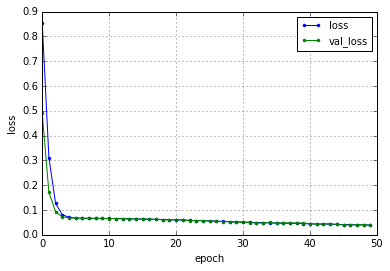

hiden node = 4
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1432 - val_loss: 0.1413
Epoch 2/50
0s - loss: 0.1398 - val_loss: 0.1381
Epoch 3/50
0s - loss: 0.1365 - val_loss: 0.1345
Epoch 4/50
0s - loss: 0.1327 - val_loss: 0.1304
Epoch 5/50
0s - loss: 0.1285 - val_loss: 0.1262
Epoch 6/50
0s - loss: 0.1244 - val_loss: 0.1223
Epoch 7/50
0s - loss: 0.1207 - val_loss: 0.1188
Epoch 8/50
0s - loss: 0.1174 - val_loss: 0.1159
Epoch 9/50
0s - loss: 0.1147 - val_loss: 0.1135
Epoch 10/50
0s - loss: 0.1125 - val_loss: 0.1115
Epoch 11/50
0s - loss: 0.1108 - val_loss: 0.1100
Epoch 12/50
0s - loss: 0.1094 - val_loss: 0.1087
Epoch 13/50
0s - loss: 0.1082 - val_loss: 0.1077
Epoch 14/50
0s - loss: 0.1073 - val_loss: 0.1069
Epoch 15/50
0s - loss: 0.1066 - val_loss: 0.1062
Epoch 16/50
0s - loss: 0.1059 - val_loss: 0.1056
Epoch 17/50
0s - loss: 0.1053 - val_loss: 0.1050
Epoch 18/50
0s - loss: 0.1048 - val_loss: 0.1045
Epoch 19/50
0s - loss: 0.1043 - val_loss: 0.1041
Epoch 20/50
0s 

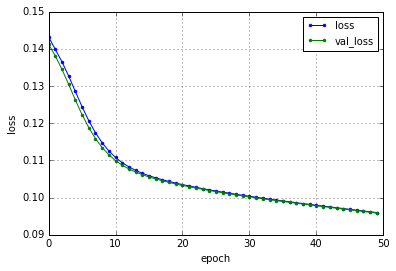

hiden node = 8
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1426 - val_loss: 0.1395
Epoch 2/50
0s - loss: 0.1372 - val_loss: 0.1342
Epoch 3/50
0s - loss: 0.1315 - val_loss: 0.1282
Epoch 4/50
0s - loss: 0.1253 - val_loss: 0.1220
Epoch 5/50
0s - loss: 0.1195 - val_loss: 0.1166
Epoch 6/50
0s - loss: 0.1145 - val_loss: 0.1123
Epoch 7/50
0s - loss: 0.1107 - val_loss: 0.1090
Epoch 8/50
0s - loss: 0.1080 - val_loss: 0.1068
Epoch 9/50
0s - loss: 0.1060 - val_loss: 0.1052
Epoch 10/50
0s - loss: 0.1046 - val_loss: 0.1040
Epoch 11/50
0s - loss: 0.1036 - val_loss: 0.1031
Epoch 12/50
0s - loss: 0.1028 - val_loss: 0.1024
Epoch 13/50
0s - loss: 0.1021 - val_loss: 0.1018
Epoch 14/50
0s - loss: 0.1015 - val_loss: 0.1012
Epoch 15/50
0s - loss: 0.1010 - val_loss: 0.1007
Epoch 16/50
0s - loss: 0.1005 - val_loss: 0.1002
Epoch 17/50
0s - loss: 0.1000 - val_loss: 0.0998
Epoch 18/50
0s - loss: 0.0996 - val_loss: 0.0993
Epoch 19/50
0s - loss: 0.0991 - val_loss: 0.0989
Epoch 20/50
0s 

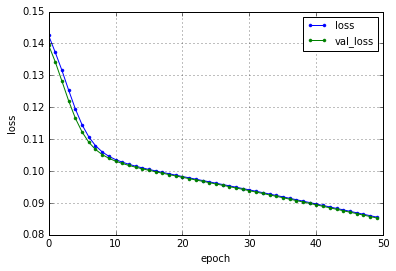

hiden node = 12
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1444 - val_loss: 0.1416
Epoch 2/50
0s - loss: 0.1398 - val_loss: 0.1375
Epoch 3/50
0s - loss: 0.1354 - val_loss: 0.1327
Epoch 4/50
0s - loss: 0.1303 - val_loss: 0.1271
Epoch 5/50
0s - loss: 0.1245 - val_loss: 0.1212
Epoch 6/50
0s - loss: 0.1186 - val_loss: 0.1157
Epoch 7/50
0s - loss: 0.1135 - val_loss: 0.1111
Epoch 8/50
0s - loss: 0.1094 - val_loss: 0.1076
Epoch 9/50
0s - loss: 0.1064 - val_loss: 0.1051
Epoch 10/50
0s - loss: 0.1042 - val_loss: 0.1032
Epoch 11/50
0s - loss: 0.1025 - val_loss: 0.1018
Epoch 12/50
0s - loss: 0.1012 - val_loss: 0.1006
Epoch 13/50
0s - loss: 0.1002 - val_loss: 0.0996
Epoch 14/50
0s - loss: 0.0993 - val_loss: 0.0988
Epoch 15/50
0s - loss: 0.0984 - val_loss: 0.0979
Epoch 16/50
0s - loss: 0.0976 - val_loss: 0.0972
Epoch 17/50
0s - loss: 0.0968 - val_loss: 0.0964
Epoch 18/50
0s - loss: 0.0961 - val_loss: 0.0956
Epoch 19/50
0s - loss: 0.0953 - val_loss: 0.0949
Epoch 20/50
0s

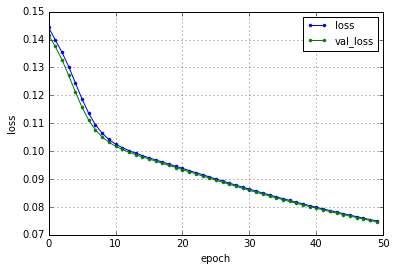

hiden node = 16
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1474 - val_loss: 0.1433
Epoch 2/50
0s - loss: 0.1410 - val_loss: 0.1382
Epoch 3/50
0s - loss: 0.1358 - val_loss: 0.1327
Epoch 4/50
0s - loss: 0.1299 - val_loss: 0.1263
Epoch 5/50
0s - loss: 0.1233 - val_loss: 0.1198
Epoch 6/50
0s - loss: 0.1170 - val_loss: 0.1139
Epoch 7/50
0s - loss: 0.1116 - val_loss: 0.1091
Epoch 8/50
0s - loss: 0.1074 - val_loss: 0.1055
Epoch 9/50
0s - loss: 0.1043 - val_loss: 0.1030
Epoch 10/50
0s - loss: 0.1021 - val_loss: 0.1011
Epoch 11/50
0s - loss: 0.1004 - val_loss: 0.0996
Epoch 12/50
0s - loss: 0.0990 - val_loss: 0.0983
Epoch 13/50
0s - loss: 0.0978 - val_loss: 0.0972
Epoch 14/50
0s - loss: 0.0968 - val_loss: 0.0962
Epoch 15/50
0s - loss: 0.0958 - val_loss: 0.0952
Epoch 16/50
0s - loss: 0.0948 - val_loss: 0.0943
Epoch 17/50
0s - loss: 0.0939 - val_loss: 0.0934
Epoch 18/50
0s - loss: 0.0930 - val_loss: 0.0924
Epoch 19/50
0s - loss: 0.0920 - val_loss: 0.0915
Epoch 20/50
0s

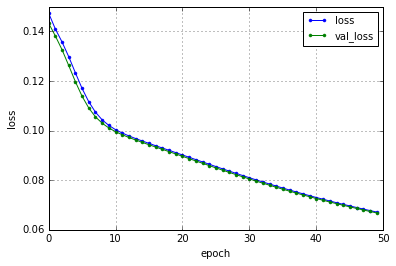

hiden node = 32
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1509 - val_loss: 0.1427
Epoch 2/50
0s - loss: 0.1374 - val_loss: 0.1310
Epoch 3/50
0s - loss: 0.1258 - val_loss: 0.1196
Epoch 4/50
0s - loss: 0.1153 - val_loss: 0.1105
Epoch 5/50
0s - loss: 0.1075 - val_loss: 0.1042
Epoch 6/50
0s - loss: 0.1024 - val_loss: 0.1004
Epoch 7/50
0s - loss: 0.0992 - val_loss: 0.0979
Epoch 8/50
0s - loss: 0.0970 - val_loss: 0.0960
Epoch 9/50
0s - loss: 0.0954 - val_loss: 0.0945
Epoch 10/50
0s - loss: 0.0939 - val_loss: 0.0932
Epoch 11/50
0s - loss: 0.0926 - val_loss: 0.0918
Epoch 12/50
0s - loss: 0.0913 - val_loss: 0.0905
Epoch 13/50
0s - loss: 0.0899 - val_loss: 0.0892
Epoch 14/50
0s - loss: 0.0886 - val_loss: 0.0878
Epoch 15/50
0s - loss: 0.0872 - val_loss: 0.0864
Epoch 16/50
0s - loss: 0.0859 - val_loss: 0.0851
Epoch 17/50
0s - loss: 0.0845 - val_loss: 0.0837
Epoch 18/50
0s - loss: 0.0831 - val_loss: 0.0823
Epoch 19/50
0s - loss: 0.0817 - val_loss: 0.0808
Epoch 20/50
0s

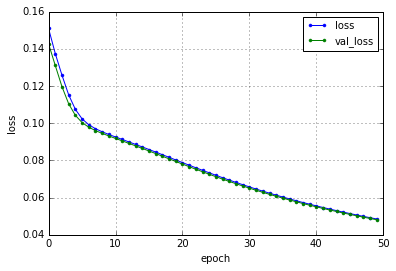

hiden node = 64
Train on 1987 samples, validate on 1987 samples
Epoch 1/50
0s - loss: 0.1538 - val_loss: 0.1400
Epoch 2/50
0s - loss: 0.1313 - val_loss: 0.1213
Epoch 3/50
0s - loss: 0.1149 - val_loss: 0.1081
Epoch 4/50
0s - loss: 0.1042 - val_loss: 0.1002
Epoch 5/50
0s - loss: 0.0980 - val_loss: 0.0956
Epoch 6/50
0s - loss: 0.0941 - val_loss: 0.0922
Epoch 7/50
0s - loss: 0.0910 - val_loss: 0.0894
Epoch 8/50
0s - loss: 0.0883 - val_loss: 0.0868
Epoch 9/50
0s - loss: 0.0857 - val_loss: 0.0843
Epoch 10/50
0s - loss: 0.0832 - val_loss: 0.0818
Epoch 11/50
0s - loss: 0.0808 - val_loss: 0.0794
Epoch 12/50
0s - loss: 0.0784 - val_loss: 0.0770
Epoch 13/50
0s - loss: 0.0761 - val_loss: 0.0747
Epoch 14/50
0s - loss: 0.0738 - val_loss: 0.0725
Epoch 15/50
0s - loss: 0.0715 - val_loss: 0.0703
Epoch 16/50
0s - loss: 0.0694 - val_loss: 0.0681
Epoch 17/50
0s - loss: 0.0672 - val_loss: 0.0660
Epoch 18/50
0s - loss: 0.0652 - val_loss: 0.0640
Epoch 19/50
0s - loss: 0.0632 - val_loss: 0.0621
Epoch 20/50
0s

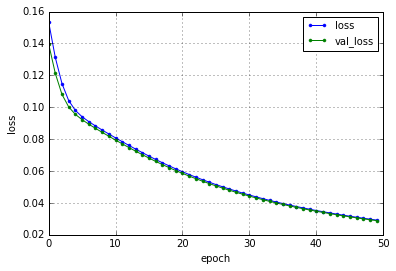

AccX is registed now
AccY is registed now
AccZ is registed now
Build Complete
(254742, 3)
windowData's num =992
SourceData's aborting data = 22
window shape is (992, 1024, 3)
(992, 1024, 3)
hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0467 - val_loss: 0.0466
Epoch 2/50
0s - loss: 0.0465 - val_loss: 0.0464
Epoch 3/50
0s - loss: 0.0464 - val_loss: 0.0463
Epoch 4/50
0s - loss: 0.0462 - val_loss: 0.0461
Epoch 5/50
0s - loss: 0.0461 - val_loss: 0.0460
Epoch 6/50
0s - loss: 0.0459 - val_loss: 0.0459
Epoch 7/50
0s - loss: 0.0458 - val_loss: 0.0457
Epoch 8/50
0s - loss: 0.0457 - val_loss: 0.0456
Epoch 9/50
0s - loss: 0.0456 - val_loss: 0.0455
Epoch 10/50
0s - loss: 0.0455 - val_loss: 0.0454
Epoch 11/50
0s - loss: 0.0454 - val_loss: 0.0453
Epoch 12/50
0s - loss: 0.0453 - val_loss: 0.0453
Epoch 13/50
0s - loss: 0.0452 - val_loss: 0.0452
Epoch 14/50
0s - loss: 0.0451 - val_loss: 0.0451
Epoch 15/50
0s - loss: 0.0451 - val_loss: 0.0450
Epoch 16/50
0s - loss: 

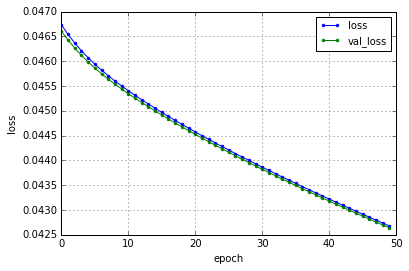

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0470 - val_loss: 0.0469
Epoch 2/50
0s - loss: 0.0468 - val_loss: 0.0467
Epoch 3/50
0s - loss: 0.0467 - val_loss: 0.0466
Epoch 4/50
0s - loss: 0.0465 - val_loss: 0.0464
Epoch 5/50
0s - loss: 0.0464 - val_loss: 0.0463
Epoch 6/50
0s - loss: 0.0462 - val_loss: 0.0462
Epoch 7/50
0s - loss: 0.0461 - val_loss: 0.0460
Epoch 8/50
0s - loss: 0.0460 - val_loss: 0.0459
Epoch 9/50
0s - loss: 0.0459 - val_loss: 0.0458
Epoch 10/50
0s - loss: 0.0458 - val_loss: 0.0457
Epoch 11/50
0s - loss: 0.0457 - val_loss: 0.0456
Epoch 12/50
0s - loss: 0.0455 - val_loss: 0.0455
Epoch 13/50
0s - loss: 0.0454 - val_loss: 0.0454
Epoch 14/50
0s - loss: 0.0453 - val_loss: 0.0453
Epoch 15/50
0s - loss: 0.0452 - val_loss: 0.0452
Epoch 16/50
0s - loss: 0.0451 - val_loss: 0.0451
Epoch 17/50
0s - loss: 0.0450 - val_loss: 0.0450
Epoch 18/50
0s - loss: 0.0449 - val_loss: 0.0449
Epoch 19/50
0s - loss: 0.0448 - val_loss: 0.0448
Epoch 20/50
0s - 

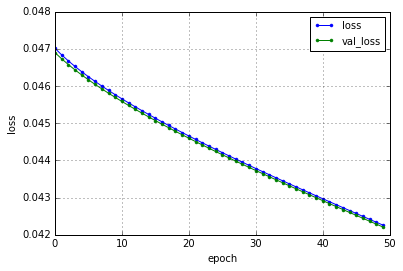

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0478 - val_loss: 0.0476
Epoch 2/50
0s - loss: 0.0475 - val_loss: 0.0473
Epoch 3/50
0s - loss: 0.0472 - val_loss: 0.0471
Epoch 4/50
0s - loss: 0.0470 - val_loss: 0.0469
Epoch 5/50
0s - loss: 0.0468 - val_loss: 0.0467
Epoch 6/50
0s - loss: 0.0466 - val_loss: 0.0465
Epoch 7/50
0s - loss: 0.0465 - val_loss: 0.0464
Epoch 8/50
0s - loss: 0.0463 - val_loss: 0.0462
Epoch 9/50
0s - loss: 0.0462 - val_loss: 0.0461
Epoch 10/50
0s - loss: 0.0460 - val_loss: 0.0459
Epoch 11/50
0s - loss: 0.0459 - val_loss: 0.0458
Epoch 12/50
0s - loss: 0.0457 - val_loss: 0.0457
Epoch 13/50
0s - loss: 0.0456 - val_loss: 0.0455
Epoch 14/50
0s - loss: 0.0455 - val_loss: 0.0454
Epoch 15/50
0s - loss: 0.0454 - val_loss: 0.0453
Epoch 16/50
0s - loss: 0.0453 - val_loss: 0.0452
Epoch 17/50
0s - loss: 0.0451 - val_loss: 0.0451
Epoch 18/50
0s - loss: 0.0450 - val_loss: 0.0450
Epoch 19/50
0s - loss: 0.0449 - val_loss: 0.0448
Epoch 20/50
0s -

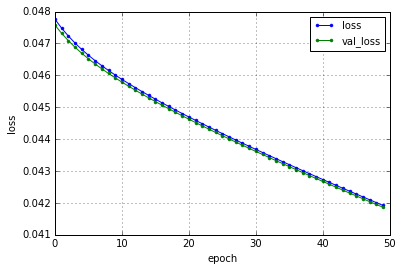

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0483 - val_loss: 0.0481
Epoch 2/50
0s - loss: 0.0480 - val_loss: 0.0478
Epoch 3/50
0s - loss: 0.0477 - val_loss: 0.0476
Epoch 4/50
0s - loss: 0.0475 - val_loss: 0.0474
Epoch 5/50
0s - loss: 0.0473 - val_loss: 0.0472
Epoch 6/50
0s - loss: 0.0471 - val_loss: 0.0470
Epoch 7/50
0s - loss: 0.0469 - val_loss: 0.0468
Epoch 8/50
0s - loss: 0.0467 - val_loss: 0.0466
Epoch 9/50
0s - loss: 0.0466 - val_loss: 0.0465
Epoch 10/50
0s - loss: 0.0464 - val_loss: 0.0463
Epoch 11/50
0s - loss: 0.0463 - val_loss: 0.0462
Epoch 12/50
0s - loss: 0.0461 - val_loss: 0.0460
Epoch 13/50
0s - loss: 0.0460 - val_loss: 0.0459
Epoch 14/50
0s - loss: 0.0458 - val_loss: 0.0458
Epoch 15/50
0s - loss: 0.0457 - val_loss: 0.0456
Epoch 16/50
0s - loss: 0.0456 - val_loss: 0.0455
Epoch 17/50
0s - loss: 0.0454 - val_loss: 0.0454
Epoch 18/50
0s - loss: 0.0453 - val_loss: 0.0452
Epoch 19/50
0s - loss: 0.0452 - val_loss: 0.0451
Epoch 20/50
0s -

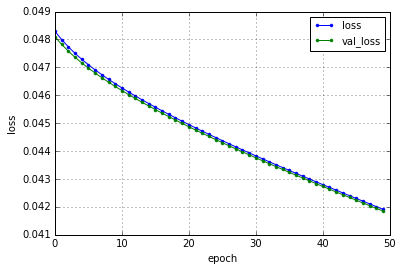

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0503 - val_loss: 0.0499
Epoch 2/50
0s - loss: 0.0497 - val_loss: 0.0494
Epoch 3/50
0s - loss: 0.0493 - val_loss: 0.0490
Epoch 4/50
0s - loss: 0.0489 - val_loss: 0.0486
Epoch 5/50
0s - loss: 0.0485 - val_loss: 0.0483
Epoch 6/50
0s - loss: 0.0482 - val_loss: 0.0480
Epoch 7/50
0s - loss: 0.0479 - val_loss: 0.0477
Epoch 8/50
0s - loss: 0.0476 - val_loss: 0.0474
Epoch 9/50
0s - loss: 0.0474 - val_loss: 0.0472
Epoch 10/50
0s - loss: 0.0471 - val_loss: 0.0470
Epoch 11/50
0s - loss: 0.0469 - val_loss: 0.0468
Epoch 12/50
0s - loss: 0.0467 - val_loss: 0.0465
Epoch 13/50
0s - loss: 0.0465 - val_loss: 0.0463
Epoch 14/50
0s - loss: 0.0463 - val_loss: 0.0461
Epoch 15/50
0s - loss: 0.0461 - val_loss: 0.0460
Epoch 16/50
0s - loss: 0.0459 - val_loss: 0.0458
Epoch 17/50
0s - loss: 0.0457 - val_loss: 0.0456
Epoch 18/50
0s - loss: 0.0455 - val_loss: 0.0454
Epoch 19/50
0s - loss: 0.0454 - val_loss: 0.0452
Epoch 20/50
0s -

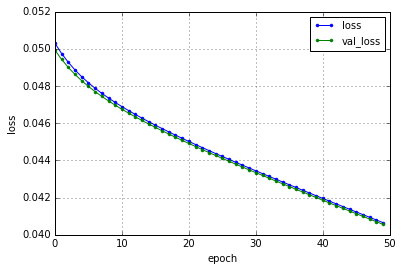

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.0542 - val_loss: 0.0535
Epoch 2/50
0s - loss: 0.0532 - val_loss: 0.0526
Epoch 3/50
0s - loss: 0.0523 - val_loss: 0.0518
Epoch 4/50
0s - loss: 0.0516 - val_loss: 0.0511
Epoch 5/50
0s - loss: 0.0509 - val_loss: 0.0505
Epoch 6/50
0s - loss: 0.0503 - val_loss: 0.0500
Epoch 7/50
0s - loss: 0.0498 - val_loss: 0.0495
Epoch 8/50
0s - loss: 0.0494 - val_loss: 0.0491
Epoch 9/50
0s - loss: 0.0489 - val_loss: 0.0487
Epoch 10/50
0s - loss: 0.0485 - val_loss: 0.0483
Epoch 11/50
0s - loss: 0.0482 - val_loss: 0.0479
Epoch 12/50
0s - loss: 0.0478 - val_loss: 0.0476
Epoch 13/50
0s - loss: 0.0475 - val_loss: 0.0472
Epoch 14/50
0s - loss: 0.0471 - val_loss: 0.0469
Epoch 15/50
0s - loss: 0.0468 - val_loss: 0.0466
Epoch 16/50
0s - loss: 0.0465 - val_loss: 0.0463
Epoch 17/50
0s - loss: 0.0462 - val_loss: 0.0460
Epoch 18/50
0s - loss: 0.0459 - val_loss: 0.0458
Epoch 19/50
0s - loss: 0.0457 - val_loss: 0.0455
Epoch 20/50
0s -

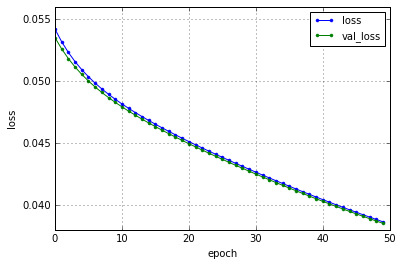

hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.1550 - val_loss: 1.1434
Epoch 2/50
0s - loss: 1.1387 - val_loss: 1.1299
Epoch 3/50
0s - loss: 1.1245 - val_loss: 1.1145
Epoch 4/50
0s - loss: 1.1082 - val_loss: 1.0967
Epoch 5/50
0s - loss: 1.0895 - val_loss: 1.0765
Epoch 6/50
0s - loss: 1.0688 - val_loss: 1.0552
Epoch 7/50
0s - loss: 1.0475 - val_loss: 1.0341
Epoch 8/50
0s - loss: 1.0266 - val_loss: 1.0134
Epoch 9/50
0s - loss: 1.0059 - val_loss: 0.9930
Epoch 10/50
0s - loss: 0.9857 - val_loss: 0.9729
Epoch 11/50
0s - loss: 0.9657 - val_loss: 0.9532
Epoch 12/50
0s - loss: 0.9461 - val_loss: 0.9338
Epoch 13/50
0s - loss: 0.9269 - val_loss: 0.9148
Epoch 14/50
0s - loss: 0.9079 - val_loss: 0.8961
Epoch 15/50
0s - loss: 0.8894 - val_loss: 0.8777
Epoch 16/50
0s - loss: 0.8711 - val_loss: 0.8597
Epoch 17/50
0s - loss: 0.8532 - val_loss: 0.8420
Epoch 18/50
0s - loss: 0.8357 - val_loss: 0.8246
Epoch 19/50
0s - loss: 0.8184 - val_loss: 0.8076
Epoch 20/50
0s - 

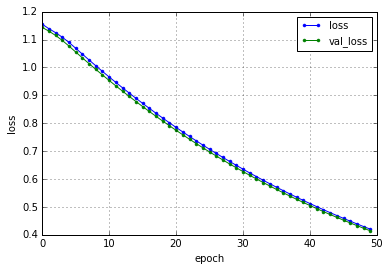

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.1533 - val_loss: 1.1348
Epoch 2/50
0s - loss: 1.1235 - val_loss: 1.1034
Epoch 3/50
0s - loss: 1.0914 - val_loss: 1.0689
Epoch 4/50
0s - loss: 1.0553 - val_loss: 1.0314
Epoch 5/50
0s - loss: 1.0180 - val_loss: 0.9947
Epoch 6/50
0s - loss: 0.9817 - val_loss: 0.9591
Epoch 7/50
0s - loss: 0.9466 - val_loss: 0.9247
Epoch 8/50
0s - loss: 0.9126 - val_loss: 0.8915
Epoch 9/50
0s - loss: 0.8797 - val_loss: 0.8593
Epoch 10/50
0s - loss: 0.8480 - val_loss: 0.8283
Epoch 11/50
0s - loss: 0.8173 - val_loss: 0.7983
Epoch 12/50
0s - loss: 0.7877 - val_loss: 0.7694
Epoch 13/50
0s - loss: 0.7592 - val_loss: 0.7415
Epoch 14/50
0s - loss: 0.7316 - val_loss: 0.7146
Epoch 15/50
0s - loss: 0.7051 - val_loss: 0.6886
Epoch 16/50
0s - loss: 0.6794 - val_loss: 0.6636
Epoch 17/50
0s - loss: 0.6547 - val_loss: 0.6394
Epoch 18/50
0s - loss: 0.6309 - val_loss: 0.6161
Epoch 19/50
0s - loss: 0.6079 - val_loss: 0.5937
Epoch 20/50
0s - 

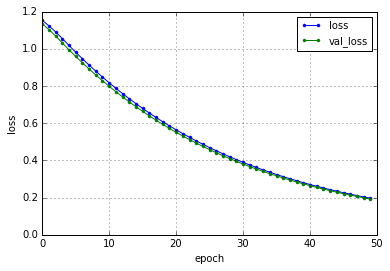

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.1534 - val_loss: 1.1311
Epoch 2/50
0s - loss: 1.1170 - val_loss: 1.0882
Epoch 3/50
0s - loss: 1.0685 - val_loss: 1.0319
Epoch 4/50
0s - loss: 1.0101 - val_loss: 0.9720
Epoch 5/50
0s - loss: 0.9510 - val_loss: 0.9148
Epoch 6/50
0s - loss: 0.8949 - val_loss: 0.8607
Epoch 7/50
0s - loss: 0.8420 - val_loss: 0.8098
Epoch 8/50
0s - loss: 0.7922 - val_loss: 0.7619
Epoch 9/50
0s - loss: 0.7454 - val_loss: 0.7169
Epoch 10/50
0s - loss: 0.7013 - val_loss: 0.6746
Epoch 11/50
0s - loss: 0.6600 - val_loss: 0.6348
Epoch 12/50
0s - loss: 0.6211 - val_loss: 0.5975
Epoch 13/50
0s - loss: 0.5847 - val_loss: 0.5625
Epoch 14/50
0s - loss: 0.5504 - val_loss: 0.5297
Epoch 15/50
0s - loss: 0.5183 - val_loss: 0.4989
Epoch 16/50
0s - loss: 0.4882 - val_loss: 0.4700
Epoch 17/50
0s - loss: 0.4600 - val_loss: 0.4429
Epoch 18/50
0s - loss: 0.4335 - val_loss: 0.4175
Epoch 19/50
0s - loss: 0.4087 - val_loss: 0.3937
Epoch 20/50
0s -

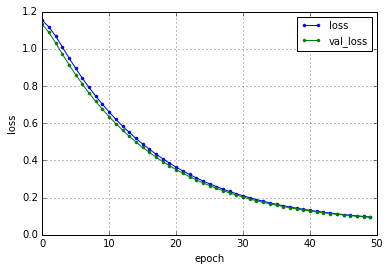

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.1286 - val_loss: 1.0904
Epoch 2/50
0s - loss: 1.0652 - val_loss: 1.0189
Epoch 3/50
0s - loss: 0.9917 - val_loss: 0.9446
Epoch 4/50
0s - loss: 0.9188 - val_loss: 0.8744
Epoch 5/50
0s - loss: 0.8504 - val_loss: 0.8093
Epoch 6/50
0s - loss: 0.7870 - val_loss: 0.7490
Epoch 7/50
0s - loss: 0.7284 - val_loss: 0.6932
Epoch 8/50
0s - loss: 0.6742 - val_loss: 0.6417
Epoch 9/50
0s - loss: 0.6242 - val_loss: 0.5943
Epoch 10/50
0s - loss: 0.5781 - val_loss: 0.5505
Epoch 11/50
0s - loss: 0.5356 - val_loss: 0.5102
Epoch 12/50
0s - loss: 0.4964 - val_loss: 0.4730
Epoch 13/50
0s - loss: 0.4604 - val_loss: 0.4388
Epoch 14/50
0s - loss: 0.4272 - val_loss: 0.4073
Epoch 15/50
0s - loss: 0.3967 - val_loss: 0.3784
Epoch 16/50
0s - loss: 0.3686 - val_loss: 0.3518
Epoch 17/50
0s - loss: 0.3427 - val_loss: 0.3273
Epoch 18/50
0s - loss: 0.3190 - val_loss: 0.3048
Epoch 19/50
0s - loss: 0.2972 - val_loss: 0.2842
Epoch 20/50
0s -

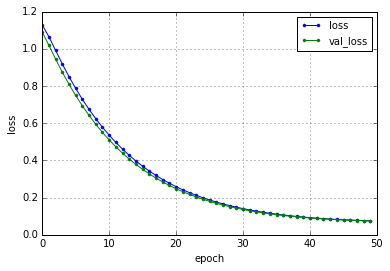

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.1067 - val_loss: 1.0310
Epoch 2/50
0s - loss: 0.9887 - val_loss: 0.9124
Epoch 3/50
0s - loss: 0.8694 - val_loss: 0.7960
Epoch 4/50
0s - loss: 0.7574 - val_loss: 0.6925
Epoch 5/50
0s - loss: 0.6588 - val_loss: 0.6025
Epoch 6/50
0s - loss: 0.5734 - val_loss: 0.5249
Epoch 7/50
0s - loss: 0.4999 - val_loss: 0.4582
Epoch 8/50
0s - loss: 0.4367 - val_loss: 0.4009
Epoch 9/50
0s - loss: 0.3825 - val_loss: 0.3518
Epoch 10/50
0s - loss: 0.3360 - val_loss: 0.3097
Epoch 11/50
0s - loss: 0.2962 - val_loss: 0.2737
Epoch 12/50
0s - loss: 0.2621 - val_loss: 0.2429
Epoch 13/50
0s - loss: 0.2330 - val_loss: 0.2165
Epoch 14/50
0s - loss: 0.2081 - val_loss: 0.1940
Epoch 15/50
0s - loss: 0.1868 - val_loss: 0.1748
Epoch 16/50
0s - loss: 0.1686 - val_loss: 0.1584
Epoch 17/50
0s - loss: 0.1531 - val_loss: 0.1444
Epoch 18/50
0s - loss: 0.1399 - val_loss: 0.1324
Epoch 19/50
0s - loss: 0.1286 - val_loss: 0.1223
Epoch 20/50
0s -

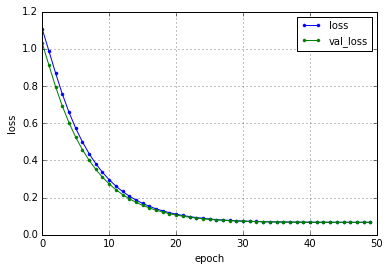

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 1.1474 - val_loss: 1.0352
Epoch 2/50
0s - loss: 0.9732 - val_loss: 0.8598
Epoch 3/50
0s - loss: 0.7948 - val_loss: 0.6838
Epoch 4/50
0s - loss: 0.6259 - val_loss: 0.5305
Epoch 5/50
0s - loss: 0.4834 - val_loss: 0.4074
Epoch 6/50
0s - loss: 0.3713 - val_loss: 0.3138
Epoch 7/50
0s - loss: 0.2870 - val_loss: 0.2446
Epoch 8/50
0s - loss: 0.2252 - val_loss: 0.1945
Epoch 9/50
0s - loss: 0.1805 - val_loss: 0.1584
Epoch 10/50
0s - loss: 0.1483 - val_loss: 0.1325
Epoch 11/50
0s - loss: 0.1253 - val_loss: 0.1139
Epoch 12/50
0s - loss: 0.1087 - val_loss: 0.1005
Epoch 13/50
0s - loss: 0.0968 - val_loss: 0.0909
Epoch 14/50
0s - loss: 0.0883 - val_loss: 0.0841
Epoch 15/50
0s - loss: 0.0822 - val_loss: 0.0791
Epoch 16/50
0s - loss: 0.0778 - val_loss: 0.0756
Epoch 17/50
0s - loss: 0.0747 - val_loss: 0.0731
Epoch 18/50
0s - loss: 0.0724 - val_loss: 0.0713
Epoch 19/50
0s - loss: 0.0708 - val_loss: 0.0700
Epoch 20/50
0s -

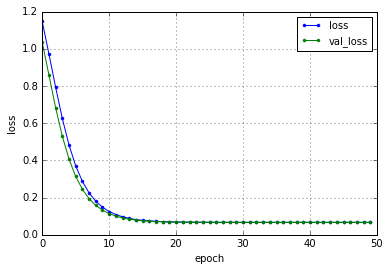

hiden node = 4
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.1430 - val_loss: 0.1426
Epoch 2/50
0s - loss: 0.1423 - val_loss: 0.1419
Epoch 3/50
0s - loss: 0.1417 - val_loss: 0.1413
Epoch 4/50
0s - loss: 0.1411 - val_loss: 0.1406
Epoch 5/50
0s - loss: 0.1404 - val_loss: 0.1399
Epoch 6/50
0s - loss: 0.1397 - val_loss: 0.1392
Epoch 7/50
0s - loss: 0.1389 - val_loss: 0.1384
Epoch 8/50
0s - loss: 0.1381 - val_loss: 0.1376
Epoch 9/50
0s - loss: 0.1373 - val_loss: 0.1368
Epoch 10/50
0s - loss: 0.1365 - val_loss: 0.1359
Epoch 11/50
0s - loss: 0.1356 - val_loss: 0.1350
Epoch 12/50
0s - loss: 0.1346 - val_loss: 0.1341
Epoch 13/50
0s - loss: 0.1337 - val_loss: 0.1331
Epoch 14/50
0s - loss: 0.1328 - val_loss: 0.1322
Epoch 15/50
0s - loss: 0.1318 - val_loss: 0.1312
Epoch 16/50
0s - loss: 0.1309 - val_loss: 0.1303
Epoch 17/50
0s - loss: 0.1299 - val_loss: 0.1293
Epoch 18/50
0s - loss: 0.1290 - val_loss: 0.1284
Epoch 19/50
0s - loss: 0.1281 - val_loss: 0.1275
Epoch 20/50
0s - 

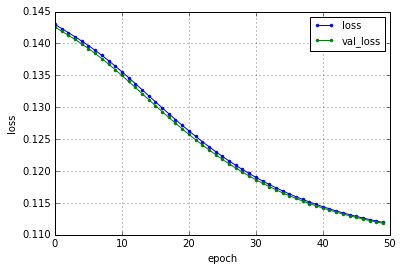

hiden node = 8
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.1443 - val_loss: 0.1436
Epoch 2/50
0s - loss: 0.1433 - val_loss: 0.1429
Epoch 3/50
0s - loss: 0.1426 - val_loss: 0.1422
Epoch 4/50
0s - loss: 0.1420 - val_loss: 0.1415
Epoch 5/50
0s - loss: 0.1413 - val_loss: 0.1409
Epoch 6/50
0s - loss: 0.1406 - val_loss: 0.1402
Epoch 7/50
0s - loss: 0.1399 - val_loss: 0.1394
Epoch 8/50
0s - loss: 0.1392 - val_loss: 0.1387
Epoch 9/50
0s - loss: 0.1384 - val_loss: 0.1379
Epoch 10/50
0s - loss: 0.1376 - val_loss: 0.1370
Epoch 11/50
0s - loss: 0.1367 - val_loss: 0.1361
Epoch 12/50
0s - loss: 0.1358 - val_loss: 0.1352
Epoch 13/50
0s - loss: 0.1348 - val_loss: 0.1342
Epoch 14/50
0s - loss: 0.1339 - val_loss: 0.1332
Epoch 15/50
0s - loss: 0.1328 - val_loss: 0.1322
Epoch 16/50
0s - loss: 0.1318 - val_loss: 0.1311
Epoch 17/50
0s - loss: 0.1307 - val_loss: 0.1301
Epoch 18/50
0s - loss: 0.1297 - val_loss: 0.1290
Epoch 19/50
0s - loss: 0.1286 - val_loss: 0.1279
Epoch 20/50
0s - 

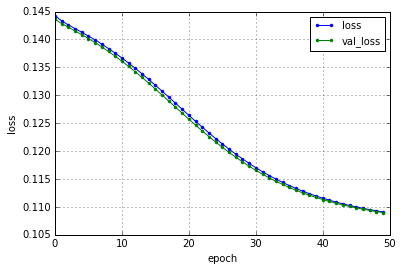

hiden node = 12
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.1455 - val_loss: 0.1445
Epoch 2/50
0s - loss: 0.1441 - val_loss: 0.1433
Epoch 3/50
0s - loss: 0.1430 - val_loss: 0.1424
Epoch 4/50
0s - loss: 0.1421 - val_loss: 0.1416
Epoch 5/50
0s - loss: 0.1413 - val_loss: 0.1408
Epoch 6/50
0s - loss: 0.1405 - val_loss: 0.1400
Epoch 7/50
0s - loss: 0.1397 - val_loss: 0.1391
Epoch 8/50
0s - loss: 0.1388 - val_loss: 0.1382
Epoch 9/50
0s - loss: 0.1379 - val_loss: 0.1373
Epoch 10/50
0s - loss: 0.1369 - val_loss: 0.1363
Epoch 11/50
0s - loss: 0.1359 - val_loss: 0.1352
Epoch 12/50
0s - loss: 0.1348 - val_loss: 0.1341
Epoch 13/50
0s - loss: 0.1337 - val_loss: 0.1330
Epoch 14/50
0s - loss: 0.1325 - val_loss: 0.1318
Epoch 15/50
0s - loss: 0.1314 - val_loss: 0.1306
Epoch 16/50
0s - loss: 0.1301 - val_loss: 0.1293
Epoch 17/50
0s - loss: 0.1289 - val_loss: 0.1281
Epoch 18/50
0s - loss: 0.1276 - val_loss: 0.1268
Epoch 19/50
0s - loss: 0.1264 - val_loss: 0.1256
Epoch 20/50
0s -

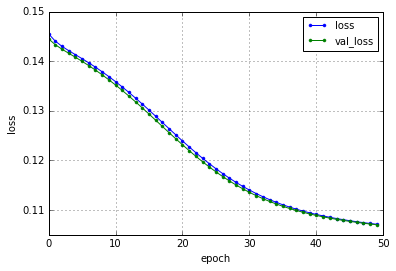

hiden node = 16
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.1458 - val_loss: 0.1450
Epoch 2/50
0s - loss: 0.1447 - val_loss: 0.1441
Epoch 3/50
0s - loss: 0.1438 - val_loss: 0.1433
Epoch 4/50
0s - loss: 0.1430 - val_loss: 0.1425
Epoch 5/50
0s - loss: 0.1422 - val_loss: 0.1417
Epoch 6/50
0s - loss: 0.1414 - val_loss: 0.1409
Epoch 7/50
0s - loss: 0.1406 - val_loss: 0.1400
Epoch 8/50
0s - loss: 0.1396 - val_loss: 0.1390
Epoch 9/50
0s - loss: 0.1387 - val_loss: 0.1380
Epoch 10/50
0s - loss: 0.1376 - val_loss: 0.1368
Epoch 11/50
0s - loss: 0.1364 - val_loss: 0.1356
Epoch 12/50
0s - loss: 0.1352 - val_loss: 0.1344
Epoch 13/50
0s - loss: 0.1339 - val_loss: 0.1330
Epoch 14/50
0s - loss: 0.1325 - val_loss: 0.1316
Epoch 15/50
0s - loss: 0.1310 - val_loss: 0.1301
Epoch 16/50
0s - loss: 0.1296 - val_loss: 0.1286
Epoch 17/50
0s - loss: 0.1280 - val_loss: 0.1271
Epoch 18/50
0s - loss: 0.1265 - val_loss: 0.1255
Epoch 19/50
0s - loss: 0.1250 - val_loss: 0.1241
Epoch 20/50
0s -

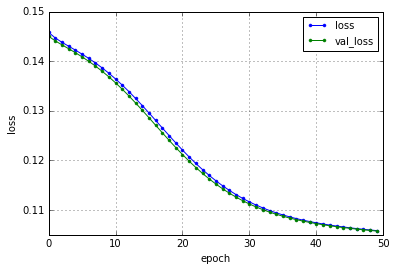

hiden node = 32
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.1508 - val_loss: 0.1491
Epoch 2/50
0s - loss: 0.1484 - val_loss: 0.1471
Epoch 3/50
0s - loss: 0.1466 - val_loss: 0.1456
Epoch 4/50
0s - loss: 0.1451 - val_loss: 0.1441
Epoch 5/50
0s - loss: 0.1436 - val_loss: 0.1426
Epoch 6/50
0s - loss: 0.1421 - val_loss: 0.1411
Epoch 7/50
0s - loss: 0.1406 - val_loss: 0.1395
Epoch 8/50
0s - loss: 0.1389 - val_loss: 0.1378
Epoch 9/50
0s - loss: 0.1372 - val_loss: 0.1360
Epoch 10/50
0s - loss: 0.1353 - val_loss: 0.1341
Epoch 11/50
0s - loss: 0.1334 - val_loss: 0.1321
Epoch 12/50
0s - loss: 0.1314 - val_loss: 0.1301
Epoch 13/50
0s - loss: 0.1294 - val_loss: 0.1280
Epoch 14/50
0s - loss: 0.1273 - val_loss: 0.1260
Epoch 15/50
0s - loss: 0.1253 - val_loss: 0.1240
Epoch 16/50
0s - loss: 0.1233 - val_loss: 0.1221
Epoch 17/50
0s - loss: 0.1214 - val_loss: 0.1202
Epoch 18/50
0s - loss: 0.1196 - val_loss: 0.1185
Epoch 19/50
0s - loss: 0.1179 - val_loss: 0.1169
Epoch 20/50
0s -

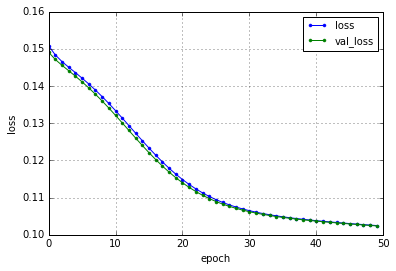

hiden node = 64
Train on 992 samples, validate on 992 samples
Epoch 1/50
0s - loss: 0.1600 - val_loss: 0.1560
Epoch 2/50
0s - loss: 0.1543 - val_loss: 0.1517
Epoch 3/50
0s - loss: 0.1506 - val_loss: 0.1486
Epoch 4/50
0s - loss: 0.1476 - val_loss: 0.1458
Epoch 5/50
0s - loss: 0.1449 - val_loss: 0.1431
Epoch 6/50
0s - loss: 0.1421 - val_loss: 0.1403
Epoch 7/50
0s - loss: 0.1393 - val_loss: 0.1375
Epoch 8/50
0s - loss: 0.1364 - val_loss: 0.1345
Epoch 9/50
0s - loss: 0.1335 - val_loss: 0.1315
Epoch 10/50
0s - loss: 0.1305 - val_loss: 0.1285
Epoch 11/50
0s - loss: 0.1275 - val_loss: 0.1256
Epoch 12/50
0s - loss: 0.1246 - val_loss: 0.1228
Epoch 13/50
0s - loss: 0.1219 - val_loss: 0.1202
Epoch 14/50
0s - loss: 0.1193 - val_loss: 0.1178
Epoch 15/50
0s - loss: 0.1170 - val_loss: 0.1156
Epoch 16/50
0s - loss: 0.1149 - val_loss: 0.1136
Epoch 17/50
0s - loss: 0.1130 - val_loss: 0.1119
Epoch 18/50
0s - loss: 0.1114 - val_loss: 0.1104
Epoch 19/50
0s - loss: 0.1100 - val_loss: 0.1091
Epoch 20/50
0s -

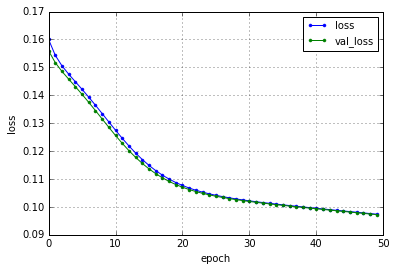

In [7]:
# loop windowWidth
for SampleNum,Overlap in zip(WindowWidth,OverlapArray):
    ArrayAxis = Axis.split(",")
    w=window.Window()
    for a in ArrayAxis:
        w.SetData(a,dic[a])
    wind=w.Compile(windowWidth=SampleNum,overlapNum=Overlap)
    print wind.shape
    windoW=wind.reshape((len(wind),np.prod(wind.shape[1:])))

    # define SaveFileName
    for AxisName,WindowNum in zip(ArrayAxis,range(3)):
        for encoding_dim in EncodingDim:
            print "hiden node = "+str(encoding_dim)
            CommonName='_edim='+str(encoding_dim)+'-Window='+str(SampleNum)+'-Overlap='+str(Overlap)+'-'+AxisName
            SaveFileNameEncord=DataName+'_encoded'+CommonName
            SaveFileNameDecord=DataName+'_decoded'+CommonName
            SaveFileNameNet=DataName+'_net'+CommonName
            SaveFileNameTrain=DataName+'_train'+CommonName
            SaveFileNameTest=DataName+'_test'+CommonName
            SaveFileNameGlaph=GlaphDataPath+DataName+CommonName+'_loss_val_loss.png'

            window_test=wind[:,:,WindowNum]
            window_train=wind[:,:,WindowNum]
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTrain,window_test)
            processing.SaveDicDataFromFileNPZ(WindowDataPath,SaveFileNameTest,window_test)
            shapeNum=wind.shape[1]


            # this is our input placeholder
            input_img = Input(shape=(shapeNum,))
            # "encoded" is the encoded representation of the input
            encoded = Dense(encoding_dim, activation='tanh')(input_img)
            # "decoded" is the lossy reconstruction of the input
            decoded = Dense(shapeNum, activation='linear')(encoded)

            # this model maps an input to its reconstruction
            autoencoder = Model(input=input_img, output=decoded)

            # this model maps an input to its encoded representation
            encoder = Model(input=input_img, output=encoded)

            # create a placeholder for an encoded (32-dimensional) input
            encoded_input = Input(shape=(encoding_dim,))
            # retrieve the last layer of the autoencoder model
            decoder_layer = autoencoder.layers[-1]
            # create the decoder model
            decoder = Model(input=encoded_input, output=decoder_layer(encoded_input))

            autoencoder.compile(optimizer='adadelta', loss='mse')
            plot(autoencoder,  to_file=StudyDataModelPicPath+SaveFileNameNet+'.png')

            early_stopping = EarlyStopping(monitor='val_loss', patience=5)
            hist = autoencoder.fit(window_train, window_train,
                            nb_epoch=50,
                            verbose=2,
                            batch_size=shapeNum/4,
                            shuffle=True,
                            validation_data=(window_test, window_test),
                            callbacks=[early_stopping]
                            )
            time.sleep(0.1)
            encoded_imgs = encoder.predict(window_test)
            decoded_imgs = decoder.predict(encoded_imgs)

            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameEncord,encoded_imgs)
            processing.SaveDicDataFromFileNPZ(StudyDataPath,SaveFileNameDecord,decoded_imgs)

            # save model and wights
            json_string = encoder.to_json()
            open(StudyDataPath+SaveFileNameEncord+'.json', 'w').write(json_string)
            encoder.save_weights(StudyDataPath+SaveFileNameEncord+'_weights.h5',overwrite=True)

            json_string = decoder.to_json()
            open(StudyDataPath+SaveFileNameDecord+'.json', 'w').write(json_string)
            decoder.save_weights(StudyDataPath+SaveFileNameDecord+'_weights.h5',overwrite=True)

            json_string = autoencoder.to_json()
            open(StudyDataPath+SaveFileNameNet+'.json', 'w').write(json_string)
            autoencoder.save_weights(StudyDataPath+SaveFileNameNet+'_weights.h5',overwrite=True)

            # plot loss
            loss = hist.history['loss']
            val_loss = hist.history['val_loss']

            nb_epoch = len(loss)
            plt.plot(range(nb_epoch), loss, marker='.', label='loss')
            plt.plot(range(nb_epoch), val_loss, marker='.', label='val_loss')
            plt.legend(loc='best', fontsize=10)
            plt.grid()
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.savefig(SaveFileNameGlaph)
            plt.show()

In [8]:
print window_test.shape

(992, 1024)
